In [ ]:
!pip install -q seaborn
!pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml

In [ ]:
!pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 583.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow
    Found existi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.utils import class_weight
import random
from datetime import datetime

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd = "/content/drive/MyDrive/JSIP Final Project/dbs"
model_save_pwd = "/content/drive/MyDrive/JSIP Final Project/models"
pwd_parent = "/content/drive/MyDrive/JSIP Final Project"
pd.set_option("display.max_columns", None)

##process datasets##

In [ ]:
def get_dataset():
  dataset = pd.read_excel(f"{pwd}/db_exp_1.xlsx")
  del dataset["Unnamed: 0"]
  del dataset["result"]
  del dataset["date"]
  return dataset

In [ ]:
def get_dataset_with_result():
  dataset = pd.read_excel(f"{pwd}/db_exp_1.xlsx")
  del dataset["Unnamed: 0"]
  del dataset["date"]
  return dataset

def get_dataset_with_date():
  dataset = pd.read_excel(f"{pwd}/db_exp_1.xlsx")
  del dataset["Unnamed: 0"]
  del dataset["result"]
  return dataset

def get_dataset_with_season():
  dataset = pd.read_excel(f"{pwd}/db_exp_2.xlsx")
  del dataset["Unnamed: 0"]
  return dataset


def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(4, 4)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [ ]:
def process_dataset_splits(train_dataset, test_dataset, convert_to_float):
  train_target = train_dataset[['CP1_AVG', 'CPX_AVG', 'CP2_AVG']]
  test_target = test_dataset[['CP1_AVG', 'CPX_AVG', 'CP2_AVG']]
  train_features = train_dataset.drop(columns=['CP1_AVG', 'CPX_AVG', 'CP2_AVG'])
  test_features = test_dataset.drop(columns=['CP1_AVG', 'CPX_AVG', 'CP2_AVG'])
  if convert_to_float:
    train_target = np.array(train_target).astype('float32')
    test_target = np.array(test_target).astype('float32')

    train_features = np.array(train_features).astype('float32')
    test_features = np.array(test_features).astype('float32')
  return (train_features, train_target), (test_features, test_target)

def split_dataset(dataset, convert_to_float):
  # dropping last 2 seasons
  test_size = 760
  train_dataset = dataset.iloc[:-test_size]
  test_dataset = dataset.tail(test_size)
  return train_dataset, test_dataset
  # dataset

def get_dataset_splits(dataset, convert_to_float):
  train_dataset, test_dataset = split_dataset(dataset, convert_to_float)
  return process_dataset_splits(train_dataset, test_dataset, convert_to_float)

def get_diffs(openings, closings):
  op1, opx, op2 = openings
  cp1, cpx, cp2 = closings
  diff1 = cp1 - op1
  diffx = cpx - opx
  diff2 = cp2 - op2
  return diff1, diffx, diff2

def min_diff(diffs):
  diff1, diffx, diff2 = diffs
  min_diff = min(diff1, diffx, diff2)
  if min_diff == diff1:
      return "H"
  elif min_diff == diffx:
    return "D"
  elif min_diff == diff2:
    return "A"
  else:
    return "aaa"

def get_diff_database(database):
  op1x2 = database[["OP1_AVG", "OPX_AVG", "OP2_AVG"]]
  op1x2 = np.array(op1x2).astype('float32')
  cp1x2 = database[["CP1_AVG", "CPX_AVG", "CP2_AVG"]]
  cp1x2 = np.array(cp1x2).astype('float32')
  diff1_list = []
  diffx_list = []
  diff2_list = []
  for op, cp in zip(op1x2, cp1x2):
    op1, opx, op2 = op
    diff1, diffx, diff2 = get_diffs(op, cp)
    # print(f"{diff1}, {diffx}, {diff2}")
    # print(cp)
    diff1_list.append(diff1)
    diffx_list.append(diffx)
    diff2_list.append(diff2)
  database["DIFF1"] = diff1_list
  database["DIFFX"] = diffx_list
  database["DIFF2"] = diff2_list
  return database

def get_max_diff(dataset, as_letter = True):
  op1x2 = dataset[["OP1_AVG", "OPX_AVG", "OP2_AVG"]]
  cp1x2 = dataset[["CP1_AVG", "CPX_AVG", "CP2_AVG"]]
  op1x2 = np.array(op1x2).astype('float32')
  cp1x2 = np.array(cp1x2).astype('float32')

  max_diffs = []
  for cp1x2_val, op1x2_val in zip(cp1x2, op1x2):
    real_diffs = get_diffs(op1x2_val, cp1x2_val)
    next_letter = min_diff(real_diffs)
    if (as_letter):
      max_diffs += next_letter
    else:
      if next_letter == "H":
        max_diffs.append(0)
      elif next_letter == "D":
        max_diffs.append(1)
      else:
        max_diffs.append(2)

  return max_diffs

def get_dir_database(database):
  op1x2 = database[["OP1_AVG", "OPX_AVG", "OP2_AVG"]]
  op1x2 = np.array(op1x2).astype('float32')
  cp1x2 = database[["CP1_AVG", "CPX_AVG", "CP2_AVG"]]
  cp1x2 = np.array(cp1x2).astype('float32')
  diff1_list = []
  diffx_list = []
  diff2_list = []
  for op, cp in zip(op1x2, cp1x2):
    op1, opx, op2 = op
    diff1, diffx, diff2 = get_diffs(op, cp)
    # print(f"{diff1}, {diffx}, {diff2}")
    # print(cp)
    diff1_list.append(1 if diff1 > 0 else 0)
    diffx_list.append(1 if diffx > 0 else 0)
    diff2_list.append(1 if diff2 > 0 else 0)
  database["DIR1"] = diff1_list
  database["DIRX"] = diffx_list
  database["DIR2"] = diff2_list
  return database

def get_dir_dataset_stats(dataset, label):
  num_up = (dataset[label].value_counts()[1])
  num_down = (dataset[label].value_counts()[0])
  total = len(dataset)
  print(f"U% : {format((num_up/total) * 100, '.3f')}%, {num_up}/{total}; D% : {format((num_down/total) * 100, '.3f')}%, {num_down}/{total}")

In [ ]:
def get_odds_percent_database(dataset):
  total_odds = dataset["OP1_AVG"] + dataset["OPX_AVG"] + dataset["OP2_AVG"]
  dataset["OP1_RATE"] = dataset["OP1_AVG"] / total_odds
  dataset["OPX_RATE"] = dataset["OPX_AVG"] / total_odds
  dataset["OP2_RATE"] = dataset["OP2_AVG"] / total_odds
  return dataset

def get_odds_percent_database_closing(dataset):
  total_odds = dataset["CP1_AVG"] + dataset["CPX_AVG"] + dataset["CP2_AVG"]
  dataset["CP1_RATE"] = dataset["CP1_AVG"] / total_odds
  dataset["CPX_RATE"] = dataset["CPX_AVG"] / total_odds
  dataset["CP2_RATE"] = dataset["CP2_AVG"] / total_odds
  return dataset

def get_max_diff_database(dataset):
  dataset["MAX_DIFF"] = get_max_diff(dataset)
  return dataset

def calculate_winnings(dataset, odds_label, pred_result):
  winnings = dataset[dataset["result"] == pred_result][odds_label].sum()
  costs = len(dataset)
  return winnings - costs

def calculate_ev(dataset, odds_label, pred_result):
  if (len(dataset) == 0):
    return 0
  winnings = calculate_winnings(dataset, odds_label, pred_result)
  # print(len(dataset))
  return winnings / len(dataset)

def calculate_ev_math(p, odds):
  return (p * (odds - 1) + (1 - p) * -1)

def get_power_database(dataset):
  dataset["HOME_POWER"] = (dataset["home_wins_rate"] * 2 + dataset["home_tie_rate"]) / (dataset["away_wins_rate"] * 2 + dataset["away_tie_rate"])
  dataset["HOME_POWER"] = [10 if x > 10 else x for x in dataset["HOME_POWER"]]
  return dataset

def get_odds_rankings(dataset, is_opening):
  p1_label = "OP1_AVG" if is_opening else "CP1_AVG"
  px_label = "OPX_AVG" if is_opening else "CPX_AVG"
  p2_label = "OP2_AVG" if is_opening else "CP2_AVG"
  append_label = "OP" if is_opening else "CP"
  max_odds = []
  mid_odds = []
  min_odds = []
  for index, row in dataset.iterrows():
    op1 = {"odd": row[p1_label], "symbol": "H"}
    opx = {"odd": row[px_label], "symbol": "D"}
    op2 = {"odd": row[p2_label], "symbol": "A"}
    max_odd = max(op1, opx, op2, key=lambda x:x["odd"])
    min_odd = min(op1, opx, op2, key=lambda x:x["odd"])
    mid_odd = [x for x in [op1, opx, op2] if (x != max_odd and x != min_odd)][0]
    # print(mid_odd)
    max_odds.append(max_odd["symbol"])
    min_odds.append(min_odd["symbol"])
    mid_odds.append(mid_odd["symbol"])
  dataset[f"{append_label}_MAX_ODD"] = max_odds
  dataset[f"{append_label}_MID_ODD"] = mid_odds
  dataset[f"{append_label}_MIN_ODD"] = min_odds
  return dataset


In [ ]:
def get_stat_percent_database(dataset):
  dataset["home_wins_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["home_wins"], dataset["games"])]
  dataset["home_tie_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["home_tie"], dataset["games"])]
  dataset["home_loss_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["home_loss"], dataset["games"])]
  dataset["away_wins_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["away_wins"], dataset["games"])]
  dataset["away_tie_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["away_tie"], dataset["games"])]
  dataset["away_loss_rate"] = [(0 if num == 0 else x / num) for x, num in zip(dataset["away_loss"], dataset["games"])]
  dataset = dataset.drop(columns=["home_wins", "home_tie", "home_loss", "away_wins", "away_tie", "away_loss"])
  return dataset

def get_features_and_labels(dataset, labels):
  dataset_target = dataset[labels]
  dataset_features = dataset.drop(columns=labels)

  dataset_target = np.array(dataset_target).astype('float32')
  dataset_features = np.array(dataset_features).astype('float32')
  return dataset_target, dataset_features

def get_extreme_stats_dataset(dataset, label):
  for index, row in stats_dataset.iterrows():
    diff = row["home_wins_rate"] - row["away_wins_rate"]
    if abs(diff) < .5:
      stats_dataset = stats_dataset.drop(index=index)

In [ ]:
# maybe make it 1 if away, 2 if home
def get_OHE_dataset(dataset):
  home_one_hot = pd.get_dummies(dataset["home_team"], prefix="home")
  away_one_hot = pd.get_dummies(dataset["away_team"], prefix="away")
  dataset_hot = dataset.drop("home_team", axis = 1)
  dataset_hot = dataset_hot.drop("away_team", axis = 1)
  dataset_hot = dataset_hot.join(home_one_hot)
  dataset_hot = dataset_hot.join(away_one_hot)
  return dataset_hot

In [ ]:
def get_small_OHE_dataset(dataset):
  home_one_hot = pd.get_dummies(dataset["home_team"])
  away_one_hot = pd.get_dummies(dataset["away_team"])
  result_df = home_one_hot.copy()
  for col_name in result_df.columns.tolist():
    result_df[col_name] = result_df[col_name] + away_one_hot[col_name]
    result_df = result_df.ge(1).astype(int)

  dataset_hot = dataset.drop("home_team", axis = 1)
  dataset_hot = dataset_hot.drop("away_team", axis = 1)
  dataset_hot = dataset_hot.join(result_df)
  return dataset_hot

def get_weighted_OHE_dataset(dataset):
  home_one_hot = pd.get_dummies(dataset["home_team"])
  away_one_hot = pd.get_dummies(dataset["away_team"])
  result_df = home_one_hot.copy()
  for col_name in result_df.columns.tolist():
    result_df[col_name] = (result_df[col_name]) * 2 + away_one_hot[col_name]
    # result_df = result_df.ge(1).astype(int)

  dataset_hot = dataset.drop("home_team", axis = 1)
  dataset_hot = dataset_hot.drop("away_team", axis = 1)
  dataset_hot = dataset_hot.join(result_df)
  return dataset_hot

In [ ]:
def get_factorized_dataset(dataset):
  dataset_encoded = dataset.copy()
  encoded_home = pd.factorize(dataset["home_team"])[0]
  encoded_away= pd.factorize(dataset["away_team"])[0]
  dataset_encoded["home_team"] = encoded_home
  dataset_encoded["away_team"] = encoded_away
  return dataset_encoded

In [ ]:
# len(train_dataset.columns.tolist())

15

In [ ]:
# train_target = np.array(train_target).astype('float32')
# test_target = np.array(test_target).astype('float32')

# train_features = np.array(train_features).astype('float32')
# test_features = np.array(test_features).astype('float32')



In [ ]:
def get_factorized_data_splits():
  dataset = get_dataset()
  factorized_dataset = get_factorized_dataset(dataset)
  return get_dataset_splits(factorized_dataset, True)

def get_OHE_data_splits():
  dataset = get_dataset()
  ohe_dataset = get_OHE_dataset(dataset)
  return get_dataset_splits(ohe_dataset, True)

def get_MDO_data_splits():
  dataset = get_dataset()


In [ ]:
(train_features, train_target), (test_features, test_target) = get_factorized_data_splits()


In [ ]:
train_target

array([[3.217, 3.414, 2.237],
       [1.994, 3.245, 4.134],
       [2.386, 3.239, 3.098],
       ...,
       [3.13 , 2.933, 2.603],
       [1.445, 4.722, 7.145],
       [1.98 , 3.922, 3.546]], dtype=float32)

In [ ]:
(train_features, train_target), (test_features, test_target) = get_OHE_data_splits()

In [ ]:
train_target

array([[3.217, 3.414, 2.237],
       [1.994, 3.245, 4.134],
       [2.386, 3.239, 3.098],
       ...,
       [3.13 , 2.933, 2.603],
       [1.445, 4.722, 7.145],
       [1.98 , 3.922, 3.546]], dtype=float32)

##run model##

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_features)

linear_model = tf.keras.Sequential([
    normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(3)
])

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mean_absolute_error')

1/1 [==============================] - 0s 177ms/step


array([[ 0.083],
       [ 1.737],
       [-1.585],
       [-1.248],
       [-0.221],
       [-0.737],
       [-2.319],
       [-1.839],
       [-0.75 ],
       [-0.234]], dtype=float32)

In [ ]:
print(train_features.dtype)
print(train_target.dtype)

float32
float32


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=30,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_target,
    epochs=200,
    callbacks=[early_stopping],
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/200
67/67 [==============================] - 1s 7ms/step - loss: 1.0925 - val_loss: 0.6936
Epoch 2/200
43/67 [==================>...........] - ETA: 0s - loss: 0.7193

KeyboardInterrupt: 

##evaluate model##

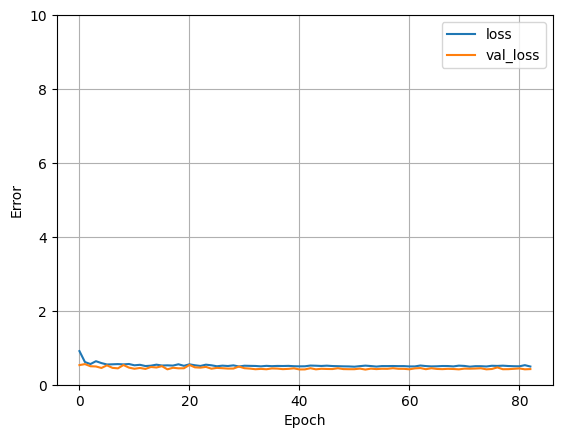

In [ ]:
plot_loss(history)

In [ ]:
model_path = "linear_regression_model"
linear_model.save(model_path)
print(f"Model saved to {model_path}")

In [ ]:
predictions = linear_model.predict(test_features[:10])
op1x2 = test_dataset[["OP1_AVG", "OPX_AVG", "OP2_AVG"]]
op1x2 = np.array(op1x2).astype('float32')
for prediction, cp1x2_val, op1x2_val in zip(predictions, test_target[:10], op1x2[:10]):
  print(f"OP1X2: {op1x2_val} pred: {prediction}, CP1X2: {cp1x2_val}")

1/1 [==============================] - 0s 75ms/step
OP1X2: [3.307 3.145 2.246] pred: [2.765 3.28  2.361], CP1X2: [3.187 3.029 2.513]
OP1X2: [3.737 3.314 2.013] pred: [3.313 3.371 2.205], CP1X2: [3.484 3.374 2.179]
OP1X2: [ 1.214  6.37  12.577] pred: [ 1.35   6.496 13.59 ], CP1X2: [ 1.217  6.787 13.65 ]
OP1X2: [2.037 3.349 3.627] pred: [1.915 3.294 3.991], CP1X2: [1.767 3.574 5.043]
OP1X2: [3.066 3.153 2.359] pred: [2.475 3.185 2.474], CP1X2: [3.771 3.052 2.212]
OP1X2: [1.692 3.713 4.901] pred: [1.603 3.736 5.59 ], CP1X2: [1.9   3.503 4.292]
OP1X2: [7.987 4.694 1.374] pred: [7.085 4.726 1.423], CP1X2: [7.05  4.945 1.428]
OP1X2: [1.604 3.725 5.859] pred: [1.533 3.555 6.758], CP1X2: [1.57  3.913 6.634]
OP1X2: [4.707 3.371 1.807] pred: [4.218 3.397 2.014], CP1X2: [5.557 3.096 1.847]
OP1X2: [1.484 4.163 6.611] pred: [1.506 4.13  7.652], CP1X2: [1.579 4.043 6.111]


In [ ]:
# check direction
# dataset = test_dataset
# features = test_features
# target = test_target
# num = 50
# predictions = linear_model.predict(features[:num])
def compare_predictions(predictions, dataset, target, num):
  op1x2 = dataset[["OP1_AVG", "OPX_AVG", "OP2_AVG"]][:num]
  op1x2 = np.array(op1x2).astype('float32')
  direction_right = 0
  for prediction, cp1x2_val, op1x2_val in zip(predictions, target[:num], op1x2):
    print(f"OP1X2: {op1x2_val} CP1X2: {cp1x2_val} pred: {prediction}")
    real_diffs = get_diffs(op1x2_val, cp1x2_val)
    pred_diffs = get_diffs(op1x2_val, prediction)
    real_lowest = min_diff(real_diffs)
    pred_lowest = min_diff(pred_diffs)
    print(f"real_diffs: {real_diffs}, pred_diffs: {pred_diffs}")
    print(f"real low: {real_lowest}, pred_low: {pred_lowest}")
    if real_lowest == pred_lowest:
      direction_right += 1

  print(f"correct_dir: {direction_right/num}")




In [ ]:
# features = test_features
target = test_target
num = 50
predictions = linear_model.predict(features[:num])
compare_predictions(features, target, predictions, num)

NameError: name 'test_target' is not defined

## **Regression with random forest**


In [ ]:

import tensorflow_decision_forests as tfdf

In [ ]:
dataset = get_dataset()
train_dataset_rfo, test_dataset_rfo = split_dataset(dataset, False)

In [ ]:

def get_tf_dataset(pd_dataset, label_keys):
  feature_keys = [x for x in pd_dataset.columns.tolist() if x not in label_keys]
  labels = dict(pd_dataset[label_keys])
  features = dict(pd_dataset[feature_keys])

  pd_dataset = tf.data.Dataset.from_tensor_slices((features, labels)).batch(100)
  return pd_dataset

In [ ]:
label_keys = ["CP1_AVG", "CPX_AVG", "CP2_AVG"]
multitask_items = [
    tfdf.keras.MultiTaskItem(label=lbl, task=tfdf.keras.Task.REGRESSION, primary=True, output=None) for lbl in label_keys
]
multitask_items
tf_train_data_rfo = get_tf_dataset(train_dataset, label_keys)

In [ ]:
model_1 = tfdf.keras.RandomForestModel(multitask = multitask_items)
model_1.compile(loss="mean_absolute_error")

Use /tmp/tmpt6f25not as temporary training directory


In [ ]:
model_1.fit(tf_train_data_rfo)

Reading training dataset...
Training dataset read in 0:00:00.444624. Found 2660 examples.
Training model...
Model trained in 0:00:11.038345
Compiling model...
Model compiled.


In [ ]:
model_1.summary()

NameError: name 'model_3' is not defined

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=40)

In [ ]:
test_labels = test_dataset_rfo[label_keys]
test_features = test_dataset_rfo.drop(labels=label_keys, axis=1)
# test_dataset
# test_features
tf_test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_features)
tf_test_data

<_PrefetchDataset element_spec={'home_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'away_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'home_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'games': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'OP1_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OPX_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP2_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}>

In [ ]:
tf_train_dataset_rfo = get_tf_dataset(test_dataset_rfo, label_keys)
tf_train_dataset_rfo

<_BatchDataset element_spec=({'home_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'away_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'home_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'games': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'OP1_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OPX_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP2_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, {'CP1_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'CPX_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'CP2_AVG': TensorSpec(shape=(None,

In [ ]:
evaluation = model_1.evaluate(tf_train_dataset_rfo, verbose=1, return_dict=True)
evaluation

8/8 [==============================] - 2s 48ms/step - loss: 1.0952 - CP1_AVG_loss: 0.2485 - CP2_AVG_loss: 0.5982 - CPX_AVG_loss: 0.2486


{'loss': 1.0952415466308594,
 'CP1_AVG_loss': 0.2485017329454422,
 'CP2_AVG_loss': 0.5981789827346802,
 'CPX_AVG_loss': 0.248560830950737}

In [ ]:
def compare_predictions_rf(predictions, dataset, target, num):
  op1x2 = dataset[["OP1_AVG", "OPX_AVG", "OP2_AVG"]][:num]
  op1x2 = np.array(op1x2).astype('float32')
  target = np.array(target).astype('float32')
  # print("target")
  # print(target)
  direction_right = 0
  absolute_errors = []
  for prediction, cp1x2_val, op1x2_val in zip(predictions, target, op1x2):
    print(f"OP1X2: {op1x2_val} CP1X2: {cp1x2_val} pred: {prediction}")
    print(prediction)
    real_diffs = get_diffs(op1x2_val, cp1x2_val)
    pred_diffs = get_diffs(op1x2_val, prediction)
    error_diffs = get_diffs(cp1x2_val, prediction)
    absolute_errors += [abs(x) for x in error_diffs]
    real_lowest = min_diff(real_diffs)
    pred_lowest = min_diff(pred_diffs)
    print(f"real_diffs: {real_diffs}, pred_diffs: {pred_diffs}")
    print(f"real low: {real_lowest}, pred_low: {pred_lowest}")
    if real_lowest == pred_lowest:
      direction_right += 1

  print(f"mean abs error: {sum(absolute_errors)/num}")
  print(f"correct_dir: {direction_right/num}")

In [ ]:
num = 10
# taken_ds = tf_test_data.take(num)
smaller_df = tfdf.keras.pd_dataframe_to_tf_dataset(test_features[:num])
predictions = model_1.predict(smaller_df)
predictions

# taken_ds.shape
# target = test_target
# features = tf_test_data
# tf_test_data

# converted_ds = tfdf.as_dataframe(tf_test_data)
# converted_ds
predictions_zipped = list(zip(predictions["CP1_AVG"].flatten(), predictions["CPX_AVG"].flatten(), predictions["CP2_AVG"].flatten()))
# test_labels.shape
# predictions_zipped
# test_features
# test_labels
# predictions["CPX_AVG"].shape
# predictions["CP2_AVG"].shape
# test_features.shape
# def compare_predictions(predictions, dataset, target, num):
compare_predictions_rf(predictions_zipped, test_features, test_labels, num)

1/1 [==============================] - 0s 93ms/step
OP1X2: [3.307 3.145 2.246] CP1X2: [3.187 3.029 2.513] pred: (3.4338105, 3.145839, 2.249078)
(3.4338105, 3.145839, 2.249078)
real_diffs: (-0.119999886, -0.11599994, 0.26699996), pred_diffs: (0.12681055, 0.000838995, 0.0030779839)
real low: H, pred_low: D
OP1X2: [3.737 3.314 2.013] CP1X2: [3.484 3.374 2.179] pred: (4.0157876, 3.3307197, 1.9601387)
(4.0157876, 3.3307197, 1.9601387)
real_diffs: (-0.25300002, 0.06000018, 0.16599989), pred_diffs: (0.2787876, 0.016719818, -0.052861333)
real low: H, pred_low: A
OP1X2: [ 1.214  6.37  12.577] CP1X2: [ 1.217  6.787 13.65 ] pred: (1.2347541, 6.212232, 11.879961)
(1.2347541, 6.212232, 11.879961)
real_diffs: (0.003000021, 0.4170003, 1.073), pred_diffs: (0.020754099, -0.15776777, -0.69703865)
real low: H, pred_low: A
OP1X2: [2.037 3.349 3.627] CP1X2: [1.767 3.574 5.043] pred: (1.94287, 3.4516685, 4.1109514)
(1.94287, 3.4516685, 4.1109514)
real_diffs: (-0.26999998, 0.2249999, 1.4160001), pred_diffs: 

##predict greatest decrease##

In [ ]:
dataset = get_dataset()

In [ ]:
def get_UV_dataset():
  dataset_uv = dataset.copy()
  dataset_uv["undervalued"] = get_max_diff(dataset_uv)
  dataset_uv = dataset_uv.drop(["CP1_AVG", "CPX_AVG", "CP2_AVG"], axis=1)
  # dataset[""]
  return split_dataset(dataset_uv, False)

In [ ]:
train_dataset, test_dataset = get_UV_dataset()

In [ ]:
label_keys = ["undervalued"]

tf_train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataset, label="undervalued")
tf_train_data
tf_test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_dataset, label="undervalued")
tf_test_data

<_PrefetchDataset element_spec=({'home_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'away_team': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'home_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'home_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_wins': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_tie': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'away_loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'games': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'OP1_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OPX_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP2_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)

model_2 = tfdf.keras.RandomForestModel(verbose=1, tuner=tuner)
model_2.compile(metrics=["accuracy"])

Use /tmp/tmpkhxxxjbc as temporary training directory


In [ ]:
model_2.fit(tf_train_data)

Reading training dataset...
Training dataset read in 0:00:00.346853. Found 2660 examples.
Training model...
Model trained in 0:00:04.692977
Compiling model...
Model compiled.


In [ ]:
model_2.summary()

Model: "random_forest_model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	OP1_AVG
	OP2_AVG
	OPX_AVG
	away_loss
	away_team
	away_tie
	away_wins
	games
	home_loss
	home_team
	home_tie
	home_wins

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "home_team"  0.370697 ################
    2. "away_team"  0.364341 ###############
    3.   "OPX_AVG"  0.163529 ###
    4.   "OP1_AVG"  0.140393 ##
    5.   "OP2_AVG"  0.128728 #
    6. "away_wins"  0.114999 
    7.     "games"  0.114843 
    8. "home_wins"  0.107289 
    9. "away_loss"  0.101739 
   10. "home_loss"  0.101634 
   11.  "home_tie"  0.099723 
   12.  "away_tie"  0.099421 

Variable Importance: 

In [ ]:
def compare_predictions_lowest(predictions, target, num):
  # print("target")
  # print(target)
  direction_right = 0
  for prediction, real in zip(predictions, target):
    if prediction == real:
      direction_right += 1
  print(f"correct_dir: {direction_right/num}")

In [ ]:
evaluation = model_2.evaluate(tf_test_data, verbose=1, return_dict=True)
evaluation

NameError: name 'model_2' is not defined

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=25, use_predefined_hps=True)
model_3 = tfdf.keras.RandomForestModel(tuner=tuner)
model_3.compile(metrics=["accuracy"])

Use /tmp/tmp3229yr4a as temporary training directory


In [ ]:
model_3.fit(tf_train_data)

Reading training dataset...
Training dataset read in 0:00:09.479976. Found 2660 examples.
Training model...
Model trained in 0:40:21.354139
Compiling model...
Model compiled.


In [ ]:
evaluation = model_3.evaluate(tf_test_data, verbose=1, return_dict=True)
evaluation

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 0.4329


{'loss': 0.0, 'accuracy': 0.4328947365283966}

In [ ]:
model_path = f"{pwd}/decrease_tree"
model_3.save(model_path)
print(f"Model saved to {model_path}")

Model saved to linear_regression_model


##UV model##


In [ ]:
dataset = get_dataset()

In [ ]:
dataset_uv = dataset.copy()
dataset_uv["undervalued"] = get_max_diff(dataset_uv, False)
dataset_uv = dataset_uv.drop(["CP1_AVG", "CPX_AVG", "CP2_AVG"], axis=1)
dataset_uv = get_small_OHE_dataset(dataset_uv)
uv_train, uv_test = split_dataset(dataset_uv, True)
print_dataset_stats(dataset_uv)
uv_train = uv_train.groupby("undervalued").sample(n=442)
# uv_train = uv_train.sample(frac=1)
print("uv train")
print_dataset_stats(uv_train)
uv_val = uv_train.groupby("undervalued").sample(n=88)
uv_val = uv_val.sample(frac=1)
print("uv val")
print_dataset_stats(uv_val)
# uv_train.drop(uv_val)
uv_train = uv_train.drop(index=uv_val.index)
uv_train = uv_train.sample(frac=1)
print("uv train without val")
print_dataset_stats(uv_train)
# uv_train, uv_test = split_dataset(uv_train, True)
uv_val_target = uv_val[['undervalued']]
uv_train_target = uv_train[['undervalued']]
uv_test_target = uv_test[['undervalued']]
uv_val_features= uv_val.drop(columns=['undervalued'])
uv_train_features = uv_train.drop(columns=['undervalued'])
uv_test_features = uv_test.drop(columns=['undervalued'])

uv_val_target = np.array(uv_val_target).astype('float32')
uv_train_target = np.array(uv_train_target).astype('float32')
uv_test_target = np.array(uv_test_target).astype('float32')
uv_val_features = np.array(uv_val_features).astype('float32')
uv_train_features = np.array(uv_train_features).astype('float32')
uv_test_features = np.array(uv_test_features).astype('float32')

H% : 0.42660818713450294, D% : 0.18801169590643274, A% : 0.3853801169590643
total: 3420, sum: 3420 nums: h 1459 x 643 a 1318
uv train
H% : 0.3333333333333333, D% : 0.3333333333333333, A% : 0.3333333333333333
total: 1326, sum: 1326 nums: h 442 x 442 a 442
uv val
H% : 0.3333333333333333, D% : 0.3333333333333333, A% : 0.3333333333333333
total: 264, sum: 264 nums: h 88 x 88 a 88
uv train without val
H% : 0.3333333333333333, D% : 0.3333333333333333, A% : 0.3333333333333333
total: 1062, sum: 1062 nums: h 354 x 354 a 354


In [ ]:
num_h = (uv_train["undervalued"].value_counts()[0])
num_x = (uv_train["undervalued"].value_counts()[1])
num_a = (uv_train["undervalued"].value_counts()[2])
total = len(uv_train)
print(f"H% : {num_h/total}, D% : {num_x/total}, A% : {num_a/total}")
print(f"total: {total}, sum: {num_h + num_x + num_a} nums: h {num_h} x {num_x} a {num_a}")
uv_train = uv_train.groupby("undervalued").sample(n=442)
uv_train = uv_train.sample(frac=1)
uv_train_target[:10]

H% : 0.3333333333333333, D% : 0.3333333333333333, A% : 0.3333333333333333
total: 1326, sum: 1326 nums: h 442 x 442 a 442


array([[0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.]], dtype=float32)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(uv_train_features)
steps_per_epoch = len(uv_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)

model_4 = tf.keras.Sequential([
      normalizer,
      layers.Dense(5, activation='sigmoid'),
      layers.Dense(5, activation='sigmoid'),
      layers.Dense(3)
])

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode="max",
    min_delta=0,
    patience=90,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
%%time
history = model_4.fit(
    uv_train_features,
    uv_train_target,
    epochs=400,
    callbacks=[early_stopping],
    validation_freq=5,
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_data = (uv_val_features, uv_val_target))

Epoch 1/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5220 - loss: 0.9858
Epoch 2/400
 1/34 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.6562 - loss: 0.8780

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5414 - loss: 0.9773
Epoch 3/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4996 - loss: 0.9992
Epoch 4/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 0.9830
Epoch 5/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5074 - loss: 0.9950 - val_accuracy: 0.3977 - val_loss: 1.0981
Epoch 6/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4984 - loss: 0.9923
Epoch 7/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5098 - loss: 0.9856
Epoch 8/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5306 - loss: 0.9838
Epoch 9/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5212 - loss: 0.9923
Epoch 10/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5216 - loss: 0.9827 - val_accuracy: 0.3977 - val_loss: 1.0996
Epoch 11/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4943 - loss: 0.9958
Epoch 12/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4783 - l

760
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
correct: 0.37894736842105264, 288/760


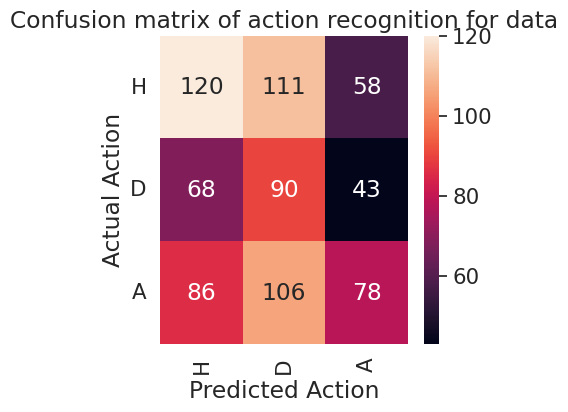

In [ ]:

# features = uv_val_features
# target = uv_val_target
# features = uv_train_features
# target = uv_train_target
features = uv_test_features
target = uv_test_target
num = len(features)
features = features[:num]
target = target[:num]

print(len(features))
predictions = model_4.predict(features)

target_data = np.array(target).astype('float32')
target_data = [x[0] for x in target_data]
correct = 0
predicted_classes = [np.argmax(x) for x in predictions]
for prediction_class, target_val in zip(predicted_classes, target_data):
  # prediction_class = np.argmax(prediction)
  # print(f"pred: {prediction_class}, real: {target_val}")
  if prediction_class == target_val:
    correct += 1

print(f"correct: {correct/num}, {correct}/{num}")
# confusion_matrix = tf.math.confusion_matrix(
#     target,
#     predicted_classes,
#     num_classes=3,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )
# confusion_matrix
plot_confusion_matrix(target, predicted_classes, ["H", "D", "A"], "data")

In [ ]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(4, 4)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

##odds model v2##

In [ ]:
label_keys = ["CP1_AVG", "CPX_AVG", "CP2_AVG"]
curr_label = "CP1_AVG"
# dataset_om = dataset.copy()
# dataset_uv["undervalued"] = get_max_diff(dataset_uv, False)
# dataset_uv = dataset_uv.drop(label_keys, axis=1)
dataset_om = get_small_OHE_dataset(dataset.copy())
om_train, om_test = split_dataset(dataset_om, True)
om_train = om_train.sample(frac=1)
# uv_train, uv_test = split_dataset(uv_train, True)
om_train_target = om_train[curr_label]
om_test_target = om_test[curr_label]
om_train_features = om_train.drop(columns=label_keys)
om_test_features = om_test.drop(columns=label_keys)

om_train_target = np.array(om_train_target).astype('float32')
om_test_target = np.array(om_test_target).astype('float32')
om_train_features = np.array(om_train_features).astype('float32')
om_test_features = np.array(om_test_features).astype('float32')

,home_wins,home_tie,home_loss,away_wins,away_tie,away_loss,games,OP1_AVG,OPX_AVG,OP2_AVG,...,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
317,16,9,6,7,7,17,31,1.501,4.012,7.007,...,0,0,0,0,0,0,0,0,0,1
2500,4,8,9,3,9,10,22,1.814,3.401,4.592,...,0,1,0,0,0,0,0,0,0,0
648,1,7,18,11,6,9,26,2.929,3.297,2.440,...,0,0,1,0,0,0,0,0,0,0
514,4,2,7,6,2,5,13,2.367,3.316,2.995,...,0,0,0,0,0,0,0,0,0,0
1815,9,12,8,8,10,11,29,2.140,3.227,3.585,...,0,0,0,0,0,0,0,0,0,0
2490,7,8,6,4,8,8,21,1.476,4.288,6.648,...,0,1,0,0,0,0,0,0,0,1
2255,6,12,17,11,13,11,35,2.594,3.137,2.824,...,0,0,0,0,0,0,0,0,0,0
1260,2,4,6,7,2,3,12,2.152,3.159,3.657,...,0,0,0,0,0,0,0,0,0,0
603,5,5,11,10,5,7,22,2.384,3.279,2.945,...,0,0,0,0,0,0,0,1,0,0
532,7,4,4,5,6,4,15,1.225,6.154,13.234,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=30,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(om_train_features)
steps_per_epoch = len(om_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)

model_5 = tf.keras.Sequential([
      normalizer,
      layers.Dense(20, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      layers.Dense(10, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      layers.Dense(1)
])

model_5.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss='mean_absolute_error')

In [ ]:
om_train_features[:10]

array([[16.   ,  9.   ,  6.   ,  7.   ,  7.   , 17.   , 31.   ,  1.501,
         4.012,  7.007,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ],
       [ 4.   ,  8.   ,  9.   ,  3.   ,  9.   , 10.   , 22.   ,  1.814,
         3.401,  4.592,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.   ,  7.   , 18.   , 11.   ,  6.   ,  9.   , 26.   ,  2.929,
         3.297,  2.44 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   

In [ ]:
history = model_5.fit(
    om_train_features,
    om_train_target,
    epochs=500,
    # callbacks=[early_stopping],
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_split=0.2
    # validation_data=(om_train_features[40:50], om_train_target[40:50])
    )

Epoch 1/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3772 - val_loss: 0.3316
Epoch 2/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3369 - val_loss: 0.3400
Epoch 3/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3957 - val_loss: 0.3344
Epoch 4/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3567 - val_loss: 0.3300
Epoch 5/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3625 - val_loss: 0.3402
Epoch 6/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3742 - val_loss: 0.3382
Epoch 7/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3858 - val_loss: 0.3393
Epoch 8/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3583 - val_loss: 0.3297
Epoch 9/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3462 - val_loss: 0.3329
Epoch 10/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3474 - val_loss: 0.3368
Epoch 11/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3811 - val_loss: 0.3308
Epoch 12/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [ ]:
def compare_predictions(predictions, features, target):
  op1x2 = features[["OP1_AVG", "OPX_AVG", "OP2_AVG"]]
  op1x2 = np.array(op1x2).astype('float32')
  direction_right = 0
  for prediction, cp1x2_val, op1x2_val in zip(predictions, target, op1x2):
    print(f"OP1X2: {op1x2_val} CP1X2: {cp1x2_val} pred: {prediction}")
    real_diffs = get_diffs(op1x2_val, cp1x2_val)
    pred_diffs = get_diffs(op1x2_val, prediction)
    real_lowest = min_diff(real_diffs)
    pred_lowest = min_diff(pred_diffs)
    print(f"real_diffs: {real_diffs}, pred_diffs: {pred_diffs}")
    print(f"real low: {real_lowest}, pred_low: {pred_lowest}")
    if real_lowest == pred_lowest:
      direction_right += 1

  print(f"correct_dir: {direction_right/num}")

def compare_predictions_single(predictions, comp_data, target):
  op1x2 = np.array(comp_data).astype('float32')
  for prediction, cp1x2_val, op1x2_val in zip(predictions, target, op1x2):
    print(f"OP1X2: {op1x2_val} CP1X2: {cp1x2_val} pred: {prediction}")


In [ ]:
comp_label = "OP1_AVG"
target = om_test_target
num = len(target)
target = target[:num]
features = om_test_features[:num]
comp_data = om_test[comp_label][:num]

predictions = model_5.predict(features)
# compare_predictions_single(predictions, comp_data, target)
get_mse(predictions, comp_data, target, om_test.iloc[:num])

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2660    0
2661    0
2662    0
2663    0
2664    0
       ..
3415    0
3416    0
3417    0
3418    0
3419    0
Name: Almeria, Length: 760, dtype: int64
OP1X2: 3.307 CP1X2: 3.187 pred: 3.246, error 0.059
OP1X2: 3.737 CP1X2: 3.484 pred: 3.853, error 0.369
OP1X2: 1.214 CP1X2: 1.217 pred: 1.265, error 0.048
OP1X2: 2.037 CP1X2: 1.767 pred: 2.040, error 0.273
OP1X2: 3.066 CP1X2: 3.771 pred: 3.222, error 0.549
OP1X2: 1.692 CP1X2: 1.900 pred: 1.607, error 0.293
error too high, ignoring in calculation: Almeria
OP1X2: 7.987 CP1X2: 7.050 pred: 1579810.625, error 1579803.625
OP1X2: 1.604 CP1X2: 1.570 pred: 1.537, error 0.033
OP1X2: 4.707 CP1X2: 5.557 pred: 4.745, error 0.812
OP1X2: 1.484 CP1X2: 1.579 pred: 1.488, error 0.091
OP1X2: 2.362 CP1X2: 2.591 pred: 2.329, error 0.262
OP1X2: 1.560 CP1X2: 1.534 pred: 1.527, error 0.007
OP1X2: 3.899 CP1X2: 5.077 pred: 3.855, error 1.222
OP1X2: 2.280 CP1X2: 1.921 pred: 2.411, error 0.490
OP1X2: 2.895 CP1X2: 3.245 pred: 2.

In [ ]:
model_5.evaluate(om_test_features, om_test_target)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160335.9844


160112.5

In [ ]:
om_train_features[:10]

In [ ]:
def get_mse(predictions, op_col, cp_col, db):

  # print("target")
  # print(target)
  num = len(predictions)
  if (len(predictions)) != len(op_col) or len(op_col) != len(cp_col):
    ValueError("wrong")
  error_sum = 0
  percent_diff_sum = 0
  too_high_count = 0
  too_high_sum = 0
  too_high_rows = []
  print(db["Almeria"])
  for prediction, op_val, cp_val, (index, row) in zip(predictions, op_col, cp_col, db.iterrows()):
    prediction = prediction[0]
    error = abs(prediction - cp_val)
    if error > 10:
      num -= 1
      too_high_count += 1
      too_high_sum += error

      if (row["Almeria"] == 1):
        print(f"error too high, ignoring in calculation: Almeria")
      else:
        print(f"error too high, ignoring in calculation: NOT Almeria")
        print(f"{row}")
    else:
      error_sum += error
      percent_diff_sum += error/cp_val
    print(f"OP1X2: {format(op_val, '.3f')} CP1X2: {format(cp_val, '.3f')} pred: {format(prediction, '.3f')}, error {format(error, '.3f')}")

  print(f"mean abs error: {error_sum/num}")
  print(f"avg percent error: {percent_diff_sum/num}")
  print(f"too high: {too_high_count} occurences , avg of {too_high_sum/too_high_count}")

In [ ]:
model_path = f"{pwd}/OP1_point_25_too_high_sometimes.keras"
model_5.save(model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/JSIP Final Project/dbs/OP1_point_25_too_high_sometimes.keras


model freaks out when evaluating a game with Almeria in it because they've never played in the dataset we're training on, so it just doesnt know what to do and assumes theyll lose by a lot.

this kind of works out because theyre a terrible team (19/20), so they probably will lose

##diff model##

In [ ]:
dataset = get_dataset_with_result()

In [ ]:
dropped_keys = ["CP1_AVG", "CPX_AVG", "CP2_AVG", "DIFF1", "DIFFX", "DIFF2"]
other_dropped_keys = ["result", "OP_MAX_ODD", "OP_MID_ODD", "OP_MIN_ODD"]
curr_label = "DIFF1"
# dataset_uv["undervalued"] = get_max_diff(dataset_uv, False)
# dataset_uv = dataset_uv.drop(label_keys, axis=1)
dataset_dm = get_diff_database(dataset.copy())
dataset_dm = get_weighted_OHE_dataset(dataset_dm)
dataset_dm = get_stat_percent_database(dataset_dm)
dataset_dm = get_odds_percent_database(dataset_dm)
dataset_dm = get_power_database(dataset_dm)
dataset_dm = get_odds_rankings(dataset_dm, True)
dataset_dm = dataset_dm[dataset_dm["games"] >= 4]
dm_train, dm_test = split_dataset(dataset_dm, True)
dm_train = dm_train.sample(frac=1)
# uv_train, uv_test = split_dataset(uv_train, True)
dm_train_target = dm_train[curr_label].drop(columns=other_dropped_keys)
dm_test_target = dm_test[curr_label].drop(columns=other_dropped_keys)
dm_train_features = dm_train.drop(columns=dropped_keys).drop(columns=other_dropped_keys)
dm_test_features = dm_test.drop(columns=dropped_keys).drop(columns=other_dropped_keys)

# dm_train_target = np.array(dm_train_target).astype('float32')
# dm_test_target = np.array(dm_test_target).astype('float32')
# dm_train_features = np.array(dm_train_features).astype('float32')
# dm_test_features = np.array(dm_test_features).astype('float32')

In [ ]:
dm_test_features

,games,OP1_AVG,OPX_AVG,OP2_AVG,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,HOME_POWER
2580,30,3.627,3.395,2.042,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.433333,0.400000,0.533333,0.166667,0.300000,0.400154,0.374559,0.225287,0.621622
2581,30,4.420,3.376,1.842,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.200000,0.266667,0.533333,0.566667,0.200000,0.233333,0.458601,0.350280,0.191118,0.500000
2582,30,2.045,3.386,3.581,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.400000,0.300000,0.300000,0.366667,0.366667,0.266667,0.226920,0.375721,0.397359,1.000000
2583,30,1.343,4.915,8.984,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0.700000,0.200000,0.100000,0.233333,0.366667,0.400000,0.088112,0.322464,0.589424,1.920000
2584,30,1.790,3.463,4.650,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0.333333,0.266667,0.400000,0.166667,0.233333,0.600000,0.180753,0.349692,0.469555,1.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,37,1.314,5.714,7.809,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0.783784,0.189189,0.027027,0.378378,0.378378,0.243243,0.088562,0.385118,0.526319,1.547619
3416,37,3.341,3.939,1.954,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0.270270,0.297297,0.432432,0.675676,0.189189,0.135135,0.361815,0.426576,0.211609,0.543860
3417,37,2.250,3.304,3.124,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.270270,0.351351,0.378378,0.189189,0.432432,0.378378,0.259276,0.380733,0.359991,1.100000
3418,37,2.313,3.401,2.947,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.270270,0.243243,0.486486,0.324324,0.243243,0.432432,0.267059,0.392680,0.340261,0.878788


In [ ]:
def penalized_loss(y_true, y_pred):
    y_true_positive = tf.math.greater_equal(y_true, 0)
    y_pred_positive = tf.math.greater_equal(y_pred, 0)
    y_true_negative = tf.math.less_equal(y_true, 0)
    y_pred_negative = tf.math.less_equal(y_pred, 0)
    both_pos = tf.math.logical_and(y_true_positive, y_pred_positive)
    both_neg = tf.math.logical_and(y_true_negative, y_pred_negative)
    same_dir = tf.math.logical_or(both_pos, both_neg)
    # wrong_dir = tf.math.logical_not(same_dir)
    # mask = tf.where(wrong_dir, 1., 0.)
    # mask = tf.where(wrong_dir, y_true, 10000000000000.)
    # loss = tf.math.abs((y_true - y_pred))
    mae = tf.keras.losses.MeanAbsoluteError()
    loss = mae(y_true, y_pred)
    new_loss = tf.where(same_dir, loss, loss * 10.10)



    # y_pred_addition = tf.math.add(mask, y_pred)
    return tf.math.reduce_mean(new_loss)


class WeightedMeanAbsoluteError(tf.keras.losses.MeanAbsoluteError):
    def call(self, y_true, y_pred):
        tf.get_logger().setLevel("DEBUG")
        tf.get_logger().debug(y_true)
        y_true_positive = tf.math.greater(y_true, 0)
        y_pred_positive = tf.math.greater(y_pred, 0)
        y_true_negative = tf.math.less(y_true, 0)
        y_pred_negative= tf.math.less(y_pred, 0)
        both_pos = tf.math.logical_and(y_true_positive, y_pred_positive)
        both_neg = tf.math.logical_and(y_true_negative, y_pred_negative)
        same_dir = tf.math.logical_or(both_pos, both_neg)
        wrong_dir = tf.math.logical_not(same_dir)
        # mask = tf.where(wrong_dir, 1., 0.)
        mask = tf.math.multiply(tf.cast(wrong_dir, tf.float32), 2)

        y_pred_addition = tf.math.multiply(mask, y_true)
        # y_pred = tf.math.add(y_pred, y_pred_addition)
        return super().call(y_true, y_pred)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=50,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(dm_train_features))
steps_per_epoch = len(dm_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)

model_6 = tf.keras.Sequential([
      # normalizer,
      layers.Dense(20),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.5),
      layers.Dense(10),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.5),
      # layers.Dense(10),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.5),
      layers.Dense(10),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.5),
      layers.Dense(1)
])

model_6.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=1.0),
    loss=tf.keras.losses.MSE)

In [ ]:
history = model_6.fit(
    np.array(dm_train_features),
    np.array(dm_train_target),
    epochs=500,
    callbacks=[early_stopping],
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_split=0.2
    # validation_data=(om_train_features[40:50], om_train_target[40:50])
    )

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2019828.2500 - val_loss: 301.5154
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7820.7881 - val_loss: 3.3903
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2645.9634 - val_loss: 18.9266
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1366.1985 - val_loss: 1.5544
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 865.2478 - val_loss: 4.2492
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 566.8868 - val_loss: 7.2075
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386.2590 - val_loss: 7.9838
Epoch 8/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244.9337 - val_loss: 3.9087
Epoch 9/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203.9386 - val_loss: 4.2197
Epoch 10/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.5704 - val_loss: 3.4911
Epoch 11/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.4085 - val_loss: 2.4976
Epoch 12/500
58/58 ━━━━━━━━━━━━

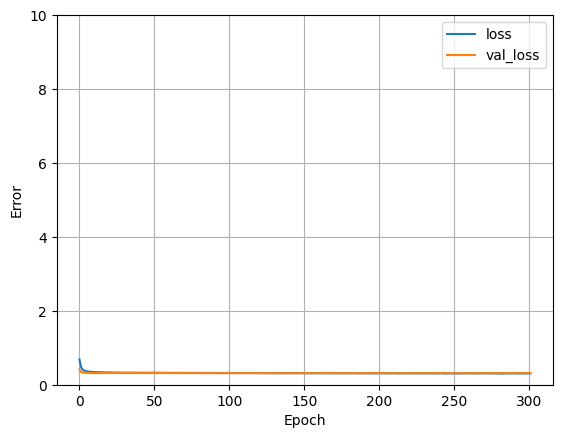

In [ ]:
plot_loss(history)

In [ ]:
def evaluate_dm(predictions, op_col, diff_col, db):

  # print("target")
  # print(target)
  num = len(predictions)
  if (len(predictions)) != len(op_col) or len(op_col) != len(diff_col):
    ValueError("wrong")
  error_sum = 0
  percent_diff_sum = 0
  percent_num = 0
  too_high_count = 0
  too_high_sum = 0
  correct_dir = 0

  pred_down = 0
  pred_down_correct = 0

  pred_up = 0
  pred_up_correct = 0

  winnings = 0

  for prediction, op_val, diff, (index, row) in zip(predictions, op_col, diff_col, db.iterrows()):
    prediction = prediction[0]
    error = abs(prediction - diff)
    if error > 10:
      num -= 1
      too_high_count += 1
      too_high_sum += error
      if (row["Almeria"] == 1):
        print(f"error too high, ignoring in calculation: Almeria")
      else:
        print(f"error too high, ignoring in calculation: NOT Almeria")
        # print(f"{row}")
    else:
      pred_dir = 1 if prediction >= 0 else 0
      true_dir = 1 if diff >= 0 else 0
      if pred_dir == 1:
        pred_up += 1
        if pred_dir == true_dir:
          pred_up_correct += 1
      else:
        pred_down += 1
        if pred_dir == true_dir:
          pred_down_correct += 1
        winnings += row["OP1_AVG"] - 1 if row["result"] == "H" else -1

      is_correct_dir = (prediction >= 0 and diff >= 0) or (prediction <= 0 and diff <= 0)
      if (is_correct_dir):
        correct_dir += 1
      error_sum += error
      if (diff == 0):
        percent_diff = -1
      else:
        percent_num += 1
        percent_diff = error/abs(diff)
        percent_diff_sum += percent_diff
    print(f"OP1X2: {format(op_val, '.3f')} diff: {format(diff, '.4f')} pred: {format(prediction, '.4f')}, error: {format(error, '.5f')}, % off {format(percent_diff * 100, '.3f')}% correct_dir: {is_correct_dir}")

  print(f"mean abs error: {error_sum/num}")
  # print(f"correct dir: {format((correct_dir/num) * 100, '.2f')}%")
  print(f"avg percent diff: {format((percent_diff_sum/num) * 100, '.2f')}%")
  print(f"too high: {too_high_count} occurences, avg of {too_high_sum/too_high_count}")
  print_percent_str("correct_dir", correct_dir, num)
  print_percent_str("correct_dir", correct_dir, num)
  print_percent_str("up accuracy", pred_up_correct, pred_up)
  print_percent_str("down accuracy", pred_down_correct, pred_down)
  print_percent_str("down ev", winnings, pred_down)

In [ ]:
comp_label = "OP1_AVG"
target = dm_test_target
features = dm_test_features
comp_db = dm_test
# max_odd = "D"
# mid_odd = "A"
# min_odd = "H"
# comp_db = dm_test[(dm_test["OP_MAX_ODD"] == max_odd) & (dm_test["OP_MID_ODD"] == mid_odd) & (dm_test["OP_MIN_ODD"] == min_odd)]
# targets = comp_db[curr_label].drop(columns=other_dropped_keys)
# features = comp_db.drop(columns=dropped_keys).drop(columns=other_dropped_keys)
num = len(target)
target = target[:num]
features = features[:num]
comp_data = comp_db[comp_label][:num]

predictions = model_6.predict(np.array(features))
# compare_predictions_single(predictions, comp_data, target)
evaluate_dm(predictions, comp_data, target, comp_db.iloc[:num])

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
OP1X2: 3.627 diff: -0.3000 pred: 0.1002, error: 0.40023, % off 133.408% correct_dir: False
OP1X2: 4.420 diff: -0.1700 pred: 0.0963, error: 0.26630, % off 156.647% correct_dir: False
OP1X2: 2.045 diff: 0.5740 pred: 0.0979, error: 0.47611, % off 82.946% correct_dir: True
OP1X2: 1.343 diff: 0.0730 pred: 0.0957, error: 0.02272, % off 31.123% correct_dir: True
OP1X2: 1.790 diff: 0.2370 pred: 0.0988, error: 0.13815, % off 58.292% correct_dir: True
OP1X2: 2.660 diff: 0.2280 pred: 0.0983, error: 0.12974, % off 56.905% correct_dir: True
OP1X2: 3.744 diff: 0.9900 pred: 0.1008, error: 0.88919, % off 89.817% correct_dir: True
OP1X2: 6.102 diff: 0.9950 pred: 0.0984, error: 0.89655, % off 90.106% correct_dir: True
OP1X2: 2.169 diff: 0.2410 pred: 0.0961, error: 0.14491, % off 60.128% correct_dir: True
OP1X2: 2.098 diff: -0.0950 pred: 0.0996, error: 0.19461, % off 204.849% correct_dir: False
OP1X2: 2.382 diff: 0.5160 pred: 0.0971, error: 0.41891, % off 81.184% co

ZeroDivisionError: division by zero

In [ ]:
features

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,DIFF1,DIFFX,DIFF2,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,HOME_POWER
2580,30,3.627,3.395,2.042,3.327,3.181,2.337,-0.300,-0.214,0.295,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.433333,0.400000,0.533333,0.166667,0.300000,0.400154,0.374559,0.225287,0.621622
2581,30,4.420,3.376,1.842,4.250,3.137,2.045,-0.170,-0.239,0.203,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.200000,0.266667,0.533333,0.566667,0.200000,0.233333,0.458601,0.350280,0.191118,0.500000
2586,30,3.744,3.370,2.013,4.734,3.421,1.853,0.990,0.051,-0.160,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.266667,0.266667,0.466667,0.466667,0.300000,0.233333,0.410211,0.369234,0.220554,0.648649
2587,30,6.102,4.633,1.467,7.097,4.867,1.437,0.995,0.234,-0.030,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.133333,0.333333,0.533333,0.533333,0.300000,0.133333,0.500082,0.379692,0.120226,0.439024
2593,31,3.225,3.124,2.344,3.323,3.034,2.426,0.098,-0.090,0.082,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.225806,0.354839,0.419355,0.387097,0.322581,0.290323,0.370988,0.359370,0.269642,0.735294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,34,3.573,3.536,1.993,3.144,3.550,2.233,-0.429,0.014,0.240,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.323529,0.235294,0.441176,0.676471,0.147059,0.176471,0.392551,0.388486,0.218963,0.588235
3382,34,6.293,4.738,1.430,5.543,4.527,1.546,-0.750,-0.211,0.116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.117647,0.264706,0.617647,0.794118,0.176471,0.029412,0.505016,0.380226,0.114758,0.283333
3394,35,4.289,3.504,1.819,5.005,3.703,1.728,0.716,0.199,-0.091,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.285714,0.371429,0.342857,0.628571,0.114286,0.257143,0.446213,0.364544,0.189243,0.687500
3397,35,3.496,3.374,2.060,3.120,3.265,2.369,-0.376,-0.109,0.309,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.285714,0.200000,0.514286,0.400000,0.371429,0.228571,0.391489,0.377828,0.230683,0.658537


In [ ]:
model_name = "DIFF_55A_31D_13EV.keras"
model_path = f"{model_save_pwd}/{model_name}"
model_6.save(f"{model_path}")
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/JSIP Final Project/models/DIFF_55A_31D_13EV.keras


# direction model

In [ ]:
dataset = get_dataset()

In [ ]:
dropped_keys = ["CP1_AVG", "CPX_AVG", "CP2_AVG", "DIR1", "DIRX", "DIR2"]
curr_label = "DIR1"
# dataset_uv["undervalued"] = get_max_diff(dataset_uv, False)
# dataset_uv = dataset_uv.drop(label_keys, axis=1)
dataset_dirm = get_dir_database(dataset.copy())
dataset_dirm = get_small_OHE_dataset(dataset_dirm)
dataset_dirm = get_stat_percent_database(dataset_dirm)
dirm_train, dirm_test = split_dataset(dataset_dirm, True)
# dirm_train = dirm_train.sample(frac=1)
get_dir_dataset_stats(dirm_train, curr_label)
# dirm_train = dirm_train_split.sample(frac=1)
# dirm_train = dirm_train.groupby(curr_label).sample(n=1206)
# get_dir_dataset_stats(dirm_train, curr_label)
# dirm_val = dirm_train.groupby(curr_label).sample(frac=.2)
# get_dir_dataset_stats(dirm_val, curr_label)
# dirm_train = dirm_train.drop(index=dirm_val.index)
# get_dir_dataset_stats(dirm_train, curr_label)
# dirm_train = dirm_train.sample(frac=1)
# dirm_val = dirm_val.sample(frac=1)

# dirm_val_target = dirm_val[curr_label]
dirm_train_target = dirm_train[curr_label]
dirm_test_target = dirm_test[curr_label]
# dirm_val_features = dirm_val.drop(columns=dropped_keys)
dirm_train_features = dirm_train.drop(columns=dropped_keys)
dirm_test_features = dirm_test.drop(columns=dropped_keys)

# dirm_val_target = np.array(dirm_val_target).astype('float32')
dirm_train_target = np.array(dirm_train_target).astype('float32')
dirm_test_target = np.array(dirm_test_target).astype('float32')
# dirm_val_features = np.array(dirm_val_features).astype('float32')
dirm_train_features = np.array(dirm_train_features).astype('float32')
dirm_test_features = np.array(dirm_test_features).astype('float32')

U% : 54.662%, 1454/2660; D% : 45.338%, 1206/2660


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=50,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(dirm_train_features)
steps_per_epoch = len(dirm_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)

dirm_weights = class_weight.compute_class_weight('balanced',
                                            classes=np.unique(np.array(dirm_train_target)),
                                            y=np.array(dirm_train_target))

model_7 = tf.keras.Sequential([
      # normalizer,
      layers.Dense(15, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      layers.Dense(15, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      layers.Dense(15, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      # layers.Dense(8, activation="sigmoid"),
      layers.Dense(1, activation="sigmoid")
])

model_7.compile(
    optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.015),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

In [ ]:
dirm_weights

array([1.103, 0.915])

In [ ]:
%%time
history = model_7.fit(
    dirm_train_features,
    dirm_train_target,
    epochs=400,
    callbacks=[early_stopping],
    # validation_freq=5,
    # Suppress logging.
    class_weight={0: dirm_weights[0], 1: dirm_weights[1]},
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4790 - loss: 0.9824 - val_accuracy: 0.4699 - val_loss: 0.7475
Epoch 2/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4542 - loss: 1.0114 - val_accuracy: 0.4718 - val_loss: 0.7320
Epoch 3/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4714 - loss: 0.9957 - val_accuracy: 0.4906 - val_loss: 0.7203
Epoch 4/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4598 - loss: 0.9804 - val_accuracy: 0.5282 - val_loss: 0.7116
Epoch 5/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 0.9441 - val_accuracy: 0.5414 - val_loss: 0.7043
Epoch 6/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 0.9126 - val_accuracy: 0.5395 - val_loss: 0.7002
Epoch 7/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4907 - loss: 0.9074 - val_accuracy: 0.5602 - val_loss: 0.6971
Epoch 8/400
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 0.9283 - val_accuracy: 0.5602 - v

760
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
pred: 0, real: 0.0
probability: [0.477]
pred: 1, real: 0.0
probability: [0.515]
pred: 1, real: 1.0
probability: [0.556]
pred: 1, real: 0.0
probability: [0.513]
pred: 1, real: 1.0
probability: [0.531]
pred: 0, real: 1.0
probability: [0.49]
pred: 1, real: 0.0
probability: [0.533]
pred: 1, real: 0.0
probability: [0.51]
pred: 1, real: 1.0
probability: [0.503]
pred: 1, real: 1.0
probability: [0.51]
pred: 1, real: 1.0
probability: [0.511]
pred: 0, real: 0.0
probability: [0.447]
pred: 1, real: 1.0
probability: [0.511]
pred: 0, real: 0.0
probability: [0.481]
pred: 0, real: 1.0
probability: [0.497]
pred: 1, real: 1.0
probability: [0.506]
pred: 1, real: 1.0
probability: [0.532]
pred: 1, real: 1.0
probability: [0.536]
pred: 0, real: 1.0
probability: [0.443]
pred: 0, real: 0.0
probability: [0.424]
pred: 0, real: 0.0
probability: [0.47]
pred: 1, real: 1.0
probability: [0.5]
pred: 0, real: 0.0
probability: [0.477]
pred: 0, real: 0.0
probability: [0.475]
pre

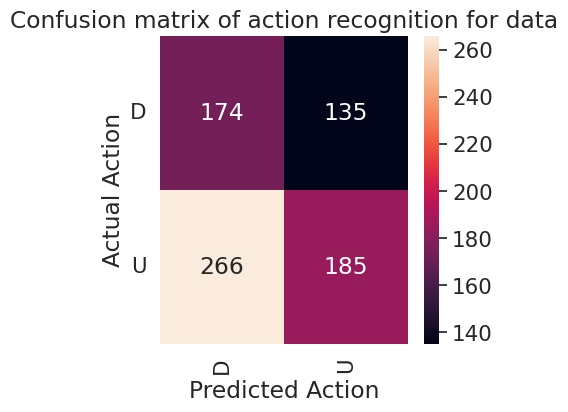

In [ ]:

# features = dirm_val_features
# target = dirm_val_target
# features = dirm_train_features
# target = dirm_train_target
features = dirm_test_features
target = dirm_test_target
num = len(features)
features = features[:num]
target = target[:num]

print(len(features))
predictions = model_7.predict(features)

# target_data = np.array(target).astype('float32')
# target_data = [x[0] for x in target_data]
correct = 0
predicted_classes = [1 if x >= 0.5 else 0 for x in predictions]
for prediction_class, target_val, raw_pred in zip(predicted_classes, target, predictions):
  # prediction_class = np.argmax(prediction)

  print(f"pred: {prediction_class}, real: {target_val}")
  print(f"probability: {raw_pred}")
  if prediction_class == target_val:
    correct += 1

print(f"correct: {correct/num}, {correct}/{num}")
# confusion_matrix = tf.math.confusion_matrix(
#     target,
#     predicted_classes,
#     num_classes=3,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )
# confusion_matrix
bce = keras.losses.BinaryCrossentropy()
loss = bce(target, predictions)
print(f"loss {loss}")
plot_confusion_matrix(target, predicted_classes, ["D", "U"], "data")

# stats dataset

In [ ]:
stats_dataset = get_dir_database(dataset.copy())
# stats_dataset = get_small_OHE_dataset(stats_dataset)
stats_dataset = get_odds_percent_database(stats_dataset)
stats_dataset = get_stat_percent_database(stats_dataset)

stats_dataset = stats_dataset.drop(columns=["home_team", "away_team"])
stats_dataset = stats_dataset.drop(stats_dataset[stats_dataset.games < 4].index)
stats_dataset = stats_dataset.drop(stats_dataset[abs(stats_dataset["home_wins_rate"] - stats_dataset["away_wins_rate"]) < .5].index)


stats_dataset = stats_dataset.drop(columns = ["OP1_AVG", "OPX_AVG", "OP2_AVG", "CP1_AVG", "CPX_AVG", "CP2_AVG", "DIRX", "DIR2"])

# stats_dataset = extreme_only["DIR1"]
# stats_dataset = extreme_only.drop(columns = ["DIR1"])
curr_label = "DIR1"
test_size = 42
get_dir_dataset_stats(stats_dataset, curr_label)
stats_dataset

stats_train = stats_dataset.iloc[:-test_size]
stats_test = stats_dataset.tail(test_size)

stats_train = stats_train.sample(frac=1)
get_dir_dataset_stats(stats_train, curr_label)
stats_train = stats_train.groupby(curr_label).sample(n=61)
get_dir_dataset_stats(stats_train, curr_label)
stats_val = stats_train.groupby(curr_label).sample(frac=.2)
get_dir_dataset_stats(stats_val, curr_label)
stats_train = stats_train.drop(index=stats_val.index)
get_dir_dataset_stats(stats_train, curr_label)
stats_train = stats_train.sample(frac=1)
stats_val = stats_val.sample(frac=1)

stats_val_target, stats_val_features = get_features_and_labels(stats_val, curr_label)
stats_train_target, stats_train_features = get_features_and_labels(stats_train, curr_label)
stats_test_target, stats_test_features = get_features_and_labels(stats_test, curr_label)

# stats_dataset.groupby(["DIR1"]).mean()

U% : 62.136%, 128/206; D% : 37.864%, 78/206
U% : 62.805%, 103/164; D% : 37.195%, 61/164
U% : 50.000%, 61/122; D% : 50.000%, 61/122
U% : 50.000%, 12/24; D% : 50.000%, 12/24
U% : 50.000%, 49/98; D% : 50.000%, 49/98


In [ ]:
stats_dataset = get_dir_database(dataset.copy())
stats_dataset = get_small_OHE_dataset(stats_dataset)
stats_dataset = get_odds_percent_database(stats_dataset)
stats_dataset = get_stat_percent_database(stats_dataset)

# stats_dataset = stats_dataset.drop(columns=["home_team", "away_team"])
stats_dataset = stats_dataset.drop(stats_dataset[stats_dataset.games < 4].index)
stats_dataset = stats_dataset.drop(stats_dataset[abs(stats_dataset["home_wins_rate"] - stats_dataset["away_wins_rate"]) < .5].index)
stats_train, stats_test = split_dataset(stats_dataset, True)
# pred = []
# diff_col = []
# correct = 0
# num = 0
# total = len(stats_dataset)
# label = "DIR1"
# for index, row in stats_dataset.iterrows():
#   diff = row["home_wins_rate"] - row["away_wins_rate"]
#   if abs(diff) < .5:
#     stats_dataset = stats_dataset.drop(index=index)
  # else:
  #   # print(f"{len(diff_col)}")
  #   diff_col.append(diff)
    # extreme_rows.loc[-1:] = row
    # print(row)
    # pd.concat([])

    # num += 1
    # pred = 0 if diff > 0 else 1
    # print(f"pred: {pred}, true: {row[label]}")
    # if pred == row[label]:
    #   correct += 1

# print(f"correct: {format(correct/num * 100, '.3f')}%, {correct}/{num}, total {total}")
    # predicting winning odds go down
# stats_train["DIFF1"] = diff_col
# # stats_train[:50]
# stats_train.groupby(["DIR1"]).mean()
# extreme_only["DIFF1"] = diff_col
# extreme_only = get_dir_database(extreme_only)

stats_dataset = stats_dataset.drop(columns = ["CP1_AVG", "CPX_AVG", "CP2_AVG", "DIRX", "DIR2"])

stats_dataset_target = extreme_only["DIR1"]
extreme_only_features = extreme_only.drop(columns = ["DIR1"])
# extreme_only.groupby(["DIR1"]).mean()

NameError: name 'extreme_only' is not defined

In [ ]:
stats_db = get_dir_database(dataset.copy())
# stats_db = get_small_OHE_dataset(stats_db)
stats_db = get_odds_percent_database(stats_db)
stats_db = get_stat_percent_database(stats_db)
stats_db = stats_db.drop(stats_db[stats_db.games < 4].index)

# stats_db = stats_db.drop(columns=["home_team", "away_team"])
stats_db.groupby(["DIR1"]).mean(numeric_only=True)
correct = 0
num = 0
preds = []
for index, row in stats_db.iterrows():
  diff = row["home_wins_rate"] - row["away_wins_rate"]
  if abs(diff) > .7:
    pred = 0 if row["home_wins_rate"] > row["away_wins_rate"] else 1
    preds.append(pred)
    num += 1
    if pred == row["DIR1"]:
      correct += 1
  else:
    preds.append(-1)

stats_db["predictions"] = preds
print(f"correct: {format(correct/num * 100, '.3f')}%, {correct}/{num}")
stats_db_diff = stats_db[(stats_db["predictions"] != -1)]
stats_db_diff

correct: 66.667%, 14/21


,home_team,away_team,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,DIR1,...,OP1_RATE,OPX_RATE,OP2_RATE,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,predictions
47,Malaga,Villarreal,4,2.568,3.177,2.784,2.840,3.182,2.596,1,...,0.301090,0.372494,0.326416,0.000000,0.500000,0.500000,0.750000,0.250000,0.000000,1
52,Real Madrid,Malaga,5,1.105,9.447,21.929,1.130,9.411,19.069,1,...,0.034020,0.290847,0.675133,0.800000,0.200000,0.000000,0.000000,0.400000,0.600000,0
69,Levante,Villarreal,6,4.069,3.443,1.906,4.370,3.416,1.890,1,...,0.432045,0.365577,0.202378,0.000000,0.500000,0.500000,0.833333,0.166667,0.000000,1
810,Girona,Barcelona,5,11.238,6.300,1.242,12.610,6.577,1.222,1,...,0.598403,0.335463,0.066134,0.200000,0.400000,0.400000,1.000000,0.000000,0.000000,1
840,Barcelona,Malaga,8,1.066,12.742,30.980,1.057,15.199,33.498,0,...,0.023801,0.284496,0.691703,0.875000,0.125000,0.000000,0.000000,0.125000,0.875000,0
1194,Leganes,Barcelona,5,11.469,6.597,1.216,12.659,6.098,1.249,1,...,0.594803,0.342133,0.063064,0.000000,0.200000,0.800000,0.800000,0.200000,0.000000,1
2339,Real Madrid,Villarreal,5,1.597,4.268,5.230,1.486,4.734,6.401,0,...,0.143939,0.384678,0.471384,1.000000,0.200000,0.000000,0.200000,0.800000,0.000000,0
2355,Getafe,Real Sociedad,7,3.663,3.119,2.168,3.500,2.933,2.414,0,...,0.409274,0.348492,0.242235,0.000000,0.000000,1.000000,0.714286,0.142857,0.142857,1
2703,Cadiz CF,Barcelona,4,7.923,4.939,1.407,9.390,5.291,1.337,1,...,0.555260,0.346135,0.098605,0.000000,0.000000,1.000000,0.750000,0.250000,0.000000,1
2705,Real Madrid,Mallorca,4,1.265,5.913,10.096,1.296,5.658,10.588,1,...,0.073231,0.342306,0.584462,1.000000,0.000000,0.000000,0.250000,0.500000,0.250000,0


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode="max",
    min_delta=0,
    patience=100,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stats_train_features)
steps_per_epoch = len(stats_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)

model_8 = tf.keras.Sequential([
      # normalizer,
      layers.Dense(8, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      layers.Dense(8, activation=tf.keras.layers.LeakyReLU()),
      layers.Dropout(rate=0.2),
      # layers.Dense(8, activation="sigmoid"),
      layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

In [ ]:
%%time
history = model_8.fit(
    stats_train_features,
    stats_train_target,
    epochs=400,
    callbacks=[early_stopping],
    # validation_freq=5,
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_data = (stats_val_features, stats_val_target))

Epoch 1/400
4/4 [==============================] - 2s 81ms/step - loss: 0.8749 - accuracy: 0.5408 - val_loss: 0.6786 - val_accuracy: 0.7083
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 0.9029 - accuracy: 0.4592 - val_loss: 0.6850 - val_accuracy: 0.5417
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7665 - accuracy: 0.5306 - val_loss: 0.6923 - val_accuracy: 0.5417
Epoch 4/400
4/4 [==============================] - 0s 13ms/step - loss: 0.8147 - accuracy: 0.5102 - val_loss: 0.7022 - val_accuracy: 0.5417
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 0.7414 - accuracy: 0.5408 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9165 - accuracy: 0.5204 - val_loss: 0.7252 - val_accuracy: 0.5000
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8397 - accuracy: 0.5306 - val_loss: 0.7402 - val_accuracy: 0.5000
Epoch 8/400
4/4 [===

42
2/2 [==============================] - 0s 5ms/step
pred: 1, real: 1.0
probability: [0.541]
pred: 1, real: 1.0
probability: [0.538]
pred: 1, real: 0.0
probability: [0.517]
pred: 0, real: 0.0
probability: [0.492]
pred: 0, real: 0.0
probability: [0.481]
pred: 1, real: 1.0
probability: [0.52]
pred: 1, real: 0.0
probability: [0.508]
pred: 1, real: 1.0
probability: [0.542]
pred: 1, real: 1.0
probability: [0.539]
pred: 1, real: 1.0
probability: [0.521]
pred: 0, real: 0.0
probability: [0.483]
pred: 0, real: 0.0
probability: [0.488]
pred: 1, real: 1.0
probability: [0.508]
pred: 0, real: 0.0
probability: [0.474]
pred: 1, real: 1.0
probability: [0.528]
pred: 0, real: 1.0
probability: [0.465]
pred: 0, real: 0.0
probability: [0.462]
pred: 0, real: 0.0
probability: [0.471]
pred: 0, real: 1.0
probability: [0.477]
pred: 0, real: 1.0
probability: [0.452]
pred: 1, real: 1.0
probability: [0.528]
pred: 0, real: 1.0
probability: [0.467]
pred: 1, real: 0.0
probability: [0.526]
pred: 0, real: 0.0
probabil

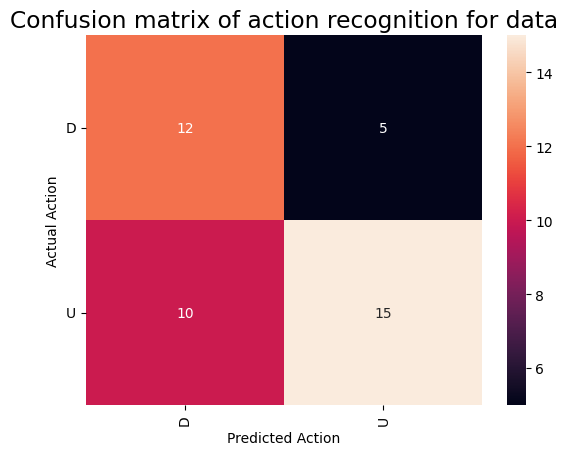

In [ ]:

# features = dirm_val_features
# target = dirm_val_target
# features = dirm_train_features
# target = dirm_train_target
features = stats_test_features
target = stats_test_target
num = len(features)
features = features[:num]
target = target[:num]

print(len(features))
predictions = model_8.predict(features)

# target_data = np.array(target).astype('float32')
# target_data = [x[0] for x in target_data]
correct = 0
predicted_classes = [1 if x >= 0.5 else 0 for x in predictions]
for prediction_class, target_val, raw_pred in zip(predicted_classes, target, predictions):
  # prediction_class = np.argmax(prediction)

  print(f"pred: {prediction_class}, real: {target_val}")
  print(f"probability: {raw_pred}")
  if prediction_class == target_val:
    correct += 1

print(f"correct: {correct/num}, {correct}/{num}")
# confusion_matrix = tf.math.confusion_matrix(
#     target,
#     predicted_classes,
#     num_classes=3,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )
# confusion_matrix
plot_confusion_matrix(target, predicted_classes, ["D", "U"], "data")

# data analysis

most movement: diff2

In [ ]:
dataset_with_result = get_dataset_with_season()

In [ ]:
al_dataset = get_stat_percent_database(dataset_with_result.copy())
al_dataset = get_diff_database(al_dataset)
al_dataset = get_odds_percent_database(al_dataset)
al_dataset = get_odds_percent_database_closing(al_dataset)
al_dataset = get_dir_database(al_dataset)
al_dataset["MAX_DIFF"] = get_max_diff(al_dataset)
al_dataset = get_odds_rankings(al_dataset, True)
al_dataset = get_odds_rankings(al_dataset, False)
al_dataset["OP_SUM"] = al_dataset["OP1_AVG"] + al_dataset["OPX_AVG"] + al_dataset["OP2_AVG"]
al_dataset["CP_SUM"] = al_dataset["CP1_AVG"] + al_dataset["CPX_AVG"] + al_dataset["CP2_AVG"]
al_test = al_dataset[(al_dataset["season"] == "2023/2024") | (al_dataset["season"] == "2022/2023")]
al_train = al_dataset.drop(index=al_test.index)
al_train_lm = al_train.drop(index=al_train[al_train.games < 4].index)
al_train

,home_team,away_team,games,date,season,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,MAX_DIFF,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,CP_MAX_ODD,CP_MID_ODD,CP_MIN_ODD,OP_SUM,CP_SUM
0,Malaga,Sevilla,0,21 Aug 2015,2015/2016,D,2.790,3.177,2.519,3.217,3.414,2.237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427,0.237,-0.282,0.328777,0.374381,0.296842,0.362765,0.384980,0.252255,1,1,0,A,D,H,A,D,H,A,8.486,8.868
1,Espanyol,Getafe,0,22 Aug 2015,2015/2016,H,1.884,3.356,4.140,1.994,3.245,4.134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110,-0.111,-0.006,0.200853,0.357783,0.441365,0.212739,0.346207,0.441054,1,0,0,D,A,D,H,A,D,H,9.380,9.373
2,Dep. La Coruna,Real Sociedad,0,22 Aug 2015,2015/2016,D,2.721,3.157,2.596,2.386,3.239,3.098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.335,0.082,0.502,0.321100,0.372551,0.306349,0.273530,0.371317,0.355153,0,1,1,H,D,H,A,D,A,H,8.474,8.723
3,Atl. Madrid,Las Palmas,0,22 Aug 2015,2015/2016,H,1.240,5.613,12.405,1.234,5.849,15.198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006,0.236,2.793,0.064389,0.291463,0.644148,0.055384,0.262511,0.682106,0,1,1,H,A,D,H,A,D,H,19.258,22.281
4,Rayo Vallecano,Valencia,0,22 Aug 2015,2015/2016,D,4.238,3.618,1.808,2.945,3.485,2.379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.293,-0.133,0.571,0.438535,0.374379,0.187086,0.334317,0.395618,0.270065,0,0,1,H,H,D,A,D,H,A,9.664,8.809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,Real Sociedad,Atl. Madrid,37,22 May 2022,2021/2022,A,2.453,3.315,2.853,2.697,3.144,2.824,0.459459,0.297297,0.243243,0.540541,0.216216,0.243243,0.244,-0.171,-0.029,0.284538,0.384526,0.330936,0.311252,0.362839,0.325909,1,0,0,D,D,A,H,D,A,H,8.621,8.665
2656,Osasuna,Mallorca,37,22 May 2022,2021/2022,A,3.499,3.526,2.177,2.997,3.238,2.504,0.324324,0.297297,0.378378,0.243243,0.243243,0.513514,-0.502,-0.288,0.327,0.380243,0.383178,0.236579,0.342945,0.370523,0.286532,0,0,1,H,D,H,A,D,H,A,9.202,8.739
2657,Elche,Getafe,37,22 May 2022,2021/2022,H,3.129,2.929,2.513,3.130,2.933,2.603,0.270270,0.243243,0.486486,0.216216,0.405405,0.378378,0.001,0.004,0.090,0.365068,0.341734,0.293198,0.361182,0.338449,0.300369,1,1,1,H,H,D,A,H,D,A,8.571,8.666
2658,Granada CF,Espanyol,37,22 May 2022,2021/2022,D,1.754,3.863,4.736,1.445,4.722,7.145,0.216216,0.351351,0.432432,0.270270,0.297297,0.432432,-0.309,0.859,2.409,0.169419,0.373129,0.457452,0.108549,0.354718,0.536734,0,1,1,H,A,D,H,A,D,H,10.353,13.312


In [ ]:
al_dataset

,home_team,away_team,games,date,season,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,MAX_DIFF,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,CP_MAX_ODD,CP_MID_ODD,CP_MIN_ODD,OP_SUM,CP_SUM
0,Malaga,Sevilla,0,21 Aug 2015,2015/2016,D,2.790,3.177,2.519,3.217,3.414,2.237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427,0.237,-0.282,0.328777,0.374381,0.296842,0.362765,0.384980,0.252255,1,1,0,A,D,H,A,D,H,A,8.486,8.868
1,Espanyol,Getafe,0,22 Aug 2015,2015/2016,H,1.884,3.356,4.140,1.994,3.245,4.134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110,-0.111,-0.006,0.200853,0.357783,0.441365,0.212739,0.346207,0.441054,1,0,0,D,A,D,H,A,D,H,9.380,9.373
2,Dep. La Coruna,Real Sociedad,0,22 Aug 2015,2015/2016,D,2.721,3.157,2.596,2.386,3.239,3.098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.335,0.082,0.502,0.321100,0.372551,0.306349,0.273530,0.371317,0.355153,0,1,1,H,D,H,A,D,A,H,8.474,8.723
3,Atl. Madrid,Las Palmas,0,22 Aug 2015,2015/2016,H,1.240,5.613,12.405,1.234,5.849,15.198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006,0.236,2.793,0.064389,0.291463,0.644148,0.055384,0.262511,0.682106,0,1,1,H,A,D,H,A,D,H,19.258,22.281
4,Rayo Vallecano,Valencia,0,22 Aug 2015,2015/2016,D,4.238,3.618,1.808,2.945,3.485,2.379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.293,-0.133,0.571,0.438535,0.374379,0.187086,0.334317,0.395618,0.270065,0,0,1,H,H,D,A,D,H,A,9.664,8.809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Real Madrid,Betis,37,25 May 2024,2023/2024,D,1.314,5.714,7.809,1.219,7.152,11.637,0.783784,0.189189,0.027027,0.378378,0.378378,0.243243,-0.095,1.438,3.828,0.088562,0.385118,0.526319,0.060926,0.357457,0.581617,0,1,1,H,A,D,H,A,D,H,14.837,20.008
3416,Sevilla,Barcelona,37,26 May 2024,2023/2024,A,3.341,3.939,1.954,4.479,4.244,1.692,0.270270,0.297297,0.432432,0.675676,0.189189,0.135135,1.138,0.305,-0.262,0.361815,0.426576,0.211609,0.430053,0.407489,0.162458,1,1,0,A,D,H,A,H,D,A,9.234,10.415
3417,Getafe,Mallorca,37,26 May 2024,2023/2024,A,2.250,3.304,3.124,2.330,3.162,3.284,0.270270,0.351351,0.378378,0.189189,0.432432,0.378378,0.080,-0.142,0.160,0.259276,0.380733,0.359991,0.265497,0.360301,0.374202,1,0,1,D,D,A,H,A,D,H,8.678,8.776
3418,Las Palmas,Alaves,37,26 May 2024,2023/2024,D,2.313,3.401,2.947,2.342,3.450,3.020,0.270270,0.243243,0.486486,0.324324,0.243243,0.432432,0.029,0.049,0.073,0.267059,0.392680,0.340261,0.265774,0.391512,0.342714,1,1,1,H,D,A,H,D,A,H,8.661,8.812


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# op_odds = zip(al_dataset["OP_MAX_ODD"], al_dataset["OP_MID_ODD"], al_dataset["OP_MIN_ODD"])
# cp_odds = zip(al_dataset["CP_MAX_ODD"], al_dataset["CP_MID_ODD"], al_dataset["CP_MIN_ODD"])
no_change = al_dataset[al_dataset["OP_MAX_ODD"] == al_dataset["CP_MAX_ODD"]]
no_change = no_change[no_change["OP_MID_ODD"] == no_change["CP_MID_ODD"]]
no_change = no_change[no_change["OP_MIN_ODD"] == no_change["CP_MIN_ODD"]]
print(f"no change len {format(len(no_change)/len(al_dataset) * 100, '.3f')}% {len(no_change)}/{len(al_dataset)}%")
change_dataset = al_dataset.drop(index=no_change.index)
change_dataset.describe()
# print(no_change.describe())

no change len 80.906% 2767/3420%


,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,18.549770,2.673859,3.276124,2.813077,2.763692,3.283118,2.896738,0.277694,0.276823,0.418440,0.369235,0.282492,0.323379,0.089833,0.006994,0.083662,0.304943,0.373633,0.321424,0.309192,0.366754,0.324054,0.542113,0.462481,0.531394,8.763060,8.943548
std,11.283004,0.534516,0.235531,0.496217,0.624274,0.307018,0.626248,0.170409,0.162676,0.191980,0.197682,0.185818,0.192321,0.551165,0.187518,0.491244,0.052519,0.015463,0.053954,0.063021,0.021376,0.063407,0.498605,0.498973,0.499396,0.416539,0.510368
min,0.000000,1.642000,2.798000,1.368000,1.335000,2.617000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.405001,-1.607000,-2.087000,0.156232,0.313941,0.091151,0.088335,0.297522,0.099192,0.000000,0.000000,0.000000,8.438000,8.561000
25%,9.000000,2.347000,3.139000,2.490000,2.330000,3.102000,2.442000,0.166667,0.192308,0.333333,0.250000,0.185185,0.200000,-0.202000,-0.089000,-0.268000,0.270270,0.364896,0.289821,0.264874,0.354030,0.279152,0.000000,0.000000,0.000000,8.558000,8.684000
50%,18.000000,2.603000,3.235000,2.782000,2.658000,3.234000,2.859000,0.272727,0.272727,0.428571,0.363636,0.263158,0.333333,0.069000,-0.005000,0.060000,0.303524,0.372875,0.325802,0.306014,0.365704,0.329096,1.000000,0.000000,1.000000,8.634000,8.792000
75%,29.000000,2.890000,3.369000,3.121000,3.101000,3.410000,3.282000,0.357143,0.351351,0.516129,0.500000,0.357143,0.432432,0.390000,0.076000,0.371000,0.337349,0.382542,0.360512,0.355576,0.379461,0.372093,1.000000,1.000000,1.000000,8.834000,9.027000
max,37.000000,8.520000,5.120000,5.134000,7.751000,6.015000,7.763000,1.000000,1.000000,1.000000,1.000000,2.000000,1.333333,4.139000,1.551000,3.359000,0.567697,0.426576,0.480577,0.550620,0.436419,0.513664,1.000000,1.000000,1.000000,15.008000,15.113000


In [ ]:
no_change.describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,18.488254,2.645905,4.126351,5.156853,2.747189,4.227743,5.406997,0.366349,0.269691,0.339199,0.349628,0.270195,0.354487,0.101285,0.101392,0.250144,0.245422,0.354458,0.400121,0.245511,0.348810,0.405679,0.560535,0.566317,0.590170,11.929109,12.381929
std,10.893711,1.976919,1.583578,4.699931,2.263262,1.791913,4.930371,0.219157,0.160043,0.206374,0.215746,0.156410,0.205221,0.692392,0.570382,1.442723,0.141537,0.026985,0.152886,0.147748,0.028980,0.158479,0.496412,0.495672,0.491891,5.770773,6.212287
min,0.000000,1.039000,2.794000,1.100000,1.031000,2.682000,1.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.759000,-2.987000,-9.798002,0.018200,0.183238,0.035008,0.015672,0.231372,0.027096,0.000000,0.000000,0.000000,8.446000,8.571000
25%,9.000000,1.594000,3.298500,2.517500,1.580500,3.302500,2.549500,0.222222,0.181818,0.193548,0.206897,0.185185,0.214286,-0.076000,-0.111500,-0.132500,0.142634,0.341029,0.293213,0.135333,0.331508,0.292647,0.000000,0.000000,0.000000,8.949500,9.105500
50%,19.000000,2.001000,3.561000,3.871000,1.998000,3.630000,4.066000,0.333333,0.257143,0.347826,0.323529,0.260870,0.370370,0.022000,0.033000,0.075000,0.217520,0.358477,0.420122,0.211904,0.350204,0.432014,1.000000,1.000000,1.000000,9.841000,10.241000
75%,28.000000,2.825500,4.263000,5.674500,2.920500,4.393000,6.125000,0.500000,0.347826,0.466667,0.486486,0.347826,0.500000,0.156500,0.225000,0.514000,0.328322,0.372263,0.506404,0.334907,0.369129,0.522364,1.000000,1.000000,1.000000,12.161500,12.759000
max,37.000000,20.314000,16.556000,39.494000,26.781000,21.078000,43.927000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,12.504001,7.787999,15.370999,0.653980,0.436047,0.778794,0.687905,0.446842,0.724476,1.000000,1.000000,1.000000,57.089000,66.040000


In [ ]:
al_dataset.describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
count,3420.00000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,18.50000,2.651242,3.964012,4.709343,2.750340,4.047380,4.927699,0.349422,0.271052,0.354329,0.353372,0.272543,0.348547,0.099098,0.083368,0.218356,0.256786,0.358119,0.385095,0.257670,0.352236,0.390094,0.557018,0.546491,0.578947,11.324597,11.725420
std,10.96746,1.793426,1.466646,4.332006,2.053872,1.659382,4.551301,0.213562,0.160550,0.206045,0.212528,0.162479,0.203162,0.667679,0.520847,1.316895,0.131454,0.026297,0.142906,0.138001,0.028571,0.148711,0.496811,0.497907,0.493800,5.340737,5.753103
min,0.00000,1.039000,2.794000,1.100000,1.031000,2.617000,1.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.405001,-2.987000,-9.798002,0.018200,0.183238,0.035008,0.015672,0.231372,0.027096,0.000000,0.000000,0.000000,8.438000,8.561000
25%,9.00000,1.689750,3.246750,2.510000,1.668000,3.238000,2.503750,0.214286,0.181818,0.217098,0.216216,0.185185,0.210526,-0.094000,-0.104000,-0.160000,0.160720,0.345257,0.292130,0.152161,0.335569,0.286756,0.000000,0.000000,0.000000,8.735000,8.877750
50%,18.50000,2.158500,3.456500,3.451000,2.171000,3.510000,3.575500,0.333333,0.259259,0.363636,0.333333,0.260870,0.360000,0.024500,0.019000,0.073500,0.243408,0.362394,0.388060,0.240112,0.354473,0.395215,1.000000,1.000000,1.000000,9.356500,9.665500
75%,28.00000,2.856250,4.020250,5.053000,3.000250,4.140000,5.487000,0.478261,0.348370,0.483871,0.489865,0.348370,0.473684,0.194000,0.192000,0.463000,0.333314,0.375248,0.480615,0.344749,0.371225,0.500249,1.000000,1.000000,1.000000,11.358250,11.855250
max,37.00000,20.314000,16.556000,39.494000,26.781000,21.078000,43.927000,2.000000,1.000000,2.000000,1.000000,2.000000,1.333333,12.504001,7.787999,15.370999,0.653980,0.436047,0.778794,0.687905,0.446842,0.724476,1.000000,1.000000,1.000000,57.089000,66.040000


In [ ]:
def get_odds_from_symbol(dataset, comp_label, is_opening):
  odds_label_pref = "OP" if is_opening else "CP"
  odds_list = []
  for index, row in dataset.iterrows():
    symbol = row[comp_label]
    if symbol == "H":
      odds_list.append(row[f"{odds_label_pref}1_AVG"])
    elif symbol == "D":
      odds_list.append(row[f"{odds_label_pref}X_AVG"])
    elif symbol == "A":
      odds_list.append(row[f"{odds_label_pref}2_AVG"])
    else:
      ValueError("invalid symbol")
  return odds_list

In [ ]:
outliers = al_dataset[abs(al_dataset["DIFF2"]) > 1]
outliers

,home_team,away_team,games,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,MAX_DIFF,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,CP_MAX_ODD,CP_MID_ODD,CP_MIN_ODD,OP_SUM,CP_SUM
3,Atl. Madrid,Las Palmas,0,H,1.240,5.613,12.405,1.234,5.849,15.198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006,0.236,2.793000,0.064389,0.291463,0.644148,0.055384,0.262511,0.682106,0,1,1,H,A,D,H,A,D,H,19.258,22.281
13,Celta Vigo,Rayo Vallecano,1,H,1.660,3.777,5.021,1.489,4.412,6.712,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.171,0.635,1.691000,0.158730,0.361159,0.480111,0.118053,0.349798,0.532149,0,1,1,H,A,D,H,A,D,H,10.458,12.613
14,Real Madrid,Betis,1,H,1.100,9.495,24.668,1.095,11.006,22.170,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.005,1.511,-2.497999,0.031194,0.269262,0.699543,0.031951,0.321146,0.646903,0,1,0,A,A,D,H,A,D,H,35.263,34.271
18,Las Palmas,Levante,1,D,2.041,3.257,3.745,1.804,3.436,4.847,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-0.237,0.179,1.102000,0.225699,0.360168,0.414132,0.178844,0.340636,0.480519,0,1,1,H,A,D,H,A,D,H,9.043,10.087
34,Real Sociedad,Espanyol,3,A,2.058,3.320,3.684,1.794,3.577,4.745,0.000000,0.666667,0.333333,0.333333,0.000000,0.666667,-0.264,0.257,1.061000,0.227102,0.366365,0.406533,0.177343,0.353598,0.469059,0,1,1,H,A,D,H,A,D,H,9.062,10.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,Ath Bilbao,Sevilla,36,H,1.676,3.923,4.775,1.559,4.200,5.818,0.472222,0.305556,0.222222,0.277778,0.305556,0.416667,-0.117,0.277,1.043000,0.161558,0.378157,0.460285,0.134664,0.362788,0.502548,0,1,1,H,A,D,H,A,D,H,10.374,11.577
3402,Atl. Madrid,Osasuna,36,A,1.349,5.130,8.142,1.312,5.400,10.012,0.638889,0.111111,0.250000,0.305556,0.222222,0.472222,-0.037,0.270,1.870000,0.092265,0.350865,0.556870,0.078450,0.322889,0.598661,0,1,1,H,A,D,H,A,D,H,14.621,16.724
3407,Mallorca,Almeria,36,D,1.641,3.705,5.390,1.382,4.531,9.230,0.194444,0.416667,0.388889,0.055556,0.305556,0.638889,-0.259,0.826,3.840000,0.152850,0.345101,0.502049,0.091263,0.299214,0.609523,0,1,1,H,A,D,H,A,D,H,10.736,15.143
3410,Girona,Granada CF,37,H,1.241,6.417,9.689,1.215,7.136,11.819,0.648649,0.162162,0.189189,0.108108,0.243243,0.648649,-0.026,0.719,2.130000,0.071540,0.369920,0.558540,0.060238,0.353793,0.585969,0,1,1,H,A,D,H,A,D,H,17.347,20.170


In [ ]:
al_dataset_chosen = al_dataset.copy()
al_dataset_chosen["CHOSEN"] = get_odds_from_symbol(al_dataset, "MAX_DIFF", False)
al_dataset_chosen
al_dataset_chosen["WINNINGS"] = al_dataset_chosen.apply(lambda x: (x["CHOSEN"] - 1) if x["result"] == x["MAX_DIFF"] else -1, axis=1)
al_dataset_chosen["WINNINGS"].sum() / len(al_dataset_chosen)
al_dataset_chosen.groupby(["MAX_DIFF"]).mean(numeric_only=True)
# al_dataset_wins = al_dataset_chosen[al_dataset_chosen["result"] == al_dataset_chosen["MAX_DIFF"]]
# al_dataset_losses = al_dataset_chosen[al_dataset_chosen["result"] != al_dataset_chosen["MAX_DIFF"]]

al_dataset_chosen.groupby(["result"]).mean(numeric_only=True)
al_dataset_chosen.mean(numeric_only=True)
# print(f"wins: {format(len(al_dataset_wins)/len(al_dataset) * 100, '.3f')}% {len(al_dataset_wins)}/{len(al_dataset)}%")
# al_dataset_wins

,0
games,18.500000
OP1_AVG,2.651242
OPX_AVG,3.964012
OP2_AVG,4.709343
CP1_AVG,2.750340
CPX_AVG,4.047380
CP2_AVG,4.927699
home_wins_rate,0.349422
home_tie_rate,0.271052
home_loss_rate,0.354329


In [ ]:
def print_percent(smaller_dataset, total_dataset):
  print(f"wins: {format(len(smaller_dataset)/len(total_dataset) * 100, '.3f')}% {len(smaller_dataset)}/{len(total_dataset)}")

In [ ]:
al_dataset_wins = al_dataset_chosen[al_dataset_chosen["result"] == "A"]
# al_dataset_wins = al_dataset_chosen
print_percent(al_dataset_wins[al_dataset_wins["result"] == al_dataset_wins["MAX_DIFF"]], al_dataset_wins)
al_dataset_wins["WINNINGS"].sum() / len(al_dataset_wins["WINNINGS"])
al_dataset_wins[al_dataset_wins["result"] == al_dataset_wins["MAX_DIFF"]].describe()
# len(al_dataset_wins[al_dataset_wins["result"] != al_dataset_wins["MAX_DIFF"]])

wins: 45.803% 442/965


,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM,CHOSEN,WINNINGS
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,19.036199,3.929948,3.807536,2.871706,4.698412,3.997287,2.610075,0.289756,0.271918,0.413355,0.449338,0.258477,0.260869,0.768464,0.189751,-0.261631,0.355791,0.363926,0.280284,0.390327,0.359109,0.250565,0.993213,0.690045,0.040724,10.609190,11.305774,2.610075,1.610075
std,11.643166,2.767938,1.078713,2.370493,3.643575,1.395253,2.115827,0.200317,0.159780,0.195150,0.235246,0.182264,0.191634,1.186381,0.508520,0.371981,0.132872,0.023972,0.131282,0.134341,0.026724,0.129223,0.082198,0.462999,0.197874,3.838654,4.765759,2.115827,2.115827
min,0.000000,1.062000,2.798000,1.100000,1.076000,2.754000,1.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027000,-0.993000,-4.342001,0.022018,0.259133,0.035008,0.024952,0.271688,0.027096,0.000000,0.000000,0.000000,8.468000,8.591000,1.083000,0.083000
25%,8.000000,2.253500,3.233500,1.780000,2.523750,3.252250,1.632750,0.171675,0.189189,0.321717,0.281250,0.166667,0.107384,0.216000,-0.022000,-0.335750,0.257762,0.349535,0.176736,0.290725,0.341504,0.146537,1.000000,0.000000,0.000000,8.695000,8.847250,1.632750,0.632750
50%,19.000000,2.973000,3.415000,2.410000,3.528000,3.491500,2.167000,0.285714,0.264706,0.416667,0.444444,0.250000,0.250000,0.431500,0.076000,-0.159500,0.344557,0.366765,0.279046,0.389700,0.361452,0.240981,1.000000,1.000000,0.000000,9.153000,9.418000,2.167000,1.167000
75%,29.750000,4.567250,3.931750,3.234000,5.550750,4.141500,2.908500,0.377534,0.333333,0.500000,0.628571,0.333333,0.400000,0.887000,0.274750,-0.065750,0.449507,0.379548,0.367370,0.494703,0.377827,0.334416,1.000000,1.000000,0.000000,10.740500,11.487250,2.908500,1.908500
max,37.000000,20.314000,12.499000,34.673000,26.781000,12.227000,30.331000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.504001,4.765000,0.034000,0.653980,0.426897,0.718850,0.685321,0.432582,0.703360,1.000000,1.000000,1.000000,48.234000,43.123000,30.331000,29.331000


In [ ]:
al_dataset_losses.groupby(["result"]).mean(numeric_only=True)

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM,CHOSEN,WINNINGS
result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,17.946463,3.278243,3.683294,3.212033,3.073587,3.678392,3.591512,0.300487,0.295383,0.374764,0.389131,0.270419,0.307145,-0.204656,-0.004902,0.379480,0.315630,0.365171,0.319199,0.299479,0.358069,0.342452,0.315488,0.449331,0.929254,10.173570,10.343491,3.470130,-1.0
D,18.113798,2.671179,3.716465,4.052202,2.733661,3.796156,4.217403,0.332780,0.266961,0.370782,0.351762,0.276977,0.341292,0.062482,0.079691,0.165201,0.268036,0.361191,0.370773,0.267629,0.357490,0.374881,0.490754,0.625889,0.533428,10.439846,10.747220,3.398708,-1.0
H,18.685714,2.155384,4.262846,6.139701,2.352517,4.106727,5.591175,0.385629,0.262801,0.327681,0.320911,0.281495,0.378815,0.197133,-0.156119,-0.548526,0.209191,0.350363,0.440446,0.227221,0.347373,0.425406,0.932919,0.273292,0.249689,12.557930,12.050419,5.846234,-1.0


In [ ]:
al_train.groupby("result").mean(numeric_only=True)

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
result,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,18.601333,3.710344,3.796363,3.090235,3.948796,3.895621,3.183715,0.294785,0.289920,0.391768,0.408081,0.274988,0.287433,0.238452,0.099259,0.093480,0.337100,0.362904,0.299996,0.342952,0.357915,0.299133,0.606667,0.581333,0.529333,10.596941,11.028132
D,17.578348,2.682573,3.709729,4.059583,2.744900,3.737160,4.193751,0.331249,0.279318,0.361176,0.351869,0.279615,0.335665,0.062328,0.027430,0.134168,0.269667,0.360314,0.370019,0.270857,0.354317,0.374826,0.559829,0.504274,0.575499,10.451885,10.675811
H,18.972682,2.090060,4.355593,6.399324,2.114389,4.474548,6.710561,0.387183,0.267947,0.320937,0.313560,0.281142,0.386681,0.024329,0.118955,0.311238,0.200978,0.351147,0.447876,0.197344,0.346737,0.455919,0.501656,0.580298,0.601821,12.844977,13.299498


In [ ]:
def print_percent_str(str_label, small_num, total):
  if total != 0:
    print(f"{str_label}: {format(small_num/total * 100, '.3f')}%      {format(small_num, '.3f')}/{total}")
  else:
    print(f"{str_label}: invalid%      {small_num}/{total}")

In [ ]:
def print_odds_rates(dataset, is_opening):
  pref = "OP" if is_opening else "CP"
  rate1 = dataset[f"{pref}1_RATE"].mean()
  rateX = dataset[f"{pref}X_RATE"].mean()
  rate2 = dataset[f"{pref}2_RATE"].mean()
  print(f"{pref} odds rate: {format(rate1, '.3f')}, {format(rateX, '.3f')}, {format(rate2, '.3f')}")

In [ ]:
def print_min_max_mid_rates(dataset, lm_dataset, result, label, is_opening):
  pref = "OP" if is_opening else "CP"
  count = len(lm_dataset)
  max_num = len(lm_dataset[lm_dataset[f"{pref}_MAX_ODD"] == result])
  mid_num = len(lm_dataset[lm_dataset[f"{pref}_MID_ODD"] == result])
  min_num = len(lm_dataset[lm_dataset[f"{pref}_MIN_ODD"] == result])

  total_result_maxs = len(dataset[dataset[f"{pref}_MAX_ODD"] == result])
  total_result_mids = len(dataset[dataset[f"{pref}_MID_ODD"] == result])
  total_result_mins = len(dataset[dataset[f"{pref}_MIN_ODD"] == result])
  dataset_len = len(dataset)
  print(f"stats data for {pref}")
  # when H wins, how often is it max/mid/min
  print_percent_str(f"when {result} wins, rate of maxs", max_num, count)
  print_percent_str(f"when {result} wins, rate of mids", mid_num, count)
  print_percent_str(f"when {result} wins, rate of mins", min_num, count)

  # how often is H max/mid/min in general (not necessarily when it wins)
  print_percent_str(f"{result} rate of maxs in dataset", total_result_maxs, dataset_len)
  print_percent_str(f"{result} rate of mids in dataset", total_result_mids, dataset_len)
  print_percent_str(f"{result} rate of mins in dataset", total_result_mins, dataset_len)

  # how often does H win as max/mid/min
  print_percent_str(f"{result} rate of wins as max", max_num, total_result_maxs)
  print_percent_str(f"{result} rate of wins as mid", mid_num, total_result_mids)
  print_percent_str(f"{result} rate of wins as min", min_num, total_result_mins)

  # winning average max/mid/min odds
  max_win_odds = lm_dataset[lm_dataset[f"{pref}_MAX_ODD"] == result][label].mean()
  mid_win_odds = lm_dataset[lm_dataset[f"{pref}_MID_ODD"] == result][label].mean()
  min_win_odds = lm_dataset[lm_dataset[f"{pref}_MIN_ODD"] == result][label].mean()
  print(f"when {result} wins as max, avg odds: {format(max_win_odds, '.3f')}")
  print(f"when {result} wins as mid, avg odds: {format(mid_win_odds, '.3f')}")
  print(f"when {result} wins as min, avg odds: {format(min_win_odds, '.3f')}")

  # dataset average max/mid/min odds
  max_odds = dataset[dataset[f"{pref}_MAX_ODD"] == result][label].mean()
  mid_odds = dataset[dataset[f"{pref}_MID_ODD"] == result][label].mean()
  min_odds = dataset[dataset[f"{pref}_MIN_ODD"] == result][label].mean()
  print(f"when {result} is max, avg odds: {format(max_odds, '.3f')}")
  print(f"when {result} is mid, avg odds: {format(mid_odds, '.3f')}")
  print(f"when {result} is min, avg odds: {format(min_odds, '.3f')}")

  # ev
  max_win_rate = max_num / total_result_maxs if total_result_maxs != 0 else 0
  mid_win_rate = mid_num / total_result_mids if total_result_mids != 0 else 0
  min_win_rate = min_num / total_result_mins if total_result_mins != 0 else 0
  print(f"EV for {result} as max = {format(max_win_rate * max_win_odds, '.3f')}")
  print(f"EV for {result} as mid = {format(mid_win_rate * mid_win_odds, '.3f')}")
  print(f"EV for {result} as min = {format(min_win_rate * min_win_odds, '.3f')}")

In [ ]:
# home info
# odds

def print_result_stats(result):
  if result == "H":
    label = "OP1_AVG"
  elif result == "D":
    label = "OPX_AVG"
  else:
    label = "OP2_AVG"

  al_train_lm = al_train.drop(index=al_train[al_train.games < 4].index)
  al_stat = al_train_lm[al_train_lm["result"] == result]
  mean = al_stat[label].mean()
  std = al_stat[label].std()
  op1_odds_rate = al_stat["OP1_RATE"].mean()
  opx_odds_rate = al_stat["OPX_RATE"].mean()
  op2_odds_rate = al_stat["OP2_RATE"].mean()

  hwr, hdr, hlr = al_stat["home_wins_rate"].mean(), al_stat["home_tie_rate"].mean(), al_stat["home_loss_rate"].mean()
  awr, adr, alr = al_stat["away_wins_rate"].mean(), al_stat["away_tie_rate"].mean(), al_stat["away_loss_rate"].mean()

  print(f"{result} win stats: ")
  print(f"{label} mean: {(format(mean, '.3f'))}, std: {format(std, '.3f')}")
  # print(f"op odds rates: {format(op1_odds_rate, '.3f')}, {format(opx_odds_rate, '.3f')}, {format(op2_odds_rate, '.3f')}")
  print_odds_rates(al_stat, True)
  print_odds_rates(al_stat, False)
  print(f"home win rates: {format(hwr, '.3f')}, {format(hdr, '.3f')}, {format(hlr, '.3f')}")
  print(f"away win rates: {format(awr, '.3f')}, {format(adr, '.3f')}, {format(alr, '.3f')}")
  # when H wins, how often is it max/mid/min
  print_min_max_mid_rates(al_train_lm, al_stat, result, label, True)
  print_min_max_mid_rates(al_train_lm, al_stat, result, label, False)


In [ ]:

print_result_stats("H")
print("")
print_result_stats("D")
print("")
print_result_stats("A")

H win stats: 
OP1_AVG mean: 2.100, std: 1.135
OP odds rate: 0.202, 0.352, 0.447
CP odds rate: 0.198, 0.347, 0.455
home win rates: 0.395, 0.274, 0.328
away win rates: 0.325, 0.282, 0.393
stats data for OP
when H wins, rate of maxs: 8.590%      95/1106
when H wins, rate of mids: 6.510%      72/1106
when H wins, rate of mins: 84.901%      939/1106
H rate of maxs in dataset: 18.487%      440/2380
H rate of mids in dataset: 10.672%      254/2380
H rate of mins in dataset: 70.840%      1686/2380
H rate of wins as max: 21.591%      95/440
H rate of wins as mid: 28.346%      72/254
H rate of wins as min: 55.694%      939/1686
when H wins as max, avg odds: 4.855
when H wins as mid, avg odds: 2.932
when H wins as min, avg odds: 1.758
when H is max, avg odds: 5.660
when H is mid, avg odds: 2.950
when H is min, avg odds: 1.874
EV for H as max = 1.048
EV for H as mid = 0.831
EV for H as min = 0.979
stats data for CP
when H wins, rate of maxs: 9.313%      103/1106
when H wins, rate of mids: 5.244%  

In [ ]:
h_min_wins = al_train_lm[(al_train_lm["OP_MIN_ODD"] == "H") & (al_train_lm["result"] == "H")]
h_min_wins.describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,20.617678,1.757667,4.474911,7.061887,1.761368,4.600190,7.396805,0.419271,0.271578,0.306457,0.296579,0.284853,0.420341,0.003702,0.125279,0.334918,0.166291,0.348515,0.485194,0.162140,0.344084,0.493776,0.498403,0.576145,0.608094,13.294464,13.758363
std,9.634567,0.425774,2.086045,5.875901,0.450670,2.344339,6.097533,0.181235,0.118563,0.169828,0.136180,0.121297,0.148084,0.182266,0.718536,1.927719,0.078773,0.029997,0.102366,0.080618,0.030858,0.101692,0.500264,0.494431,0.488436,7.617723,8.085048
min,4.000000,1.039000,2.835000,2.617000,1.031000,2.807000,2.297000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.655000,-2.987000,-9.798002,0.018200,0.183238,0.302929,0.015672,0.231372,0.258235,0.000000,0.000000,0.000000,8.472000,8.584000
25%,12.000000,1.403000,3.335500,3.646500,1.405000,3.352000,3.826000,0.285714,0.191392,0.171429,0.200000,0.205882,0.333333,-0.086000,-0.112000,-0.270000,0.102242,0.333607,0.401576,0.098028,0.326713,0.414652,0.000000,0.000000,0.000000,9.055000,9.231000
50%,21.000000,1.739000,3.664000,4.849000,1.692000,3.765000,5.332000,0.400000,0.258065,0.312500,0.285714,0.277778,0.411765,0.000000,0.047000,0.239000,0.171055,0.354536,0.472869,0.157758,0.346920,0.490581,0.000000,1.000000,1.000000,10.218000,10.774000
75%,29.000000,2.071000,4.561000,7.711000,2.070000,4.675000,8.204500,0.571429,0.342857,0.411765,0.375000,0.355991,0.516129,0.081500,0.245000,0.881000,0.229396,0.369008,0.559632,0.224452,0.365943,0.567058,1.000000,1.000000,1.000000,13.717000,14.423000
max,37.000000,3.130000,16.556000,39.494000,3.247000,21.078000,43.927000,1.000000,0.800000,1.000000,0.800000,0.833333,1.000000,0.818000,7.787999,15.147000,0.315869,0.409112,0.778794,0.371086,0.416406,0.724476,1.000000,1.000000,1.000000,57.089000,66.040000


In [ ]:
h_min_losses = al_train_lm[(al_train_lm["OP_MIN_ODD"] == "H") & (al_train_lm["result"] != "H")]
h_min_losses.describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,20.188755,2.020149,3.680079,4.646356,2.074507,3.718825,4.822689,0.356934,0.280780,0.362942,0.305574,0.295074,0.402712,0.054359,0.038746,0.176333,0.214233,0.360859,0.424907,0.216199,0.354668,0.429133,0.570281,0.508701,0.568942,10.346584,10.616021
std,10.043230,0.396575,1.073355,3.125086,0.480771,1.170411,3.191656,0.170648,0.136301,0.163938,0.138910,0.123163,0.151199,0.217508,0.353679,1.065814,0.068614,0.022227,0.083418,0.077593,0.025197,0.091180,0.495368,0.500259,0.495556,3.894428,3.998926
min,4.000000,1.064000,2.794000,2.580000,1.078000,2.747000,2.167000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.731000,-2.211000,-7.905001,0.022664,0.271589,0.293482,0.026626,0.270783,0.239500,0.000000,0.000000,0.000000,8.450000,8.571000
25%,11.000000,1.738500,3.210500,3.088500,1.723000,3.181000,3.157000,0.250000,0.194444,0.250000,0.213203,0.217391,0.315789,-0.078000,-0.112000,-0.217000,0.171463,0.349600,0.356752,0.162861,0.338967,0.359896,0.000000,0.000000,0.000000,8.680500,8.786000
50%,20.000000,2.048000,3.375000,3.721000,2.051000,3.386000,3.846000,0.333333,0.269231,0.368421,0.285714,0.285714,0.400000,0.027000,0.005000,0.083000,0.225600,0.364114,0.410270,0.221884,0.355923,0.416121,1.000000,1.000000,1.000000,9.083000,9.234000
75%,29.000000,2.349000,3.673500,4.778000,2.416000,3.779500,5.142500,0.460499,0.352941,0.473684,0.380131,0.367544,0.500000,0.162500,0.135000,0.482500,0.270650,0.375314,0.469417,0.275152,0.371356,0.489524,1.000000,1.000000,1.000000,10.151500,10.572000
max,37.000000,2.759000,12.750000,33.132000,3.534000,12.941000,26.467000,1.000000,1.000000,0.857143,0.818182,0.833333,1.000000,0.966000,2.838000,10.993000,0.325162,0.424738,0.705747,0.393783,0.434332,0.697768,1.000000,1.000000,1.000000,46.946000,40.486000


In [ ]:
al_train_lm_pwr = al_train_lm.copy()
al_train_lm_pwr["HOME_POWER"] = (al_train_lm["home_wins_rate"] * 2 + al_train_lm["home_tie_rate"]) / (al_train_lm["away_wins_rate"] * 2 + al_train_lm["away_tie_rate"])
al_train_lm_pwr["HOME_POWER"] = [10 if x > 10 else x for x in al_train_lm_pwr["HOME_POWER"]]
al_train_lm_pwr

,home_team,away_team,games,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,MAX_DIFF,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,CP_MAX_ODD,CP_MID_ODD,CP_MIN_ODD,OP_SUM,CP_SUM,HOME_POWER
40,Granada CF,Real Sociedad,4,A,2.528,3.115,2.900,2.539,3.125,2.978,0.250000,0.000000,0.750000,0.000000,0.500000,0.500000,0.011,0.010,0.078,0.295915,0.364626,0.339459,0.293798,0.361606,0.344596,1,1,1,D,D,A,H,D,A,H,8.543,8.642,1.000000
41,Espanyol,Valencia,4,H,3.329,3.263,2.187,3.115,3.299,2.343,0.500000,0.000000,0.500000,0.250000,0.750000,0.000000,-0.214,0.036,0.156,0.379200,0.371682,0.249117,0.355715,0.376727,0.267557,0,1,1,H,H,D,A,D,H,A,8.779,8.757,0.800000
42,Atl. Madrid,Getafe,4,H,1.244,5.543,13.128,1.331,4.873,11.233,0.750000,0.000000,0.250000,0.250000,0.000000,0.750000,0.087,-0.670,-1.895,0.062465,0.278333,0.659202,0.076332,0.279463,0.644205,1,0,0,A,A,D,H,A,D,H,19.915,17.437,3.000000
43,Rayo Vallecano,Gijon,4,H,2.113,3.384,3.412,2.142,3.415,3.433,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.029,0.031,0.021,0.237176,0.379841,0.382983,0.238265,0.379867,0.381869,1,1,1,A,A,D,H,A,D,H,8.909,8.990,0.750000
44,Levante,Eibar,4,D,2.382,3.094,3.138,2.367,3.020,3.368,0.000000,0.500000,0.500000,0.500000,0.250000,0.250000,-0.015,-0.074,0.230,0.276527,0.359183,0.364291,0.270360,0.344946,0.384694,0,0,1,D,A,D,H,A,D,H,8.614,8.755,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,Real Sociedad,Atl. Madrid,37,A,2.453,3.315,2.853,2.697,3.144,2.824,0.459459,0.297297,0.243243,0.540541,0.216216,0.243243,0.244,-0.171,-0.029,0.284538,0.384526,0.330936,0.311252,0.362839,0.325909,1,0,0,D,D,A,H,D,A,H,8.621,8.665,0.937500
2656,Osasuna,Mallorca,37,A,3.499,3.526,2.177,2.997,3.238,2.504,0.324324,0.297297,0.378378,0.243243,0.243243,0.513514,-0.502,-0.288,0.327,0.380243,0.383178,0.236579,0.342945,0.370523,0.286532,0,0,1,H,D,H,A,D,H,A,9.202,8.739,1.296296
2657,Elche,Getafe,37,H,3.129,2.929,2.513,3.130,2.933,2.603,0.270270,0.243243,0.486486,0.216216,0.405405,0.378378,0.001,0.004,0.090,0.365068,0.341734,0.293198,0.361182,0.338449,0.300369,1,1,1,H,H,D,A,H,D,A,8.571,8.666,0.935484
2658,Granada CF,Espanyol,37,D,1.754,3.863,4.736,1.445,4.722,7.145,0.216216,0.351351,0.432432,0.270270,0.297297,0.432432,-0.309,0.859,2.409,0.169419,0.373129,0.457452,0.108549,0.354718,0.536734,0,1,1,H,A,D,H,A,D,H,10.353,13.312,0.935484


In [ ]:
al_train_lm_pwr[(al_train_lm_pwr["OP_MAX_ODD"] == "H") & (al_train_lm_pwr["result"] == "H")].describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM,HOME_POWER
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,20.252632,4.854674,3.792674,1.870642,5.088905,3.895095,1.910337,0.266885,0.272595,0.459068,0.536969,0.266676,0.185607,0.234232,0.102421,0.039695,0.447128,0.362517,0.190355,0.448902,0.360519,0.190579,0.610526,0.631579,0.484211,10.517989,10.894337,0.623223
std,10.445368,1.979819,0.778149,0.351101,2.392722,0.874993,0.428294,0.150599,0.105943,0.139394,0.169907,0.119354,0.137888,1.237000,0.393249,0.248401,0.069970,0.021213,0.062427,0.082710,0.028205,0.071118,0.490218,0.484935,0.502402,2.420756,2.852541,0.220330
min,4.000000,2.899000,2.867000,1.215000,2.110000,2.825000,1.211000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400001,-0.915000,-0.402000,0.341756,0.303671,0.062034,0.228157,0.256214,0.055881,0.000000,0.000000,0.000000,8.446000,8.622000,0.000000
25%,10.500000,3.531500,3.340500,1.583500,3.435500,3.328000,1.584000,0.166667,0.200000,0.400000,0.422648,0.200000,0.076923,-0.320500,-0.084500,-0.096500,0.394616,0.349805,0.140696,0.383719,0.342958,0.136283,0.000000,0.000000,0.000000,8.979000,9.122000,0.500000
50%,20.000000,3.996000,3.517000,1.895000,4.276000,3.631000,1.857000,0.250000,0.266667,0.450000,0.571429,0.250000,0.166667,0.172000,0.067000,0.000000,0.424866,0.365577,0.200524,0.444508,0.362733,0.190608,1.000000,1.000000,0.000000,9.540000,9.732000,0.575000
75%,29.000000,5.530000,4.033000,2.103500,5.840000,4.112500,2.175000,0.344952,0.348913,0.533333,0.653125,0.333333,0.274295,0.790500,0.193000,0.133500,0.487884,0.376302,0.234417,0.505593,0.379352,0.241048,1.000000,1.000000,1.000000,11.260500,11.625000,0.776190
max,37.000000,11.567000,6.804000,2.709000,15.277000,7.005000,3.203000,0.750000,0.500000,0.833333,1.000000,0.750000,0.513514,6.103001,1.949000,1.247000,0.601972,0.403014,0.318369,0.687905,0.436419,0.367485,1.000000,1.000000,1.000000,19.586000,22.208000,1.185185


In [ ]:
al_train_lm_pwr[(al_train_lm_pwr["OP_MAX_ODD"] == "H") & (al_train_lm_pwr["result"] != "H")].describe()

,games,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,DIFF1,DIFFX,DIFF2,OP1_RATE,OPX_RATE,OP2_RATE,CP1_RATE,CPX_RATE,CP2_RATE,DIR1,DIRX,DIR2,OP_SUM,CP_SUM,HOME_POWER
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,20.971014,5.882377,4.140745,1.738609,6.280974,4.288243,1.757545,0.276192,0.291154,0.434384,0.570144,0.247692,0.171289,0.398597,0.147499,0.018936,0.478544,0.355728,0.165728,0.484225,0.351976,0.163800,0.614493,0.602899,0.513043,11.761730,12.326762,0.622441
std,9.530201,2.952309,1.145622,0.350733,3.691432,1.465097,0.388384,0.127305,0.117563,0.146472,0.147119,0.109834,0.114712,1.670232,0.647351,0.185135,0.076399,0.023011,0.065409,0.081003,0.026967,0.069679,0.487422,0.490008,0.500556,3.774616,4.820136,0.205517
min,4.000000,2.990000,2.819000,1.100000,2.567000,2.744000,1.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.405001,-1.741000,-0.739000,0.351806,0.294805,0.035008,0.294990,0.282854,0.027096,0.000000,0.000000,0.000000,8.496000,8.619000,0.000000
25%,13.000000,3.748000,3.338000,1.462000,3.881000,3.339000,1.445000,0.200000,0.214286,0.333333,0.470588,0.166667,0.090909,-0.299000,-0.122000,-0.072000,0.409274,0.338413,0.114351,0.416546,0.334739,0.107988,0.000000,0.000000,0.000000,9.129000,9.319000,0.500000
50%,21.000000,4.919000,3.722000,1.725000,5.122000,3.785000,1.707000,0.269231,0.291667,0.428571,0.588235,0.230769,0.160000,0.208000,0.069000,0.006000,0.475979,0.359837,0.169243,0.483635,0.353581,0.160652,1.000000,1.000000,1.000000,10.295000,10.683000,0.608696
75%,29.000000,6.889000,4.591000,2.040000,7.203000,4.707000,2.049000,0.357143,0.375000,0.513514,0.666667,0.307692,0.241379,0.838000,0.277000,0.092000,0.534100,0.373632,0.223580,0.545516,0.371726,0.221377,1.000000,1.000000,1.000000,12.757000,13.299000,0.730769
max,37.000000,20.314000,10.007000,2.587000,26.781000,12.227000,2.861000,0.750000,0.777778,1.000000,1.000000,0.750000,0.615385,12.504001,4.765000,0.947000,0.653980,0.404983,0.304496,0.685321,0.420736,0.328775,1.000000,1.000000,1.000000,31.421000,39.969000,1.666667


In [ ]:
al_filter = al_train_lm_pwr[((al_train_lm_pwr["OP_MIN_ODD"] == "H") & (al_train_lm_pwr["HOME_POWER"] > 3))]
al_filter
filter_odds = al_filter[al_filter["result"] == "H"]["OP1_AVG"].mean()
num_correct = len(al_filter[al_filter["result"] == "H"])
total = len(al_filter)
win_percent = num_correct / total
print_percent_str("", num_correct, total)
print(f"odds: {filter_odds}")
print(f"ev = {filter_odds * win_percent}")

: 70.588%      24/34
odds: 1.4215833333333334
ev = 1.0034705882352943


In [ ]:
al_mv = al_train_lm[(al_train_lm["OP_MIN_ODD"] == "H") & (al_train_lm["CP1_AVG"] > al_train_lm["OP1_AVG"])]
mv_correct = al_mv[al_mv["result"] == "H"]
mv_odds = mv_correct["CP1_AVG"].mean()
num_correct = len(mv_correct)
total = len(al_mv)
win_percent = num_correct / total
print_percent_str("", num_correct, total)
print(f"odds: {mv_odds}")
print(f"ev = {mv_odds * win_percent}")

: 52.349%      468/894
odds: 1.8509123931623932
ev = 0.968934004474273


In [ ]:
def examine_changes(dataset, label, is_opening):
  symbols =["OP_MAX_ODD", "OP_MID_ODD", "OP_MIN_ODD"]
  pref = "OP" if is_opening else "CP"
  if label == "H":
    odds_suffix = "1_AVG"
    diff_label = "DIFF1"
  elif label == "D":
    odds_suffix = "X_AVG"
    diff_label = "DIFFX"
  else:
      odds_suffix = "2_AVG"
      diff_label = "DIFF2"

  for symbol in symbols:
    ds_lim = dataset[dataset[symbol] == label]
    increases = ds_lim[ds_lim[diff_label] >= 0]
    decreases = ds_lim[ds_lim[diff_label] < 0]
    increase_wins = increases[increases["result"] == label]
    decrease_wins = decreases[decreases["result"] == label]
    odds_label = f"{pref}{odds_suffix}"
    increase_winning_odds = increase_wins[f"{pref}{odds_suffix}"].mean()
    decrease_winning_odds = decrease_wins[f"{pref}{odds_suffix}"].mean()
    avg_winning_odds = (increase_winning_odds + decrease_winning_odds)/2
    increase_win_rate = len(increase_wins) / len(increases) if len(increases) > 0 else 0
    decrease_win_rate = len(decrease_wins) / len(decreases) if len(decreases) > 0 else 0
    total_win_rate = (len(increase_wins) + len(decrease_wins)) / len(ds_lim) if len(ds_lim) > 0 else 0

    print(f"{symbol} stats for {label}")
    print_percent_str("num increases", len(increases), len(ds_lim))
    print_percent_str("num decreases", len(decreases), len(ds_lim))
    print_percent_str("total wins", len(increase_wins) + len(decrease_wins), len(ds_lim))
    print(f"total winning avg odds: {format(avg_winning_odds, '.3f')}")
    print(f"total winning ev: {format(calculate_ev_math(total_win_rate, avg_winning_odds), '.3f')}")
    # print(f"ev: {format(calculate_ev(ds_lim, odds_label, label), '.3f')}")
    print_percent_str("increases wins", len(increase_wins), len(increases))
    print(f"increase winning avg odds: {format(increase_winning_odds, '.3f')}")
    print(f"increase winning ev: {format(calculate_ev_math(increase_win_rate, increase_winning_odds), '.3f')}")
    # print(f"ev: {format(calculate_ev(increases, odds_label, label), '.3f')}")
    print_percent_str("decreases wins", len(decrease_wins), len(decreases))
    print(f"decrease winning avg odds: {format(decrease_winning_odds, '.3f')}")
    print(f"decrease winning ev: {format(calculate_ev_math(decrease_win_rate, decrease_winning_odds), '.3f')}")
    # print(f"ev: {format(calculate_ev(decreases, odds_label, label), '.3f')}")
    print("")
    print("")

  # dataset_max = dataset[dataset["OP_MAX_ODD"] == label]
  # dataset_mid = dataset[dataset["OP_MID_ODD"] == label]
  # dataset_min = dataset[dataset["OP_MIN_ODD"] == label]

  # max_increases = dataset_max[dataset_max["DIFF1"] >= 0]
  # max_decreases = dataset_max[dataset_max["DIFF1"] <= 0]

In [ ]:
examine_changes(al_train_lm, "H", True)
examine_changes(al_train_lm, "H", False)

OP_MAX_ODD stats for H
num increases: 61.364%      270/440
num decreases: 38.636%      170/440
total wins: 21.591%      95/440
total winning avg odds: 4.845
total winning ev: 0.046
increases wins: 21.481%      58/270
increase winning avg odds: 4.889
increase winning ev: 0.050
decreases wins: 21.765%      37/170
decrease winning avg odds: 4.801
decrease winning ev: 0.045


OP_MID_ODD stats for H
num increases: 57.087%      145/254
num decreases: 42.913%      109/254
total wins: 28.346%      72/254
total winning avg odds: 2.931
total winning ev: -0.169
increases wins: 25.517%      37/145
increase winning avg odds: 2.967
increase winning ev: -0.243
decreases wins: 32.110%      35/109
decrease winning avg odds: 2.895
decrease winning ev: -0.070


OP_MIN_ODD stats for H
num increases: 53.381%      900/1686
num decreases: 46.619%      786/1686
total wins: 55.694%      939/1686
total winning avg odds: 1.758
total winning ev: -0.021
increases wins: 52.556%      473/900
increase winning avg odd

best times to bet:

H:
* max: 4.5% returns on OP, 6% on CP
  * increase:
      * OP: 5%
      * CP: 23%
  * decrease:
      * OP: 4.5%
      * CP: -11%
* mid: -17% on OP, -16.6% on CP
  * increase:
      * OP: -24.3%
      * CP: -16.1%
  * decrease:
      * OP: -7%
      * CP: -16.7%
* min: -2.1% on OP, -1.9 on CP
  * increase:
      * OP: -9.6%
      * CP: -2.9%
  * decrease:
      * OP: 6.4%
      * CP: -0.7%

H strategy:
* max: bet on opening increase/decrease and closing increase
* mid: don't bet
* min: bet on opening decrease

D:

* max: 3.4% for OP, 4.17% for CP
    * increase:
      * OP: -3%
      * CP: 0.78%
    * decrease:
      * OP: 12%
      * CP: 9.167%
* mid: -6.26% for OP,
    * increase:
      * OP: -18.85%
      * CP: -12.35%
    * decrease:
      * OP: 10.26%
      * CP: 3.8%
* min: doesnt happen

D strategy:
* max: bet on opening/closing decrease
* mid: bet on opening decrease (risky) or closing decrease (safer)
* min: doesn't happen

A:

* max: -23% on OP, -21.135%
    * increase:
      * OP: -19%
      * CP: -7.89%
    * decrease:
      * OP: -27%
      * CP: -34%
* mid: -5.12% for OP, -3.34%
    * increase:
      * OP: -14%
      * CP: -4%
    * decrease:
      * OP: 7%
      * CP: -1.3%
* min: -8.06% for OP, -8%
    * increase:
      * OP: -16.35%
      * CP: -9.36%
    * decrease:
      * OP: 1.1%
      * CP: -7%

A strategy:
* max: dont bet
* mid: dont bet
* min: dont bet


at what frequency does each result occur?
* H: 1208/2660, 45.4%
* D: 702/2660, 26.3%
* A: 750/2660, 28.1%

what are the odds when each result wins?
Home:
* OP: 2.09, std 1.1
* odds rates: 0.200978	0.351147 0.447876
* home win rates: 0.387183	0.267947	0.320937
* away win rates: 0.313560	0.281142	0.386681

which of max/mid/min are each result's odds when they win?

In [ ]:
def get_all_ev(dataset, is_opening):
  earnings = 0
  op1_ev = 0
  opx_ev = 0
  op2_ev = 0
  for index, row in dataset.iterrows():
      op1_result = (row["OP1_AVG"] - 1) if row["result"] == "H" else -1
      opx_result = (row["OPX_AVG"] - 1) if row["result"] == "D" else -1
      op2_result = (row["OP2_AVG"] - 1) if row["result"] == "A" else -1
      op1_ev += op1_result
      opx_ev += opx_result
      op2_ev += op2_result
      earnings += op1_result + opx_result + op2_result
  print(f"total earnings: {earnings}/{len(dataset)}, {earnings/len(dataset)}")
  print(f"op1_ev: {op1_ev}")
  print(f"opx_ev: {opx_ev}")
  print(f"op2_ev: {op2_ev}")

In [ ]:
get_all_ev(al_train_lm, True)

total earnings: -516.8730000000006/2380, -0.21717352941176496
op1_ev: -57.26000000000002
opx_ev: -88.348
op2_ev: -371.26500000000016


In [ ]:
minh_lm = al_train_lm[al_train_lm["OP_MIN_ODD"] == "H"]
minh_lm


## trends analysis

In [ ]:
def examine_trends(dataset):
  diff_label = "DIFF1"
  label = "H"
  num_a = dataset["OP_MAX_ODD"].value_counts()["A"]
  num_d = dataset["OP_MAX_ODD"].value_counts()["D"]
  total_len = len(dataset)
  print_percent_str("max odd is a", num_a, total_len)
  print_percent_str("max odd is d", num_d, total_len)

  increases = dataset[dataset[diff_label] >= 0]
  decreases = dataset[dataset[diff_label] < 0]
  print_percent_str("num increases", len(increases), total_len)
  print_percent_str("num decreases", len(decreases), total_len)
  print("")

  num_a_increases = increases["OP_MAX_ODD"].value_counts()["A"]
  num_d_increases = increases["OP_MAX_ODD"].value_counts()["D"]
  print_percent_str("num a increases / increases", num_a_increases, len(increases))
  print_percent_str("num d increases / increases", num_d_increases, len(increases))

  num_a_decreases = decreases["OP_MAX_ODD"].value_counts()["A"]
  num_d_decreases = decreases["OP_MAX_ODD"].value_counts()["D"]
  print_percent_str("num a decreases / decreases", num_a_decreases, len(decreases))
  print_percent_str("num d decreases / decreases", num_d_decreases, len(decreases))
  print("")
  # number of times a is an increase / d is an increase
  print_percent_str("num a increases / total a's", num_a_increases, num_a)
  print_percent_str("num d increases / total d's", num_d_increases, num_d)
  print_percent_str("num a decreases / total a's", num_a_decreases, num_a)
  print_percent_str("num d decreases / total d's", num_d_decreases, num_d)

  adh = dataset[dataset["OP_MAX_ODD"] == "A"]
  dah = dataset[dataset["OP_MAX_ODD"] == "D"]
  # return adh
  # ev when A D H
  evA = calculate_ev(adh, "OP1_AVG", label)
  evD = calculate_ev(dah, "OP1_AVG", label)
  print(f"evA: {format(evA, '.3f')}")
  print(f"evD: {format(evD, '.3f')}")


  # ev when D A H

  # increase_wins = increases[increases["result"] == label]
  # decrease_wins = decreases[decreases["result"] == label]
  # increase_num =

In [ ]:
def get_odd_label_from_symbol(symbol, is_opening):
  if symbol == "H":
    return "OP1_AVG" if is_opening else "CP1_AVG"
  elif symbol == "D":
    return "OPX_AVG" if is_opening else "CPX_AVG"
  else:
    return "OP2_AVG" if is_opening else "CP2_AVG"

In [ ]:
def examine_combos(dataset, limit_to_profitable):
  for max_symbol, mid_symbol, min_symbol in itertools.permutations(["H", "D", "A"]):
    ds = dataset[(dataset["OP_MAX_ODD"] == max_symbol) & (dataset["OP_MID_ODD"] == mid_symbol) & (dataset["OP_MIN_ODD"] == min_symbol)]
    print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} frequency", len(ds), len(dataset))
    # add increases and increases
    if (len(ds) == 0):
      print(f"no len for {[max_symbol, mid_symbol, min_symbol]}")
      continue

    for symbol in [max_symbol, mid_symbol, min_symbol]:
      if symbol == "H":
        diff = "DIFF1"
      elif symbol == "D":
        diff = "DIFFX"
      else:
        diff = "DIFF2"
      increases = ds[ds[diff] > 0]
      decreases = ds[ds[diff] <= 0]
      print("")
      print(f"{max_symbol} {mid_symbol} {min_symbol} for {symbol}")
      print_percent_str(f"num increase / total", len(increases), len(dataset))
      print_percent_str(f"num increase / odds", len(increases), len(ds))
      print_percent_str(f"num decrease / total", len(decreases), len(dataset))
      print_percent_str(f"num decrease / odds", len(decreases), len(ds))
      op_was_profitable = True
      for is_opening in [True, False]:
        print("")
        oc_str = "OP" if is_opening else "CP"
        odds_label = get_odd_label_from_symbol(symbol, is_opening)
        ev = calculate_ev(ds, odds_label, symbol)
        increase_ev = calculate_ev(increases, odds_label, symbol)
        decrease_ev = calculate_ev(decreases, odds_label, symbol)
        if (((not is_opening and not op_was_profitable) or is_opening) and limit_to_profitable and (increase_ev < 0 and decrease_ev < 0)):
          print(f"{max_symbol} {mid_symbol} {min_symbol} for {symbol}, {oc_str} not profitable")
          if (is_opening):
            op_was_profitable = False
          continue;
        print(f"ev for {oc_str}: {format(ev * 100, '.2f')}%")
        print(f"increase ev for {oc_str} = {format(increase_ev * 100, '.2f')}%")
        print(f"decrease ev for {oc_str} = {format(decrease_ev * 100, '.2f')}%")
        print("")
        print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} win freq for {symbol}", len(ds[ds["result"] == symbol]), len(ds))

        print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} increase wins/increases", len(increases[increases["result"] == symbol]), len(increases))
        print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} increase wins/odds", len(increases[increases["result"] == symbol]), len(ds))

        print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} decrease wins/decreases", len(decreases[decreases["result"] == symbol]), len(decreases))
        print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} decrease wins/odds", len(decreases[decreases["result"] == symbol]), len(ds))


    print("")
    print("")


In [ ]:
def get_profitable_combos(dataset, only_profitable):
  season = dataset["season"].iloc[0]
  print(f"season: {season}")
  combo_rows = []

  for max_symbol, mid_symbol, min_symbol in itertools.permutations(["H", "D", "A"]):
    ds = dataset[(dataset["OP_MAX_ODD"] == max_symbol) & (dataset["OP_MID_ODD"] == mid_symbol) & (dataset["OP_MIN_ODD"] == min_symbol)]
    print_percent_str(f"{max_symbol} {mid_symbol} {min_symbol} frequency", len(ds), len(dataset))
    # add increases and increases
    if (len(ds) == 0):
      print(f"no len for {[max_symbol, mid_symbol, min_symbol]}")
      continue

    for symbol in [max_symbol, mid_symbol, min_symbol]:
      if symbol == "H":
        diff = "DIFF1"
      elif symbol == "D":
        diff = "DIFFX"
      else:
        diff = "DIFF2"
      increases = ds[ds[diff] > 0]
      decreases = ds[ds[diff] <= 0]

      ds_wins = len(ds[ds["result"] == symbol])
      print(f"{max_symbol} {mid_symbol} {min_symbol} for {symbol}")
      for is_opening in [True, False]:
        oc_str = "OP" if is_opening else "CP"
        # print("")
        odds_label = get_odd_label_from_symbol(symbol, is_opening)
        ev = calculate_ev(ds, odds_label, symbol)
        # print(f"ev for {oc_str}: {format(ev * 100, '.2f')}%")
        for is_increase in [True, False]:
          inc_dec_str = "increasing" if True else "decreasing"
          dir_ds = increases if is_increase else decreases
          dir_ev = calculate_ev(dir_ds, odds_label, symbol)
          # print(f" ev for {inc_dec_str} = {format(dir_ev * 100, '.2f')}%")

          dir_wins = len(dir_ds[dir_ds["result"] == symbol])
          if (only_profitable and dir_ev < 0):
            continue;
          combo_stat = get_combo_stat(
              season=season,
              max_symbol=max_symbol,
              mid_symbol=mid_symbol,
              min_symbol=min_symbol,
              symbol=symbol,
              is_opening=is_opening,
              is_increase=is_increase,
              bd_ds=ds,
              bd_ev=ev,
              bd_wins=ds_wins,
              dir_ds=dir_ds,
              dir_ev=dir_ev,
              dir_wins=dir_wins)
          combo_rows.append(combo_stat)

  return combo_rows

def get_combo_stat(season, max_symbol, mid_symbol, min_symbol, symbol, is_opening, is_increase, bd_ds, bd_ev, bd_wins, dir_ds, dir_ev, dir_wins):
    return {
        "combo_key": f"{max_symbol},{mid_symbol},{min_symbol};s:{symbol};o:{is_opening};i:{is_increase}",
        "season": season,
        "max_symbol": max_symbol,
        "mid_symbol": mid_symbol,
        "min_symbol": min_symbol,
        "current_symbol": symbol,
        "is_opening": is_opening,
        "is_increase": is_increase,
        "ds_is_empty": (len(bd_ds) == 0),
        # "bd_ds": bd_ds, # both dirs (increase + decrease but still only opening or closing)
        "bd_ev": bd_ev,
        "bd_wins": bd_wins,
        "bd_len": len(bd_ds),
        # "dir_ds": dir_ds,
        "dir_ev": dir_ev,
        "dir_of_bd": len(dir_ds)/len(bd_ds),
        "dir_wins": dir_wins,
        "dir_len": len(dir_ds),
        "profitable": dir_ev > 0
      }

def print_combo_stat(combo_stat):
  print(f"combo_key: {combo_stat['combo_key']} ")
  print(f"bd_ev: {combo_stat['bd_ev']}; dir_ev: {combo_stat['dir_ev']}")
  print(f"bd_wins: {combo_stat['bd_wins']}; dir_wins: {combo_stat['dir_wins']}")


In [ ]:
# examine_trends(minh_lm)
examine_combos(al_train_lm, True)

H D A frequency: 18.487%      440.000/2380

H D A for H
num increase / total: 11.345%      270.000/2380
num increase / odds: 61.364%      270.000/440
num decrease / total: 7.143%      170.000/2380
num decrease / odds: 38.636%      170.000/440

ev for OP: 4.82%
increase ev for OP = 5.03%
decrease ev for OP = 4.49%

H D A win freq for H: 21.591%      95.000/440
H D A increase wins/increases: 21.481%      58.000/270
H D A increase wins/odds: 13.182%      58.000/440
H D A decrease wins/decreases: 21.765%      37.000/170
H D A decrease wins/odds: 8.409%      37.000/440

ev for CP: 9.87%
increase ev for CP = 22.99%
decrease ev for CP = -10.96%

H D A win freq for H: 21.591%      95.000/440
H D A increase wins/increases: 21.481%      58.000/270
H D A increase wins/odds: 13.182%      58.000/440
H D A decrease wins/decreases: 21.765%      37.000/170
H D A decrease wins/odds: 8.409%      37.000/440

H D A for D
num increase / total: 11.261%      268.000/2380
num increase / odds: 60.909%      268

In [ ]:
def examine_combos_over_seasons(dataset_list, only_profitable):
  combo_rows = []
  for dataset in dataset_list:
    combo_rows = combo_rows + get_profitable_combos(dataset, only_profitable)
  return pd.DataFrame.from_dict(combo_rows).sort_values("combo_key").reset_index(drop=True)

def split_dataset_by_season(dataset):
  return [v for k, v in dataset.groupby('season')]

In [ ]:
dataset_list = split_dataset_by_season(al_train_lm)
len(dataset_list)
# single_ds = dataset_list[:2]
profit_combos = examine_combos_over_seasons(dataset_list, False)
profit_combos



# profit_combos.groupby("combo_key")
# single_ds
# pcs = get_profitable_combos(single_ds)
# pc_df = pd.DataFrame.from_dict(pcs)
# pc_df
# print(len(pcs))
# pcs[next(iter(pcs))]
# print_combo_stat(next(iter(pcs))[0])
# combo_dict = examine_combos_over_seasons(dataset_list)

season: 2015/2016
H D A frequency: 18.235%      62/340
H D A for H
H D A for D
H D A for A
H A D frequency: 0.000%      0/340
no len for ['H', 'A', 'D']
D H A frequency: 8.529%      29/340
D H A for D
D H A for H
D H A for A
D A H frequency: 18.824%      64/340
D A H for D
D A H for A
D A H for H
A H D frequency: 0.000%      0/340
no len for ['A', 'H', 'D']
A D H frequency: 54.412%      185/340
A D H for A
A D H for D
A D H for H
season: 2016/2017
H D A frequency: 18.529%      63/340
H D A for H
H D A for D
H D A for A
H A D frequency: 0.000%      0/340
no len for ['H', 'A', 'D']
D H A frequency: 10.294%      35/340
D H A for D
D H A for H
D H A for A
D A H frequency: 15.882%      54/340
D A H for D
D A H for A
D A H for H
A H D frequency: 0.000%      0/340
no len for ['A', 'H', 'D']
A D H frequency: 55.294%      188/340
A D H for A
A D H for D
A D H for H
season: 2017/2018
H D A frequency: 16.176%      55/340
H D A for H
H D A for D
H D A for A
H A D frequency: 0.000%      0/340
no le

,combo_key,season,max_symbol,mid_symbol,min_symbol,current_symbol,is_opening,is_increase,ds_is_empty,bd_ev,bd_wins,bd_len,dir_ev,dir_of_bd,dir_wins,dir_len,profitable
0,"A,D,H;s:A;o:False;i:False",2017/2018,A,D,H,A,False,False,False,-0.061877,34,195,-0.191646,0.405128,15,79,False
1,"A,D,H;s:A;o:False;i:False",2018/2019,A,D,H,A,False,False,False,-0.003683,30,186,-0.337716,0.435484,11,81,False
2,"A,D,H;s:A;o:False;i:False",2020/2021,A,D,H,A,False,False,False,-0.109272,28,184,-0.311261,0.478261,14,88,False
3,"A,D,H;s:A;o:False;i:False",2016/2017,A,D,H,A,False,False,False,-0.490324,21,188,-0.576213,0.398936,8,75,False
4,"A,D,H;s:A;o:False;i:False",2015/2016,A,D,H,A,False,False,False,-0.260049,29,185,-0.169341,0.443243,14,82,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,"H,D,A;s:H;o:True;i:True",2019/2020,H,D,A,H,True,True,False,0.084373,14,59,0.029024,0.694915,10,41,True
332,"H,D,A;s:H;o:True;i:True",2017/2018,H,D,A,H,True,True,False,0.149345,12,55,0.209231,0.472727,6,26,True
333,"H,D,A;s:H;o:True;i:True",2020/2021,H,D,A,H,True,True,False,-0.317512,13,82,-0.283323,0.756098,11,62,False
334,"H,D,A;s:H;o:True;i:True",2018/2019,H,D,A,H,True,True,False,0.314160,13,50,0.488000,0.540000,7,27,True


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
grouped = profit_combos.groupby(["combo_key", "profitable"])
grouped_describe = grouped.describe().reset_index()
grouped_describe.columns.tolist()
kept_rows = grouped_describe[(grouped_describe["profitable"] == True) & (grouped_describe["bd_ev"]["count"] >= 5)]
kept_rows
grouped_describe[grouped_describe["combo_key"].isin(kept_rows["combo_key"])]

combo_key profitable bd_ev                                \
                                         count      mean       std       min   
18   A,D,H;s:H;o:True;i:False       True   7.0  0.006827  0.056452 -0.065744   
31   D,A,H;s:D;o:False;i:True      False   2.0 -0.098464  0.141261 -0.198351   
32   D,A,H;s:D;o:False;i:True       True   5.0  0.089327  0.099877 -0.066593   
35    D,A,H;s:D;o:True;i:True      False   2.0 -0.102370  0.135911 -0.198474   
36    D,A,H;s:D;o:True;i:True       True   5.0  0.083550  0.099342 -0.080000   
41   D,A,H;s:H;o:True;i:False      False   2.0 -0.214738  0.043138 -0.245241   
42   D,A,H;s:H;o:True;i:False       True   5.0 -0.062863  0.156319 -0.268081   
48   D,H,A;s:A;o:True;i:False      False   1.0 -0.161789       NaN -0.161789   
49   D,H,A;s:A;o:True;i:False       True   6.0 -0.024959  0.148114 -0.233828   
52  D,H,A;s:D;o:False;i:False      False   1.0 -0.060771       NaN -0.060771   
53  D,H,A;s:D;o:False;i:False       True   6.0  0.076937  0.140098 -0.150455   
56   D,H,A;s:D;o:True;i:False      False   1.0 -0.066800       NaN -0.066800   
57   D,H,A;s:D;o:True;i:False       True   6.0  0.060173  0.139933 -0.184364   
85   H,D,A;s:H;o:False;i:True      False   1.0 -0.185976       NaN -0.185976   
86   H,D,A;s:H;o:False;i:True       True   6.0  0.171301  0.153922  0.008492   
87   H,D,A;s:H;o:True;i:False      False   2.0 -0.165081  0.215570 -0.317512   
88   H,D,A;s:H;o:True;i:False       True   5.0  0.170382  0.116702  0.039565   
89    H,D,A;s:H;o:True;i:True      False   2.0 -0.138973  0.252492 -0.317512   
90    H,D,A;s:H;o:True;i:True       True   5.0  0.159939  0.132590 -0.012651   

                                           bd_wins                        \
         25%       50%       75%       max   count        mean       std   
18 -0.029027 -0.009177  0.042923  0.094920     7.0  115.000000  9.183318   
31 -0.148408 -0.098464 -0.048521  0.001422     2.0   14.000000  0.000000   
32  0.049729  0.125891  0.163661  0.173944     5.0   17.600000  4.159327   
35 -0.150422 -0.102370 -0.054318 -0.006267     2.0   14.000000  0.000000   
36  0.063250  0.118688  0.154565  0.161250     5.0   17.600000  4.159327   
41 -0.229989 -0.214738 -0.199486 -0.184234     2.0   19.500000  3.535534   
42 -0.191188  0.012722  0.056719  0.075511     5.0   19.000000  3.937004   
48 -0.161789 -0.161789 -0.161789 -0.161789     1.0   13.000000       NaN   
49 -0.114189 -0.024600  0.077290  0.166073     6.0   14.666667  3.559026   
52 -0.060771 -0.060771 -0.060771 -0.060771     1.0   10.000000       NaN   
53  0.019388  0.090878  0.182861  0.221238     6.0   11.833333  2.483277   
56 -0.066800 -0.066800 -0.066800 -0.066800     1.0   10.000000       NaN   
57  0.019368  0.083685  0.167461  0.184714     6.0   11.833333  2.483277   
85 -0.185976 -0.185976 -0.185976 -0.185976     1.0   13.000000       NaN   
86  0.059697  0.127113  0.296080  0.375460     6.0   13.666667  2.065591   
87 -0.241297 -0.165081 -0.088866 -0.012651     2.0   12.000000  1.414214   
88  0.084373  0.149345  0.264468  0.314160     5.0   14.200000  1.788854   
89 -0.228243 -0.138973 -0.049704  0.039565     2.0   14.500000  2.121320   
90  0.084373  0.149345  0.264468  0.314160     5.0   13.200000  1.923538   

                                        bd_len                                \
      min     25%    50%     75%    max  count        mean        std    min   
18  101.0  111.00  114.0  119.00  130.0    7.0  188.571429   6.528327  182.0   
31   14.0   14.00   14.0   14.00   14.0    2.0   51.000000   8.485281   45.0   
32   13.0   15.00   16.0   22.00   22.0    5.0   52.800000  11.366618   36.0   
35   14.0   14.00   14.0   14.00   14.0    2.0   51.000000   8.485281   45.0   
36   13.0   15.00   16.0   22.00   22.0    5.0   52.800000  11.366618   36.0   
41   17.0   18.25   19.5   20.75   22.0    2.0   59.000000   7.071068   54.0   
42   15.0   16.00   19.0   20.00   25.0    5.0   49.600000  10.212737   36.0   
48   13.0   13.00   13

In [ ]:
examine_combos(dataset_list[0], True)

H D A frequency: 18.235%      62/340

H D A for H
num increase / total: 10.588%      36/340
num increase / odds: 58.065%      36/62
num decrease / total: 7.647%      26/340
num decrease / odds: 41.935%      26/62

ev for OP: 26.45%
increase ev for OP = 22.66%
decrease ev for OP = 31.69%

H D A win freq for H: 25.806%      16/62
H D A increase wins/increases: 22.222%      8/36
H D A increase wins/odds: 12.903%      8/62
H D A decrease wins/decreases: 30.769%      8/26
H D A decrease wins/odds: 12.903%      8/62

ev for CP: 33.14%
increase ev for CP = 47.97%
decrease ev for CP = 12.60%

H D A win freq for H: 25.806%      16/62
H D A increase wins/increases: 22.222%      8/36
H D A increase wins/odds: 12.903%      8/62
H D A decrease wins/decreases: 30.769%      8/26
H D A decrease wins/odds: 12.903%      8/62

H D A for D
num increase / total: 10.294%      35/340
num increase / odds: 56.452%      35/62
num decrease / total: 7.941%      27/340
num decrease / odds: 43.548%      27/62

H D 

In [ ]:
def attempt_simple_investments(dataset):

  # from combo analysis
  profitable_combos = [
    {"combo": ("A", "D", "H"), "symbol": "H", "odds": ["OP"], "is_increase": False},
    {"combo": ("A", "D", "H"), "symbol": "H", "odds": ["OP"], "is_increase": True},
    {"combo": ("A", "D", "H"), "symbol": "H", "odds": ["CP"], "is_increase": True},

    # {"combo": ("D", "A", "H"), "symbol": "D", "odds": ["OP"], "is_increase": True},
    # {"combo": ("D", "A", "H"), "symbol": "D", "odds": ["OP"], "is_increase": False},

    {"combo": ("D", "A", "H"), "symbol": "H", "odds": ["OP"], "is_increase": False},
    {"combo": ("D", "A", "H"), "symbol": "H", "odds": ["OP"], "is_increase": True},
    {"combo": ("D", "A", "H"), "symbol": "H", "odds": ["CP"], "is_increase": True},

    {"combo": ("D", "H", "A"), "symbol": "A", "odds": ["OP"], "is_increase": False},
    {"combo": ("D", "H", "A"), "symbol": "A", "odds": ["OP"], "is_increase": True},
    {"combo": ("D", "H", "A"), "symbol": "A", "odds": ["CP"], "is_increase": True},

    {"combo": ("D", "H", "A"), "symbol": "D", "odds": ["OP"], "is_increase": False},
    {"combo": ("D", "H", "A"), "symbol": "D", "odds": ["OP"], "is_increase": True},
    {"combo": ("D", "H", "A"), "symbol": "D", "odds": ["CP"], "is_increase": True},

    {"combo": ("H", "D", "A"), "symbol": "H", "odds": ["OP"], "is_increase": False},
    {"combo": ("H", "D", "A"), "symbol": "H", "odds": ["OP"], "is_increase": True},
    {"combo": ("H", "D", "A"), "symbol": "H", "odds": ["CP"], "is_increase": True},
    ]
      # profitable_combos = [
  #     {"combo": ("H", "D", "A"), "symbol": "H", "odds": ["OP", "CP"]},
  #     {"combo": ("D", "H", "A"), "symbol": "D", "odds": ["OP", "CP"]},
  #     {"combo": ("D", "A", "H"), "symbol": "D", "odds": ["OP", "CP"]},
  #     {"combo": ("A", "D", "H"), "symbol": "H","odds": ["OP", "CP"]}]
  # no prediction combos
  # profitable_combos = [
  #   {"combo": ("H", "D", "A"), "symbol": "H", "odds": ["CP"], "is_increase": True},
  #   {"combo": ("H", "D", "A"), "symbol": "D", "odds": ["CP"], "is_increase": False},
  #   {"combo": ("D", "H", "A"), "symbol": "D", "odds": ["CP"], "is_increase": False},
  #   {"combo": ("D", "A", "H"), "symbol": "D", "odds": ["CP"], "is_increase": True}]
  total_ev = 0
  total_investments = 0
  total_winnings = 0
  total_bd_ev = 0
  for combo_dict in profitable_combos:
    max_symbol, mid_symbol, min_symbol = combo_dict["combo"]
    symbol = combo_dict["symbol"]
    odds = combo_dict["odds"]
    is_increasing = combo_dict["is_increase"]

    ds = dataset[(dataset["OP_MAX_ODD"] == max_symbol) & (dataset["OP_MID_ODD"] == mid_symbol) & (dataset["OP_MIN_ODD"] == min_symbol)]

    if symbol == "H":
      diff = "DIFF1"
      odds_label = "OP1_AVG"
    elif symbol == "D":
      diff = "DIFFX"
      odds_label = "OPX_AVG"
    else:
      diff = "DIFF2"
      odds_label = "OP2_AVG"

    bd_ev = calculate_ev(ds, odds_label, symbol)

    # increases = ds[ds[diff] > 0]
    # decreases = ds[ds[diff] <= 0]

    if is_increasing:
      ds = ds[ds[diff] > 0]
    else:
      ds = ds[ds[diff] <= 0]

    # print(f"{[max_symbol, mid_symbol, min_symbol]} evs")
    print(combo_dict)
    print_percent_str(f"num {[max_symbol, mid_symbol, min_symbol]}", len(ds), len(dataset))
    for odd in odds:
      num_invested = len(ds)
      is_opening = True if odd == "OP" else False
      odds_label = get_odd_label_from_symbol(symbol, is_opening)
      ev = calculate_ev(ds, odds_label, symbol)
      winnings = calculate_winnings(ds, odds_label, symbol)
      print(f"ev for {odd} = {format(ev, '.3f')}, bd_ev {format(bd_ev, '.3f')}")
      print_percent_str(f"winnings for {odd}", winnings, num_invested)
      total_ev += ev * num_invested
      total_investments += num_invested
      total_winnings += winnings
      total_bd_ev += bd_ev/2
    print("")
  print("")
  total_ev = total_ev / total_investments
  print(f"total ev: {format(total_ev * 100, '.3f')}%")
  print_percent_str("total winnings", total_winnings, total_investments)
  print_percent_str("num invested in", total_investments, len(dataset))
  print_percent_str("bd_ev", total_bd_ev, len(combo_dict)/2)


In [ ]:
al_test_lm = al_test.drop(index=al_test[al_test.games < 4].index)

In [ ]:
attempt_simple_investments(al_test_lm)

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': False}
num ['A', 'D', 'H']: 24.853%      169.000/680
ev for OP = 0.013, bd_ev 0.035
winnings for OP: 1.254%      2.119/169

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': True}
num ['A', 'D', 'H']: 29.265%      199.000/680
ev for OP = 0.054, bd_ev 0.035
winnings for OP: 5.447%      10.839/199

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['CP'], 'is_increase': True}
num ['A', 'D', 'H']: 29.265%      199.000/680
ev for CP = 0.123, bd_ev 0.035
winnings for CP: 12.290%      24.458/199

{'combo': ('D', 'A', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': False}
num ['D', 'A', 'H']: 7.059%      48.000/680
ev for OP = -0.153, bd_ev -0.132
winnings for OP: -15.302%      -7.345/48

{'combo': ('D', 'A', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': True}
num ['D', 'A', 'H']: 9.412%      64.000/680
ev for OP = -0.116, bd_ev -0.132
winnings for OP: -11.559%      -7.398/64

{'combo': (

In [ ]:
attempt_simple_investments(al_train_lm)

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': False}
num ['A', 'D', 'H']: 26.050%      620.000/2380
ev for OP = 0.073, bd_ev 0.006
winnings for OP: 7.315%      45.354/620

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': True}
num ['A', 'D', 'H']: 29.412%      700.000/2380
ev for OP = -0.053, bd_ev 0.006
winnings for OP: -5.309%      -37.162/700

{'combo': ('A', 'D', 'H'), 'symbol': 'H', 'odds': ['CP'], 'is_increase': True}
num ['A', 'D', 'H']: 29.412%      700.000/2380
ev for CP = 0.015, bd_ev 0.006
winnings for CP: 1.457%      10.197/700

{'combo': ('D', 'A', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': False}
num ['D', 'A', 'H']: 7.227%      172.000/2380
ev for OP = 0.039, bd_ev -0.120
winnings for OP: 3.884%      6.681/172

{'combo': ('D', 'A', 'H'), 'symbol': 'H', 'odds': ['OP'], 'is_increase': True}
num ['D', 'A', 'H']: 8.151%      194.000/2380
ev for OP = -0.260, bd_ev -0.120
winnings for OP: -25.992%      -50.424/194

{'

ADH H EV: 2% OPTIMAL:47%
DAH D EV: 5.2% OPTIMAL: 52.4%
DAH D EV: -22.107% OPTIMAL: 47%
DHA D EV: -6% OPTIMAL: 46.4%

## plotting ##

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset_with_result = get_dataset_with_season()

In [ ]:
pl_dataset = get_stat_percent_database(dataset_with_result.copy())
pl_dataset = get_diff_database(pl_dataset)
pl_dataset = get_odds_percent_database(pl_dataset)
pl_dataset = get_odds_percent_database_closing(pl_dataset)
pl_dataset = get_dir_database(pl_dataset)
pl_dataset["MAX_DIFF"] = get_max_diff(pl_dataset)
pl_dataset = get_odds_rankings(pl_dataset, True)
pl_dataset = get_odds_rankings(pl_dataset, False)
pl_dataset["OP_SUM"] = pl_dataset["OP1_AVG"] + pl_dataset["OPX_AVG"] + pl_dataset["OP2_AVG"]
pl_dataset["CP_SUM"] = pl_dataset["CP1_AVG"] + pl_dataset["CPX_AVG"] + pl_dataset["CP2_AVG"]
pl_dataset["HOME_POWER"] = (pl_dataset["home_wins_rate"] * 2 + pl_dataset["home_tie_rate"]) / (pl_dataset["away_wins_rate"] * 2 + pl_dataset["away_tie_rate"])
pl_dataset["HOME_POWER"] = [10 if x > 10 else x for x in pl_dataset["HOME_POWER"]]
max_symbol = "D"
mid_symbol = "H"
min_symbol = "A"
pl_dataset = pl_dataset.drop(index=pl_dataset[pl_dataset["games"] < 4].index)
pl_dataset = pl_dataset[(pl_dataset["OP_MAX_ODD"] == max_symbol) & (pl_dataset["OP_MID_ODD"] == mid_symbol) & (pl_dataset["OP_MIN_ODD"] == min_symbol)]
pl_test = pl_dataset[(pl_dataset["season"] == "2023/2024") | (pl_dataset["season"] == "2022/2023")]
pl_train = pl_dataset.drop(index=pl_test.index)
pl_train

,home_team,away_team,games,date,season,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,...,MAX_DIFF,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,CP_MAX_ODD,CP_MID_ODD,CP_MIN_ODD,OP_SUM,CP_SUM,HOME_POWER
53,Villarreal,Atl. Madrid,5,26 Sep 2015,2015/2016,H,3.109,3.178,2.357,2.693,...,H,D,H,A,D,A,H,8.644,8.570,1.125000
66,Atl. Madrid,Real Madrid,6,04 Oct 2015,2015/2016,D,2.787,3.280,2.515,3.143,...,A,D,H,A,D,H,A,8.582,8.750,0.800000
78,Dep. La Coruna,Ath Bilbao,7,18 Oct 2015,2015/2016,D,2.763,3.055,2.670,2.878,...,A,D,H,A,D,H,A,8.488,8.595,1.800000
92,Real Sociedad,Celta Vigo,9,31 Oct 2015,2015/2016,A,2.816,3.229,2.513,2.530,...,H,D,H,A,D,A,H,8.558,8.654,0.538462
99,Betis,Ath Bilbao,9,01 Nov 2015,2015/2016,A,2.828,3.207,2.519,3.394,...,A,D,H,A,H,D,A,8.554,8.891,1.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,Getafe,Betis,33,02 May 2022,2021/2022,D,2.816,3.120,2.584,2.895,...,D,D,H,A,D,H,A,8.520,8.661,0.675000
2620,Levante,Real Sociedad,34,06 May 2022,2021/2022,H,3.177,3.447,2.183,3.362,...,A,D,H,A,D,H,A,8.807,9.029,0.512195
2622,Betis,Barcelona,34,07 May 2022,2021/2022,A,3.511,3.609,1.991,3.003,...,H,D,H,A,D,H,A,9.111,8.975,0.872340
2630,Valencia,Betis,35,10 May 2022,2021/2022,A,2.921,3.286,2.453,3.411,...,A,D,H,A,H,D,A,8.660,8.978,0.829268


In [ ]:
from mpl_toolkits.mplot3d import axes3d

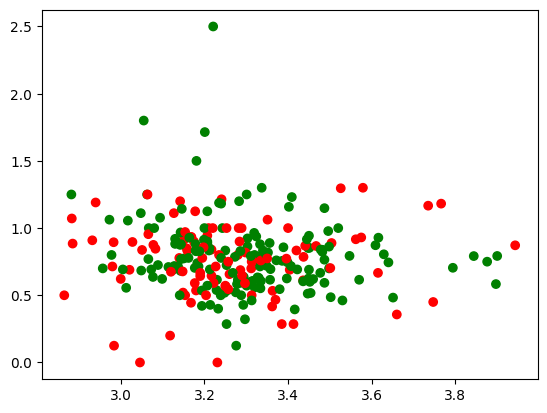

In [ ]:

# 'combo': ('D', 'H', 'A'), 'symbol': 'D',

symbol = "D"
label = "DIRX"
color_col = pl_train[label].apply(lambda x: 'g' if x == 1 else 'r')
plt.scatter(pl_train["OPX_AVG"], pl_train["HOME_POWER"], c=color_col)
plt.show()

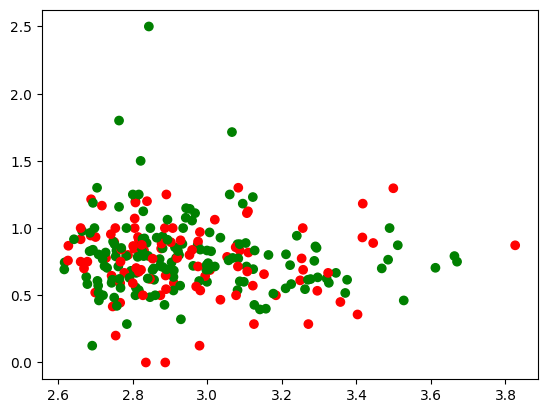

In [ ]:
plt.scatter(pl_train["OP1_AVG"], pl_train["HOME_POWER"], c=color_col)
plt.show()

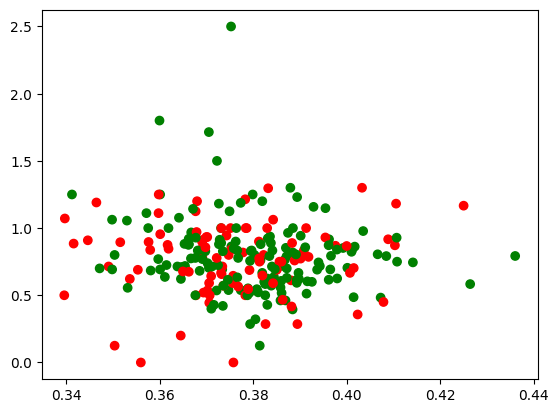

In [ ]:
plt.scatter(pl_train["OPX_RATE"], pl_train["HOME_POWER"], c=color_col)
plt.show()

# predict decrease

In [ ]:
pd.set_option("display.max_rows", 100)

In [ ]:
dataset = get_dataset_with_season()

In [ ]:
minh_dataset = get_dir_database(dataset.copy())
minh_dataset = get_weighted_OHE_dataset(minh_dataset)
minh_dataset = get_odds_percent_database(minh_dataset)
minh_dataset = get_odds_rankings(minh_dataset, True)
minh_dataset = get_stat_percent_database(minh_dataset)
minh_dataset = minh_dataset.drop(minh_dataset[minh_dataset.games < 4].index)
minh_dataset = get_power_database(minh_dataset)
# minh_dataset = minh_dataset.drop(columns=["home_team", "away_team"])
minh_dataset = minh_dataset.drop(columns=["home_wins_rate", "home_tie_rate", "home_loss_rate", "away_wins_rate", "away_tie_rate", "away_loss_rate",])
max_symbol = "H"
mid_symbol = "D"
min_symbol = "A"
minh_dataset = minh_dataset[(minh_dataset["OP_MAX_ODD"] == max_symbol) & (minh_dataset["OP_MID_ODD"] == mid_symbol) & (minh_dataset["OP_MIN_ODD"] == min_symbol)]
# minh_dataset = minh_dataset[minh_dataset["OP_MIN_ODD"] == "H"]
minh_dataset

minh_dataset["OP_MID_ODD"] = minh_dataset["OP_MID_ODD"].apply(lambda x: 0 if x == "D" else 1)
minh_dataset["OP_MAX_ODD"] = minh_dataset["OP_MAX_ODD"].apply(lambda x: 0 if x == "D" else 1)
minh_dataset_dr = minh_dataset.drop(columns = ["result", "season", "OP1_AVG", "OPX_AVG", "OP2_AVG", "CP1_AVG", "CPX_AVG", "CP2_AVG", "DIRX", "DIR2", "date", "OP_MIN_ODD"])
minh_dataset_dr
curr_label = "DIR1"

get_dir_dataset_stats(minh_dataset_dr, curr_label)

minh_test = minh_dataset_dr.loc[2700:]
minh_train = minh_dataset_dr.drop(index=minh_test.index)



# minh_train = minh_train.sample(frac=1)
# get_dir_dataset_stats(minh_train, curr_label)
# minh_train = minh_train.groupby(curr_label).sample(n=792)
# get_dir_dataset_stats(minh_train, curr_label)
# minh_val = minh_train.groupby(curr_label).sample(frac=.2)
# get_dir_dataset_stats(minh_val, curr_label)
# minh_train = minh_train.drop(index=minh_val.index)
# get_dir_dataset_stats(minh_train, curr_label)
# minh_train = minh_train.sample(frac=1)
# minh_val = minh_val.sample(frac=1)

# minh_val_target, minh_val_features = get_features_and_labels(minh_val, curr_label)
minh_train_target, minh_train_features = get_features_and_labels(minh_train, curr_label)
minh_test_target, minh_test_features = get_features_and_labels(minh_test, curr_label)

# stats_dataset.groupby(["DIR1"]).mean()

U% : 63.787%, 347/544; D% : 36.213%, 197/544


In [ ]:
minh_test

,games,DIR1,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,OP1_RATE,OPX_RATE,OP2_RATE,OP_MAX_ODD,OP_MID_ODD,HOME_POWER
2702,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.380323,0.373433,0.246244,1,0,3.000000
2703,4,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.555260,0.346135,0.098605,1,0,0.000000
2706,4,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.424161,0.364781,0.211059,1,0,0.200000
2707,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.415749,0.348460,0.235791,1,0,0.200000
2721,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.552027,0.347479,0.100494,1,0,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,34,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.392551,0.388486,0.218963,1,0,0.588235
3382,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.505016,0.380226,0.114758,1,0,0.283333
3394,35,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.446213,0.364544,0.189243,1,0,0.687500
3397,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.391489,0.377828,0.230683,1,0,0.658537


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=50,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(minh_train_features)
steps_per_epoch = len(minh_train_features)/32

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=True)

model_9 = tf.keras.Sequential([
      normalizer,
      layers.Dense(8),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2),
      layers.Dense(8),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2),
      layers.Dense(8),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2),
      # layers.Dense(8, activation="sigmoid"),
      layers.Dense(1, activation="sigmoid")
])

weights = class_weight.compute_class_weight('balanced',
                                            classes=np.unique(minh_train_target),
                                            y=minh_train_target)

model_9.compile(
    optimizer=tf.keras.optimizers.AdamW(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

array([1.294, 0.815])

In [ ]:
%%time
history = model_9.fit(
    minh_train_features,
    minh_train_target,
    epochs=500,
    callbacks=[early_stopping],
    # validation_freq=5,
    # Suppress logging.
    # Calculate validation results on 20% of the training data.

    # validation_data = (minh_val_features, minh_val_target),
    class_weight={0: weights[0] - 0.1, 1: weights[1] + 0.1},
    validation_split=0.1
    )

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4849 - loss: 0.7338 - val_accuracy: 0.7045 - val_loss: 0.6518
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4487 - loss: 0.7559 - val_accuracy: 0.7045 - val_loss: 0.6494
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5507 - loss: 0.7053 - val_accuracy: 0.7045 - val_loss: 0.6506
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4972 - loss: 0.7104 - val_accuracy: 0.6818 - val_loss: 0.6510
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5790 - loss: 0.6862 - val_accuracy: 0.7045 - val_loss: 0.6515
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5912 - loss: 0.7047 - val_accuracy: 0.6136 - val_loss: 0.6518
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5138 - loss: 0.7076 - val_accuracy: 0.6818 - val_loss: 0.6522
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5450 - loss: 0.6961 - val_accuracy: 0.6591 - 

104
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
probability: [0.655], pred: 1, real: 0.0, return: -1
probability: [0.517], pred: 1, real: 1.0, return: -1
probability: [0.544], pred: 1, real: 1.0, return: -1
probability: [0.606], pred: 1, real: 1.0, return: 2.738
probability: [0.53], pred: 1, real: 1.0, return: -1
probability: [0.521], pred: 1, real: 0.0, return: -1
probability: [0.549], pred: 1, real: 0.0, return: -1
probability: [0.51], pred: 1, real: 1.0, return: -1
probability: [0.528], pred: 1, real: 1.0, return: -1
probability: [0.526], pred: 1, real: 1.0, return: -1
probability: [0.551], pred: 1, real: 1.0, return: 2.448
probability: [0.], pred: 0, real: 0.0, return: 2.324
probability: [0.522], pred: 1, real: 1.0, return: 3.877
probability: [0.542], pred: 1, real: 1.0, return: -1
probability: [0.584], pred: 1, real: 1.0, return: 2.659
probability: [0.487], pred: 0, real: 0.0, return: 3.933
probability: [0.65], pred: 1, real: 1.0, return: -1
probability: [0.523], pred: 1, real: 0.0, ret

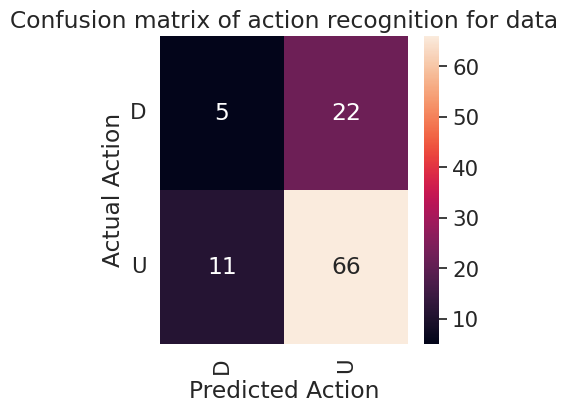

In [ ]:
odd_label = "OP1_AVG"
# features = minh_val_features
# target = minh_val_target
# features = minh_train_features
# target = minh_train_target

features = minh_test_features
target = minh_test_target
num = len(features)
features = features[:num]
target = target[:num]
dataset_temp = minh_dataset.loc[2700:]


print(len(features))
# loaded_model = tf.keras.models.load_model(f"{model_save_pwd}/HDA_H_70A_40D.keras")
# predictions = loaded_model.predict(features)
predictions = model_9.predict(features)

# target_data = np.array(target).astype('float32')
# target_data = [x[0] for x in target_data]
correct = 0
pred_up = 0
pred_up_correct = 0
pred_down = 0
pred_down_correct = 0
winnings = 0
num_invested = 0
winnings_correct = 0
num_correct_dec = 0
winnings_ideal = 0
num_ideal = 0
predicted_classes = [1 if x >= 0.5 else 0 for x in predictions]
for prediction_class, target_val, raw_pred, (ind, row) in zip(predicted_classes, target, predictions, dataset_temp.iterrows()):
  # prediction_class = np.argmax(prediction)
  # prediction_class = random.randint(0, 1)
  result = row["result"]
  ret = row[odd_label] - 1 if result == "H" else -1
  if target_val == 0:
    winnings_ideal += ret
    num_ideal += 1
    # print(f"tv: {target_val}, ret: {ret}, winnings: {ev}")
    if target_val == prediction_class:
      winnings_correct += ret
      num_correct_dec += 1

  if prediction_class == 0:
    winnings += ret
    num_invested += 1

  print(f"probability: {raw_pred}, pred: {prediction_class}, real: {target_val}, return: {ret}")
  if prediction_class == target_val:
    correct += 1

  if prediction_class == 1:
    pred_up += 1
    pred_up_correct += 1 if prediction_class == target_val else 0
  else:
    pred_down += 1
    pred_down_correct += 1 if prediction_class == target_val else 0

calculated_ideal_winnings = calculate_winnings(test_dataset_temp[test_dataset_temp["DIR1"] == 0], odd_label, "H")

get_dir_dataset_stats(minh_test, curr_label)
print(f"calculated ideal winnings: {format(calculated_ideal_winnings, '.3f')}")
print_percent_str("pred up accuracy", pred_up_correct, pred_up)
print_percent_str("pred down accuracy", pred_down_correct, pred_down)
print_percent_str("correct", correct, num)
print("")
print_percent_str("ideal ev", winnings_ideal, num_ideal)
print_percent_str("ideal ev calc", calculated_ideal_winnings, len(test_dataset_temp[test_dataset_temp["DIR1"] == 0]))
print_percent_str("ev of only correct down preds", winnings_correct, num_correct_dec)
print_percent_str("ev of only downs", winnings, num_invested)
# print(f"ev: {format(ev, '.3f')}, ev of only correct down preds: {format(ev_correct, '.3f')}")
# print(f"up: {is_up/num}, {is_up}/{num}")
# confusion_matrix = tf.math.confusion_matrix(
#     target,
#     predicted_classes,
#     num_classes=3,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )
# confusion_matrix
plot_confusion_matrix(target, predicted_classes, ["D", "U"], "data")

In [ ]:
model_name = "HDA_H_59A_27D_56EV.keras"
model_path = f"{model_save_pwd}/{model_name}"
model_9.save(f"{model_path}")
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/JSIP Final Project/models/HDA_H_59A_27D_56EV.keras


In [ ]:
num = 3
ev = calculate_winnings(test_dataset_temp[:num], odd_label, "H")
print(ev)
test_dataset_temp[:num]

-3.0


,games,date,season,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,DIR1,DIRX,DIR2,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,OP1_RATE,OPX_RATE,OP2_RATE,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,HOME_POWER
2702,4,10 Sep 2022,2022/2023,A,3.367,3.306,2.180,2.559,3.184,2.947,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.380323,0.373433,0.246244,1,0,A,3.0
2703,4,10 Sep 2022,2022/2023,A,7.923,4.939,1.407,9.390,5.291,1.337,1,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.555260,0.346135,0.098605,1,0,A,0.0
2706,4,11 Sep 2022,2022/2023,A,3.943,3.391,1.962,4.674,3.603,1.805,1,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.424161,0.364781,0.211059,1,0,A,0.2


# random forest increase/decrease

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
dataset_with_result = get_dataset_with_season()

In [ ]:
rfdc_dataset = get_stat_percent_database(dataset_with_result.copy())
# rfdc_dataset = get_diff_database(rfdc_dataset)
rfdc_dataset = get_odds_percent_database(rfdc_dataset)
rfdc_dataset = get_odds_percent_database_closing(rfdc_dataset)
# rfdc_dataset = get_dir_database(rfdc_dataset)
# rfdc_dataset["MAX_DIFF"] = get_max_diff(rfdc_dataset)
rfdc_dataset = get_odds_rankings(rfdc_dataset, True)
# rfdc_dataset = get_odds_rankings(rfdc_dataset, False)
rfdc_dataset = rfdc_dataset.drop(index=rfdc_dataset[rfdc_dataset.games < 4].index)
rfdc_dataset["OP_SUM"] = rfdc_dataset["OP1_AVG"] + rfdc_dataset["OPX_AVG"] + rfdc_dataset["OP2_AVG"]
# rfdc_dataset["CP_SUM"] = rfdc_dataset["CP1_AVG"] + rfdc_dataset["CPX_AVG"] + rfdc_dataset["CP2_AVG"]
rfdc_dataset["HOME_POWER"] = (rfdc_dataset["home_wins_rate"] * 2 + rfdc_dataset["home_tie_rate"]) / (rfdc_dataset["away_wins_rate"] * 2 + rfdc_dataset["away_tie_rate"])
rfdc_dataset["HOME_POWER"] = [10 if x > 10 else x for x in rfdc_dataset["HOME_POWER"]]
rfdc_dataset = rfdc_dataset.drop(columns=["CP1_RATE", "CPX_RATE", "CP2_RATE", "home_team", "away_team"])
rfdc_dataset

,games,date,season,result,OP1_AVG,OPX_AVG,OP2_AVG,CP1_AVG,CPX_AVG,CP2_AVG,...,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,OP_SUM,HOME_POWER
40,4,22 Sep 2015,2015/2016,A,2.528,3.115,2.900,2.539,3.125,2.978,...,0.500000,0.500000,0.295915,0.364626,0.339459,D,A,H,8.543,1.000000
41,4,22 Sep 2015,2015/2016,H,3.329,3.263,2.187,3.115,3.299,2.343,...,0.750000,0.000000,0.379200,0.371682,0.249117,H,D,A,8.779,0.800000
42,4,22 Sep 2015,2015/2016,H,1.244,5.543,13.128,1.331,4.873,11.233,...,0.000000,0.750000,0.062465,0.278333,0.659202,A,D,H,19.915,3.000000
43,4,23 Sep 2015,2015/2016,H,2.113,3.384,3.412,2.142,3.415,3.433,...,0.500000,0.250000,0.237176,0.379841,0.382983,A,D,H,8.909,0.750000
44,4,23 Sep 2015,2015/2016,D,2.382,3.094,3.138,2.367,3.020,3.368,...,0.250000,0.250000,0.276527,0.359183,0.364291,A,D,H,8.614,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,37,25 May 2024,2023/2024,D,1.314,5.714,7.809,1.219,7.152,11.637,...,0.378378,0.243243,0.088562,0.385118,0.526319,A,D,H,14.837,1.547619
3416,37,26 May 2024,2023/2024,A,3.341,3.939,1.954,4.479,4.244,1.692,...,0.189189,0.135135,0.361815,0.426576,0.211609,D,H,A,9.234,0.543860
3417,37,26 May 2024,2023/2024,A,2.250,3.304,3.124,2.330,3.162,3.284,...,0.432432,0.378378,0.259276,0.380733,0.359991,D,A,H,8.678,1.100000
3418,37,26 May 2024,2023/2024,D,2.313,3.401,2.947,2.342,3.450,3.020,...,0.243243,0.432432,0.267059,0.392680,0.340261,D,A,H,8.661,0.878788


In [ ]:

# 'combo': ('D', 'H', 'A'), 'symbol': 'D',
max_symbol = "D"
mid_symbol = "H"
min_symbol = "A"
symbol = "D"
label = "CPX_AVG"
combo_ds = rfdc_dataset[(rfdc_dataset["OP_MAX_ODD"] == max_symbol) & (rfdc_dataset["OP_MID_ODD"] == mid_symbol) & (rfdc_dataset["OP_MIN_ODD"] == min_symbol)]
combo_ds = combo_ds.drop(columns=["CP1_AVG", "CP2_AVG", "date"])
combo_test = combo_ds[(combo_ds["season"] == "2023/2024") | (combo_ds["season"] == "2022/2023")]
combo_test = combo_test.drop(columns=["result", "season"])
# combo_test = combo_test.drop(index=combo_test[(combo_test["home_team"] == "Almeria") | (combo_test["away_team"] == "Almeria")].index)
combo_train = combo_ds.drop(index=combo_test.index)
combo_train = combo_train.drop(columns=["result", "season"])
combo_train

,games,OP1_AVG,OPX_AVG,OP2_AVG,CPX_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,OP_MAX_ODD,OP_MID_ODD,OP_MIN_ODD,OP_SUM,HOME_POWER
53,5,3.109,3.178,2.357,3.081,0.800000,0.200000,0.000000,0.800000,0.000000,0.200000,0.359671,0.367654,0.272675,D,H,A,8.644,1.125000
66,6,2.787,3.280,2.515,3.257,0.666667,0.000000,0.333333,0.666667,0.333333,0.000000,0.324749,0.382195,0.293055,D,H,A,8.582,0.800000
78,7,2.763,3.055,2.670,3.107,0.428571,0.428571,0.142857,0.285714,0.142857,0.571429,0.325518,0.359920,0.314562,D,H,A,8.488,1.800000
92,9,2.816,3.229,2.513,3.285,0.222222,0.333333,0.444444,0.555556,0.333333,0.111111,0.329049,0.377308,0.293643,D,H,A,8.558,0.538462
99,9,2.828,3.207,2.519,3.303,0.333333,0.333333,0.333333,0.333333,0.222222,0.444444,0.330606,0.374912,0.294482,D,H,A,8.554,1.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,33,2.816,3.120,2.584,3.095,0.242424,0.333333,0.424242,0.515152,0.181818,0.303030,0.330516,0.366197,0.303286,D,H,A,8.520,0.675000
2620,34,3.177,3.447,2.183,3.482,0.147059,0.323529,0.529412,0.441176,0.323529,0.235294,0.360736,0.391393,0.247871,D,H,A,8.807,0.512195
2622,34,3.511,3.609,1.991,3.683,0.500000,0.205882,0.294118,0.558824,0.264706,0.176471,0.385358,0.396115,0.218527,D,H,A,9.111,0.872340
2630,35,2.921,3.286,2.453,3.361,0.285714,0.400000,0.314286,0.485714,0.200000,0.314286,0.337298,0.379446,0.283256,D,H,A,8.660,0.829268


In [ ]:
train_1 = combo_train.sample(frac=.8)
train_2 = combo_train.drop(index=train_1.index)

In [ ]:
tf_train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_1, label=label, task=tfdf.keras.Task.REGRESSION)
tf_train_data
tf_test_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_2, label=label, task=tfdf.keras.Task.REGRESSION)
tf_test_data

<_PrefetchDataset element_spec=({'games': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'OP1_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OPX_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP2_AVG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'home_wins_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'home_tie_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'home_loss_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'away_wins_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'away_tie_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'away_loss_rate': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP1_RATE': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OPX_RATE': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP2_RATE': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'OP_MAX_ODD': TensorSpec(shape=(None,), dtype=tf.string, 

In [ ]:
# tuner = tfdf.tuner.RandomSearch(num_trials=2)

model_10 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    task=tfdf.keras.Task.REGRESSION,
    )
model_10.compile(metrics=["mse"])

Use /tmp/tmpk6s4xoyc as temporary training directory


In [ ]:
model_10.fit(tf_train_data)

Reading training dataset...
Training dataset read in 0:00:01.346309. Found 203 examples.
Training model...
Model trained in 0:00:01.677945
Compiling model...
Model compiled.


In [ ]:
model_10.summary()

Model: "gradient_boosted_trees_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (18):
	HOME_POWER
	OP1_AVG
	OP1_RATE
	OP2_AVG
	OP2_RATE
	OPX_AVG
	OPX_RATE
	OP_MAX_ODD
	OP_MID_ODD
	OP_MIN_ODD
	OP_SUM
	away_loss_rate
	away_tie_rate
	away_wins_rate
	games
	home_loss_rate
	home_tie_rate
	home_wins_rate

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.        "OPX_AVG"  0.412890 ################
    2.       "OP1_RATE"  0.248664 ######
    3.       "OP2_RATE"  0.219206 ####
    4. "away_loss_rate"  0.204078 ###
    5.        "OP1_AVG"  0.191518 ##
    6.     "HOME_POWER"  0.179194 #
    7.        "OP2_AVG"  0.166327 #
    8.         "OP_SUM"  0.157566

In [ ]:
evaluation = model_10.evaluate(tf_test_data, verbose=1, return_dict=True)
evaluation

1/1 [==============================] - 0s 336ms/step - loss: 0.0000e+00 - mse: 0.0300


{'loss': 0.0, 'mse': 0.02998298779129982}

In [ ]:
predictions = model_10.predict(tf_test_data).flatten()
num_correct = 0
test_data = train_2
total = len(predictions)
for pred, true, op in zip(predictions, test_data[label], test_data["OPX_AVG"]):
  # pred = 1 if pred > .5 else 0
  if pred > op and true > op:
    num_correct += 1
  elif pred < op and true < op:
    num_correct += 1
  print(f"pred: {pred > op}, true: {true > op}")
  print(f"pred: {pred}, true: {true}, op {op}")


print_percent_str("num correct", num_correct, total)


1/1 [==============================] - 0s 89ms/step
pred: False, true: True
pred: 3.471444606781006, true: 3.558, op 3.487
pred: True, true: False
pred: 3.3004074096679688, true: 3.085, op 3.151
pred: True, true: True
pred: 3.2258026599884033, true: 3.208, op 3.124
pred: True, true: True
pred: 3.406662940979004, true: 3.385, op 3.303
pred: True, true: True
pred: 3.208134651184082, true: 3.282, op 3.143
pred: True, true: True
pred: 3.240617275238037, true: 3.313, op 3.177
pred: True, true: True
pred: 3.246584177017212, true: 3.175, op 3.128
pred: False, true: True
pred: 3.403801918029785, true: 3.549, op 3.487
pred: True, true: True
pred: 3.271205186843872, true: 3.26, op 3.221
pred: True, true: False
pred: 3.438768148422241, true: 3.297, op 3.317
pred: True, true: False
pred: 3.2802846431732178, true: 3.179, op 3.26
pred: True, true: True
pred: 3.410590410232544, true: 3.443, op 3.397
pred: True, true: True
pred: 3.713073492050171, true: 3.549, op 3.407
pred: True, true: True
pred: 3.4

# bet or no bet

In [ ]:
dataset_with_result = get_dataset_with_season()

In [401]:
bnb_dataset = get_stat_percent_database(dataset_with_result.copy())
# bnb_dataset = get_diff_database(bnb_dataset)
bnb_dataset = get_odds_percent_database(bnb_dataset)
# bnb_dataset = get_odds_percent_database_closing(bnb_dataset)
# bnb_dataset = get_dir_database(bnb_dataset)
bnb_dataset = get_weighted_OHE_dataset(bnb_dataset)
bnb_dataset = get_power_database(bnb_dataset)
# bnb_dataset["MAX_DIFF"] = get_max_diff(bnb_dataset)
bnb_dataset = get_odds_rankings(bnb_dataset, True)
# bnb_dataset = get_odds_rankings(bnb_dataset, False)
bnb_dataset = bnb_dataset.drop(index=bnb_dataset[bnb_dataset.games < 4].index)
bnb_dataset["OP_SUM"] = bnb_dataset["OP1_AVG"] + bnb_dataset["OPX_AVG"] + bnb_dataset["OP2_AVG"]
# bnb_dataset["CP_SUM"] = bnb_dataset["CP1_AVG"] + bnb_dataset["CPX_AVG"] + bnb_dataset["CP2_AVG"]
max_symbol = "D"
mid_symbol = "A"
min_symbol = "H"
bnb_dataset = bnb_dataset[(bnb_dataset["OP_MAX_ODD"] == max_symbol) & (bnb_dataset["OP_MID_ODD"] == mid_symbol) & (bnb_dataset["OP_MIN_ODD"] == min_symbol)]
# bnb_dataset["OP_MIN_ODD_NUM"] = bnb_dataset["OP_MIN_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
# bnb_dataset["OP_MID_ODD_NUM"] = bnb_dataset["OP_MID_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
# bnb_dataset["OP_MAX_ODD_NUM"] = bnb_dataset["OP_MAX_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
symbol = "D"
bnb_dataset[f"result_{symbol}"] = bnb_dataset["result"].apply(lambda x: 1 if x == symbol else 0)
bnb_dataset = bnb_dataset.drop(columns=["OP_MAX_ODD", "OP_MID_ODD", "OP_MIN_ODD", "CP1_AVG", "CPX_AVG", "CP2_AVG", "result", "date"])
bnb_dataset

curr_label = f"result_{symbol}"
bnb_dataset

,games,season,OP1_AVG,OPX_AVG,OP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,HOME_POWER,OP_SUM,result_D
40,4,2015/2016,2.528,3.115,2.900,0.250000,0.000000,0.750000,0.000000,0.500000,0.500000,0.295915,0.364626,0.339459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,8.543,0
47,4,2015/2016,2.568,3.177,2.784,0.000000,0.500000,0.500000,0.750000,0.250000,0.000000,0.301090,0.372494,0.326416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0.285714,8.529,0
56,5,2015/2016,2.433,3.224,2.926,0.200000,0.400000,0.400000,0.200000,0.000000,0.800000,0.283467,0.375626,0.340906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2.000000,8.583,1
58,5,2015/2016,2.296,3.224,3.178,0.200000,0.400000,0.400000,0.200000,0.400000,0.400000,0.263969,0.370660,0.365371,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,8.698,0
67,6,2015/2016,2.431,3.252,2.944,0.166667,0.166667,0.666667,0.333333,0.500000,0.166667,0.281790,0.376956,0.341254,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.428571,8.627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,36,2023/2024,2.633,3.064,2.818,0.388889,0.388889,0.222222,0.416667,0.333333,0.250000,0.309219,0.359836,0.330945,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,8.515,0
3412,37,2023/2024,2.286,3.489,2.950,0.432432,0.324324,0.243243,0.621622,0.108108,0.270270,0.262006,0.399885,0.338109,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.880000,8.725,0
3414,37,2023/2024,2.243,3.555,3.029,0.054054,0.324324,0.621622,0.162162,0.405405,0.432432,0.254107,0.402742,0.343152,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.592593,8.827,0
3417,37,2023/2024,2.250,3.304,3.124,0.270270,0.351351,0.378378,0.189189,0.432432,0.378378,0.259276,0.380733,0.359991,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.100000,8.678,0


In [408]:

# 'combo': ('D', 'H', 'A'), 'symbol': 'D',

# if symbol == "H":
#   odds_label = "OP1_AVG"
# elif symbol == "D":
#   odds_label = "OPX_AVG"
# else:
#   odds_label = "OP2_AVG"
bnb_test = bnb_dataset[(bnb_dataset["season"] == "2023/2024") | (bnb_dataset["season"] == "2022/2023")]
bnb_test = bnb_test.drop(columns=["season"])
bnb_train = bnb_dataset.drop(index=bnb_test.index)
bnb_train = bnb_train.drop(columns=["season"])
bnb_test

,games,OP1_AVG,OPX_AVG,OP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,HOME_POWER,OP_SUM,result_D
2708,4,2.596,3.456,2.603,0.750000,0.000000,0.250000,0.750000,0.250000,0.000000,0.299942,0.399307,0.300751,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.857143,8.655,0
2709,4,2.562,3.199,2.805,0.250000,0.250000,0.500000,0.750000,0.000000,0.250000,0.299089,0.373453,0.327457,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.500000,8.566,0
2712,5,2.393,3.165,3.043,0.400000,0.000000,0.600000,0.400000,0.200000,0.400000,0.278223,0.367980,0.353796,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.800000,8.601,0
2725,6,2.499,3.273,2.802,0.166667,0.166667,0.666667,0.500000,0.000000,0.500000,0.291463,0.381735,0.326802,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.500000,8.574,1
2726,6,2.330,3.387,2.971,0.333333,0.166667,0.500000,0.833333,0.000000,0.166667,0.268186,0.389848,0.341966,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,8.688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,36,2.633,3.064,2.818,0.388889,0.388889,0.222222,0.416667,0.333333,0.250000,0.309219,0.359836,0.330945,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,8.515,0
3412,37,2.286,3.489,2.950,0.432432,0.324324,0.243243,0.621622,0.108108,0.270270,0.262006,0.399885,0.338109,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.880000,8.725,0
3414,37,2.243,3.555,3.029,0.054054,0.324324,0.621622,0.162162,0.405405,0.432432,0.254107,0.402742,0.343152,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.592593,8.827,0
3417,37,2.250,3.304,3.124,0.270270,0.351351,0.378378,0.189189,0.432432,0.378378,0.259276,0.380733,0.359991,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.100000,8.678,0


In [409]:
bnb_train_features = bnb_train.drop(columns=curr_label)
# bnb_train_features = np.array(bnb_train_features).astype('float32')
bnb_train_target = [[1-x, x, y] for x, y in zip(bnb_train[curr_label], bnb_train[odds_label])]
# bnb_train_target = [[1, x] if x > 0 else [0, x] for x in bnb_train_target]
# bnb_train_target = np.array(bnb_train_target).astype('float32')


bnb_test_features = bnb_test.drop(columns=curr_label)
# bnb_test_features = np.array(bnb_test_features).astype('float32')
# bnb_test_target = bnb_test[label]
bnb_test_target = [[1-x, x, y] for x, y in zip(bnb_test[curr_label], bnb_test[odds_label])]
# bnb_test_target = [[1, x] if x > 0 else [0, x] for x in bnb_test_target]
# bnb_test_target = np.array(bnb_test_target).astype('float32')

NameError: name 'odds_label' is not defined

In [ ]:
bnb_train_features.shape

(2380, 15)

In [ ]:
def normalize(tensor):
  return tf.math.divide(tensor,  tf.math.abs(tensor))

def penalized_loss(y_true, y_pred):
    # y_true_positive = tf.math.greater_equal(y_true, 0)
    true_class = y_true[:, 0]
    odds = y_true[:, 1]

    # # weights = tf.math.multiply(losses, values)

    # predicted_class = tf.math.divide(normalize(y_pred - 0.5) + 1.0, 2.0)
    # diff = tf.math.abs(tf.math.subtract(predicted_class, y_pred))



    # weights = tf.math.divide(tf.math.abs(odds), diff) * signs
    # return tf.math.reduce_sum(weights)

    losses = tf.keras.ops.binary_crossentropy(true_class, y_pred[:, 0])
    weighted_loss = tf.math.abs(odds) * losses
    # return tf.math.reduce_sum(weighted_loss)
    # bet (1), dont bet (0)
    predicted_class_tanh = normalize(y_pred - 0.5) * -1 # b: -1, nb: 1
    # predicted_class_sig = (predicted_class_tanh + 1.0) / 2 # b: 0, nb: 1
    # predicted_class_scaled = ((predicted_class_sig / 2.0) - 1.0) * predicted_class_tanh  # 1, -0.5
    # weight = odds * (predicted_class_scaled * -1)
    # loss = tf.reduce_sum(weight)

    pred_sum = tf.math.abs(tf.math.reduce_sum(predicted_class_tanh))
    length = tf.cast(tf.size(predicted_class_tanh), dtype=tf.float32)
    penalty = predicted_class_tanh * weighted_loss + (pred_sum / length)

    return penalty

    # signs = normalize(tf.math.subtract(true_class, y_pred)) * normalize(tf.math.subtract(0.5, y_pred))


    # true positive, confidence increases -> loss decreases
    # pred_rounded = .6 - .5 / |.6 - .5| = (1 + 1) / 2 = 1

    # sign = (true - odd) * (0.5 - odd) = -1 if same, 1 if true

    # true: 1, pred: 0.6, odd: 6, return 6 / .4 = 15 * -1 = -15
    # true: 1, pred: 0.8, odd: 6, return 6 / .2 = 30 * -1 = -30
    # diff: | pred_rounded - .6 | = .4
    # diff: | pred_rounded - .8 | = .2
    # correct = pred_rounded

    # correct = true - pred = 1 - 0.6 = +
    # off = .4 * 6 = 2.4
    # off = .2 * 6 = 1.2

    # 6 / .4 = 15 / 6 = 2.5
    # 6 / .2 = 30 / 6 = 5

    # true * odd = 1 * 6 = 6


    # true negative, confidence increases -> loss decreases
    # pred_rounded = .4 - .5 / |.4 - .5| = (-1 + 1) / 2 = 0
    # true: 0, pred: 0.4 odd: -1 return |-1| / .4 = 2.5 * -1 = -2.5
    # true: 0, pred: 0.2 odd: -1 return |-1| / .2 = 5 * -1 = -5
    # diff: | pred_rounded - .4 | = .4
    # diff: | pred_rounded - .2 | = .2

    # true = (0 - 0.4) * -1 = +
    # off = .4 * 1 = .4
    # off = .2 * 1 - .2
    # .4 * -1 = -0.4 / -1 = .4
    # .2 * -1 = -0.2 / -1 = .2

    # false positive, confidence increases -> loss increases
    # pred_rounded = .8 - .5 / |.8 - .5| = (1 + 1) / 2 = 1
    # true: 0, pred: .8, odd: -1, return |-1| / .2 = 5
    # true: 0, pred: .6, odd: -1, return |-1| / .4 = 2.5
    # diff: | pred_rounded - .8 | = .2
    # diff: | pred_rounded - .6 | = .4

    # off = .8 * 1 = .8
    # off = .6 * 1 =
    # true * odd = 0 * -1 = 0


    # false negative, confidence increases -> loss increases
    # pred_rounded = .2 - .5 / |.2 - .5| = (-1 + 1) / 2 = 0
    # true: 1, pred: .2, odd: 6, return 6 / .2 = 30
    # true: 1, pred: .4, odd: 6, return 6 / .4 = 15
    # diff: | pred_rounded - .2 | = .2
    # diff: | pred_rounded - .2 | = .4

    # off = .8
    # off = .6

    # true -> positive
    # false -> negative
    # correctness increases -> loss decreases
    #


    # y_pred_normalized = tf.math.divide(y_pred, tf.math.abs(y_pred))
    # y_pred_normalized = tf.math.add(y_pred_normalized, 1)
    # # y_pred_normalized = tf.math.divide(y_pred_normalized, 2)
    # y_pred_normalized = tf.math.multiply(y_pred_normalized, y_true)
    # y_pred_normalized = tf.math.multiply(y_pred_normalized, -1)
    # # y_pred_normalized = tf.math.add(y_pred_normalized, 5)
    # # y_values = tf.where(y_pred_positive, y_true, 0)
    # # y_pred_addition = tf.math.add(mask, y_pred)
    # value = tf.math.reduce_sum(y_pred_normalized)
    # # return tf.where(tf.math.equal(value, 0), -10.0, value)
    # return value
    # return tf.convert_to_tensor(-10) if tf.math.equal(value, 0) else value

In [ ]:
def odds_loss(y_true, y_pred):
    """
    The function implements the custom loss function mentioned in info.pdf

    Inputs
    true : a vector of dimension batch_size, 7. A label encoded version of the output and the backp1_a and backp1_b
    pred : a vector of probabilities of dimension batch_size , 5.

    Returns
    the loss value
    """
    no_bet = y_true[:, 0:1]
    win_home_team = y_true[:, 1:2]
    odds_a = y_true[:, 2:3]
    gain_loss_vector = tf.concat([tf.zeros_like(odds_a),
                                  win_home_team * (odds_a - 1) + (1 - win_home_team) * -1], axis=1)
    return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))
    # return gain_loss_vector



# true = np.array([[1, 0, 2.0], [0, 1, 3]]).astype('float32')
# pred = np.array([[0.6, 0.1], [0.2, 0.6]]).astype('float32')

odds_loss(true, pred).numpy()

-0.0

In [ ]:
def weighted_loss(y_true, y_pred):
    no_bet = y_true[:, 0:1]
    should_bet = y_true[:, 1:2]
    odds = y_true[:, 2:3]

    odds_ev = should_bet * (odds - 1) + (1 - should_bet) * -1
    scale_vector = tf.concat([tf.zeros_like(odds_ev), odds_ev], axis=1)
    # tf.zeros_like(odds_ev)
    # -(should_bet * (odds - 1))/10.0
    # return scale_vector
    return -1 * tf.reduce_mean(tf.reduce_sum(scale_vector * y_pred, axis=1))
    # return -1 * tf.reduce_mean(scale_vector * y_pred)
    # return tf.reduce_sum(scale_vector)
    # win_home_team * (odds_a - 1) + (1 - win_home_team) * -1,

In [ ]:
bnb = np.array(bnb_train_target)[0:4, :]
bnb

array([[0.   , 2.528],
       [1.   , 3.329],
       [1.   , 1.244],
       [1.   , 2.113]])

In [ ]:
bnb = np.array(bnb_train_target)[0:4, :]
evs = [true * (odd - 1) + (1 - true) * -1 for true, odd in zip(bnb[:, 0], bnb[:, 1])]
print(evs)
# sum(evs)
# np.sum(evs)

[-1.0, 2.329, 0.244, 1.113]


In [ ]:
bnb = np.array(bnb_train_target)[0:4, :]
print(bnb)
pred = np.array([[1, 0], [1, 0], [1, 0], [1, 0]]).astype("float32")
print(pred)
true = np.array(bnb).astype('float32')
weighted_loss(true, pred)
# correct = penalized_loss(bnb_train_target, bnb_train_target[:, 0])
# print(f"loss: {loss}")
# -1,

[[0.    1.    3.329]
 [0.    1.    6.366]
 [1.    0.    5.768]
 [0.    1.    3.476]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


<tf.Tensor: shape=(), dtype=float32, numpy=-0.0>

In [ ]:
bnb_train_target

In [ ]:

correct = penalized_loss(bnb_train_target, bnb_train_target[:, 0])

fake_predictions = np.full(bnb_train_target[:, 0].shape, 0.3).astype("float32")
print(fake_predictions.dtype)
nothing = penalized_loss(bnb_train_target, fake_predictions)

fake_predictions = np.full(bnb_train_target[:, 0].shape, 0.7).astype("float32")
all = penalized_loss(bnb_train_target, fake_predictions)
print(f"correct_only: {correct}, none: {nothing}, all: {all}")

array([[1.   , 2.829]], dtype=float32)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=50,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(bnb_train_features))
steps_per_epoch = len(bnb_train_features)/32

bnb_weights = class_weight.compute_class_weight('balanced',
                                                classes=np.unique(np.array(bnb_train_target)[:, 1]),
                                                y=np.array(bnb_train_target)[:, 1])

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.5,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)


# tf.keras.layers.LeakyReLU()
model_11 = tf.keras.Sequential([
      normalizer,
      layers.Dense(15),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2),
      layers.Dense(15),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2),
      # layers.Dense(15),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.2),
      # layers.Dense(15),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.3),
      layers.Dense(2, activation="sigmoid")
])

model_11.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate = 0.09),
    loss=weighted_loss)

bnb_weights

array([0.734, 1.568])

In [ ]:
bnb_weights

array([1.282, 0.82 ])

In [ ]:
model_11.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 15)                  │             690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 2)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,888 (11.29 KB)

 Trainable params: 962 (3.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,926 (7.53 KB)

In [ ]:
predictions = model_11.predict(bnb_train_features)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
(predictions[:, 0]).shape

(2380,)

In [ ]:
# logdir=f"{pwd_parent}/logs/{datetime.now().strftime('%Y%m%d-%H%M%S')}"
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model_11.fit(
    np.array(bnb_train_features),
    np.array(bnb_train_target),
    epochs=400,
    callbacks=[early_stopping],
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    # class_weight={0: bnb_weights[0] + 10, 1: bnb_weights[1]},
    # sample_weight=bnb_weights,
    validation_split=0.2

    # validation_data=(om_train_features[40:50], om_train_target[40:50])
    )

Epoch 1/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: -0.3311 - val_loss: -0.0643
Epoch 2/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: -0.3073 - val_loss: -0.0647
Epoch 3/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.3785 - val_loss: -0.0623
Epoch 4/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: -0.2709 - val_loss: -0.0660
Epoch 5/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.3609 - val_loss: -0.0585
Epoch 6/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.2333 - val_loss: -0.0586
Epoch 7/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: -0.3247 - val_loss: -0.0590
Epoch 8/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.2542 - val_loss: -0.0588
Epoch 9/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.2572 - val_loss: -0.0631
Epoch 10/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: -0.3119 - val_loss: -0.0615
Epoch 11/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.2392 - val_loss: -0.0615
Epoch 12/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0

In [ ]:
logs = f"{pwd_parent}/logs"

In [ ]:
%tensorboard --logdir "/content/drive/MyDrive/JSIP Final Project/logs"

In [ ]:
bnb_test_features

,games,OP1_AVG,OPX_AVG,OP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,HOME_POWER,OP_SUM
2702,4,3.367,3.306,2.180,0.250000,0.250000,0.500000,0.000000,0.250000,0.750000,0.380323,0.373433,0.246244,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.000000,8.853
2703,4,7.923,4.939,1.407,0.000000,0.000000,1.000000,0.750000,0.250000,0.000000,0.555260,0.346135,0.098605,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,14.269
2706,4,3.943,3.391,1.962,0.000000,0.250000,0.750000,0.500000,0.250000,0.250000,0.424161,0.364781,0.211059,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.200000,9.296
2707,4,3.738,3.133,2.120,0.000000,0.250000,0.750000,0.500000,0.250000,0.250000,0.415749,0.348460,0.235791,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.200000,8.991
2721,6,7.597,4.782,1.383,0.333333,0.333333,0.333333,0.833333,0.166667,0.000000,0.552027,0.347479,0.100494,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.545455,13.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,34,3.573,3.536,1.993,0.323529,0.235294,0.441176,0.676471,0.147059,0.176471,0.392551,0.388486,0.218963,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.588235,9.102
3382,34,6.293,4.738,1.430,0.117647,0.264706,0.617647,0.794118,0.176471,0.029412,0.505016,0.380226,0.114758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.283333,12.461
3394,35,4.289,3.504,1.819,0.285714,0.371429,0.342857,0.628571,0.114286,0.257143,0.446213,0.364544,0.189243,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.687500,9.612
3397,35,3.496,3.374,2.060,0.285714,0.200000,0.514286,0.400000,0.371429,0.228571,0.391489,0.377828,0.230683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.658537,8.930


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0.362 1.   ]
 [0.345 0.738]
 [0.214 1.   ]
 [0.91  0.   ]
 [0.938 0.   ]
 [0.49  0.998]
 [0.976 0.   ]
 [0.964 0.   ]
 [0.481 0.995]
 [0.651 0.999]
 [0.95  0.   ]
 [0.441 0.736]
 [0.662 0.349]
 [0.429 0.994]
 [0.093 1.   ]
 [0.357 0.931]
 [1.    0.   ]
 [0.732 0.   ]
 [0.673 0.999]
 [0.722 0.   ]
 [0.703 0.   ]
 [0.797 0.   ]
 [0.584 0.012]
 [0.837 0.   ]
 [0.324 0.938]
 [1.    0.   ]
 [0.351 0.969]
 [0.566 0.   ]
 [0.659 0.001]
 [0.623 0.51 ]
 [0.765 0.   ]
 [1.    0.   ]
 [0.64  0.   ]
 [0.512 0.898]
 [0.894 0.   ]
 [0.383 0.98 ]
 [0.812 0.   ]
 [0.548 0.   ]
 [0.43  0.996]
 [0.547 0.016]
 [0.374 0.995]
 [0.962 0.   ]
 [0.389 0.998]
 [0.571 0.   ]
 [1.    0.   ]
 [0.853 0.   ]
 [0.334 0.96 ]
 [0.135 1.   ]
 [0.745 0.016]
 [1.    0.   ]
 [0.385 1.   ]
 [0.391 0.919]
 [0.658 0.876]
 [0.946 0.   ]
 [0.689 0.729]
 [0.968 0.   ]
 [0.844 0.052]
 [0.495 0.891]
 [0.804 0.006]
 [0.96  0.   ]
 [0.51  0.612]
 [0.939 0.   ]
 [0.795 0.021]
 [0.634 0.415]
 [

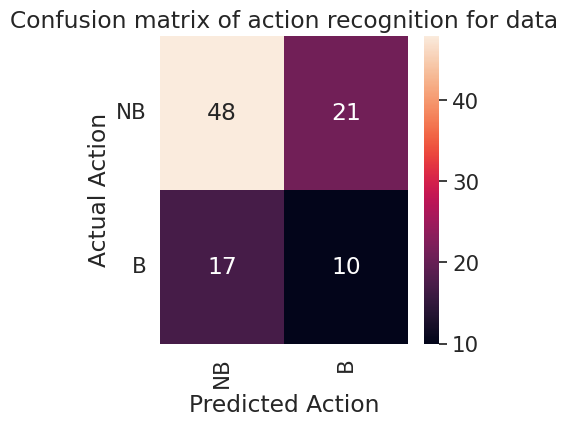

In [ ]:

# max_symbol = 1
# mid_symbol = 3
# min_symbol = 0
# bnb_test_hda = bnb_test[(bnb_test["OP_MAX_ODD"] == max_symbol) & (bnb_test["OP_MID_ODD"] == mid_symbol) & (bnb_test["OP_MIN_ODD"] == min_symbol)]
# target = bnb_test_hda[comp_label]
target = bnb_test_target
features = bnb_test_features
# target = bnb_train_target
# features = bnb_train_features
num = len(target)
target = target[:num]
# features = bnb_test_hda.drop(columns=[comp_label])
features = features[:num]
# comp_data = bnb_train[comp_label][:num]

predictions = model_11.predict(features)

# predictions = predictions.flatten()
print(predictions)
prob_no_bet = predictions[:, 0]
prob_bet = predictions[:, 1]
sum = 0
correct_choice = 0
is_positive = 0

pred_bet_correct = 0
pred_bet_num = 0
pred_nb_correct = 0
pred_nb_num = 0
predicted_classes = np.argmax(predictions, axis=1)
# predicted_classes = [1 if nb < .4 else 0 for nb, b in predictions]
# nb < .4 is generally good?
# print(predicted_classes)
true_classes = np.array(target)[:, 1]
# print(true_classes.dtype)
# print(target.dtype)
for nb, b, predicted_class, true_class, odds in zip(prob_no_bet, prob_bet, predicted_classes, true_classes, features[odds_label]):
  added = 0
  if true_class == 1:
    is_positive += 1

  if predicted_class == 1:
    pred_bet_num += 1
    added = -1
    if predicted_class == true_class:
      pred_bet_correct += 1
      added = odds -1
      correct_choice += 1
  else:
    pred_nb_num += 1
    if predicted_class == true_class:
      pred_nb_correct += 1
      correct_choice += 1

  sum += added
  print(f"nb: {format(nb, '.3f')}, b: {format(b, '.3f')} pred_class: {predicted_class}, true: {true_class}, added {format(added, '.3f')}")

get_dir_dataset_stats(bnb_test, curr_label)
loss = weighted_loss(np.array(target), predictions)
print(f"loss: {format(loss, '.4f')}")
print_percent_str(f"{symbol} correct of total", is_positive, num)
print_percent_str("bet", pred_bet_num, num)
print_percent_str("correct choice of total", correct_choice, num)

print_percent_str("pred no bet accuracy", pred_nb_correct, pred_nb_num)
print_percent_str("pred bet accuracy", pred_bet_correct, pred_bet_num)

print_percent_str("ev", sum, pred_bet_num)
# compare_predictions_single(predictions, comp_data, target)
# get_mse(predictions, comp_data, target, om_test.iloc[:num])


plot_confusion_matrix(true_classes, predicted_classes, ["NB", "B"], "data")

In [ ]:
model_name = "BNB_DHAD_60C_32B_10EV.keras"
model_path = f"{model_save_pwd}/{model_name}"
model_11.save(f"{model_path}")
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/JSIP Final Project/models/BNB_DHAD_60C_32B_10EV.keras


# bet or no bet decision


In [ ]:
dataset_with_result = get_dataset_with_season()

In [411]:
bnbd_dataset = get_stat_percent_database(dataset_with_result.copy())
# bnbd_dataset = get_diff_database(bnbd_dataset)
bnbd_dataset = get_odds_percent_database(bnbd_dataset)
# bnbd_dataset = get_odds_percent_database_closing(bnbd_dataset)
# bnbd_dataset = get_dir_database(bnbd_dataset)
bnbd_dataset = get_weighted_OHE_dataset(bnbd_dataset)
bnbd_dataset = get_power_database(bnbd_dataset)
# bnbd_dataset["MAX_DIFF"] = get_max_diff(bnbd_dataset)
bnbd_dataset = get_odds_rankings(bnbd_dataset, True)
# bnbd_dataset = get_odds_rankings(bnbd_dataset, False)
bnbd_dataset = bnbd_dataset.drop(index=bnbd_dataset[bnbd_dataset.games < 4].index)
bnbd_dataset["OP_SUM"] = bnbd_dataset["OP1_AVG"] + bnbd_dataset["OPX_AVG"] + bnbd_dataset["OP2_AVG"]
# bnbd_dataset["CP_SUM"] = bnbd_dataset["CP1_AVG"] + bnbd_dataset["CPX_AVG"] + bnbd_dataset["CP2_AVG"]
max_symbol = "A"
mid_symbol = "D"
min_symbol = "H"
bnbd_dataset = bnbd_dataset[(bnbd_dataset["OP_MAX_ODD"] == max_symbol) & (bnbd_dataset["OP_MID_ODD"] == mid_symbol) & (bnbd_dataset["OP_MIN_ODD"] == min_symbol)]
# bnbd_dataset["OP_MIN_ODD_NUM"] = bnbd_dataset["OP_MIN_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
# bnbd_dataset["OP_MID_ODD_NUM"] = bnbd_dataset["OP_MID_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
# bnbd_dataset["OP_MAX_ODD_NUM"] = bnbd_dataset["OP_MAX_ODD"].apply(lambda x: -10 if x == "H" else 0 if x == "D" else 10)
bnbd_dataset
for symbol in ["H", "D", "A"]:
  bnbd_dataset[f"result_{symbol}"] = bnbd_dataset["result"].apply(lambda x: 1 if x == symbol else 0)
  # bnbd_dataset
bnbd_dataset = bnbd_dataset.drop(columns=["OP_MAX_ODD", "OP_MID_ODD", "OP_MIN_ODD", "CP1_AVG", "CPX_AVG", "CP2_AVG", "result", "date"])
labels = ["result_H", "result_D", "result_A"]
# curr_label = f"result_{symbol}"
bnbd_dataset

,games,season,OP1_AVG,OPX_AVG,OP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,HOME_POWER,OP_SUM,result_H,result_D,result_A
42,4,2015/2016,1.244,5.543,13.128,0.750000,0.000000,0.250000,0.250000,0.000000,0.750000,0.062465,0.278333,0.659202,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,19.915,1,0,0
43,4,2015/2016,2.113,3.384,3.412,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.237176,0.379841,0.382983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.750000,8.909,1,0,0
44,4,2015/2016,2.382,3.094,3.138,0.000000,0.500000,0.500000,0.500000,0.250000,0.250000,0.276527,0.359183,0.364291,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.400000,8.614,0,1,0
49,4,2015/2016,2.133,3.250,3.476,0.250000,0.500000,0.250000,0.250000,0.500000,0.250000,0.240772,0.366859,0.392369,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,8.859,0,0,1
50,5,2015/2016,1.454,4.365,7.080,0.200000,0.600000,0.200000,0.200000,0.000000,0.800000,0.112722,0.338398,0.548880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2.500000,12.899,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,36,2023/2024,1.641,3.705,5.390,0.194444,0.416667,0.388889,0.055556,0.305556,0.638889,0.152850,0.345101,0.502049,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1.933333,10.736,0,1,0
3409,36,2023/2024,1.910,3.316,4.213,0.166667,0.388889,0.444444,0.277778,0.222222,0.500000,0.202352,0.351308,0.446340,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.928571,9.439,0,1,0
3410,37,2023/2024,1.241,6.417,9.689,0.648649,0.162162,0.189189,0.108108,0.243243,0.648649,0.071540,0.369920,0.558540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.176471,17.347,1,0,0
3415,37,2023/2024,1.314,5.714,7.809,0.783784,0.189189,0.027027,0.378378,0.378378,0.243243,0.088562,0.385118,0.526319,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1.547619,14.837,0,1,0


In [412]:

# 'combo': ('D', 'H', 'A'), 'symbol': 'D',


bnbd_test = bnbd_dataset[(bnbd_dataset["season"] == "2023/2024") | (bnbd_dataset["season"] == "2022/2023")]
bnbd_test = bnbd_test.drop(columns=["season"])
bnbd_train = bnbd_dataset.drop(index=bnbd_test.index)
bnbd_train = bnbd_train.drop(columns=["season"])
print(f"train len: {len(bnbd_train)}, test len {len(bnbd_test)}")
bnbd_train

train len: 1320, test len 368


,games,OP1_AVG,OPX_AVG,OP2_AVG,home_wins_rate,home_tie_rate,home_loss_rate,away_wins_rate,away_tie_rate,away_loss_rate,OP1_RATE,OPX_RATE,OP2_RATE,Alaves,Almeria,Ath Bilbao,Atl. Madrid,Barcelona,Betis,Cadiz CF,Celta Vigo,Dep. La Coruna,Eibar,Elche,Espanyol,Getafe,Gijon,Girona,Granada CF,Huesca,Las Palmas,Leganes,Levante,Malaga,Mallorca,Osasuna,Rayo Vallecano,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal,HOME_POWER,OP_SUM,result_H,result_D,result_A
42,4,1.244,5.543,13.128,0.750000,0.000000,0.250000,0.250000,0.000000,0.750000,0.062465,0.278333,0.659202,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,19.915,1,0,0
43,4,2.113,3.384,3.412,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.237176,0.379841,0.382983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.750000,8.909,1,0,0
44,4,2.382,3.094,3.138,0.000000,0.500000,0.500000,0.500000,0.250000,0.250000,0.276527,0.359183,0.364291,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.400000,8.614,0,1,0
49,4,2.133,3.250,3.476,0.250000,0.500000,0.250000,0.250000,0.500000,0.250000,0.240772,0.366859,0.392369,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,8.859,0,0,1
50,5,1.454,4.365,7.080,0.200000,0.600000,0.200000,0.200000,0.000000,0.800000,0.112722,0.338398,0.548880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2.500000,12.899,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,36,2.048,3.554,3.605,0.166667,0.305556,0.527778,0.222222,0.194444,0.583333,0.222439,0.386011,0.391550,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1.000000,9.207,1,0,0
2648,36,1.973,3.273,4.363,0.222222,0.250000,0.527778,0.305556,0.250000,0.444444,0.205328,0.340618,0.454053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0.806452,9.609,1,0,0
2650,37,1.674,4.271,4.515,0.702703,0.189189,0.108108,0.513514,0.189189,0.297297,0.160038,0.408317,0.431644,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1.311111,10.460,0,1,0
2653,37,2.114,3.446,3.538,0.459459,0.432432,0.108108,0.378378,0.351351,0.270270,0.232359,0.378765,0.388877,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1.219512,9.098,1,0,0


In [413]:
# if symbol == "H":
#   odds_label = "OP1_AVG"
# elif symbol == "D":
#   odds_label = "OPX_AVG"
# else:
#   odds_label = "OP2_AVG"

bnbd_train_features = bnbd_train.drop(columns=labels)
# bnbd_train_features = np.array(bnbd_train_features).astype('float32')
bnbd_train_target = [[x, y, z, 0, a, b, c] for x, y, z, a, b, c in zip(bnbd_train[labels[0]], bnbd_train[labels[1]], bnbd_train[labels[2]], bnbd_train["OP1_AVG"], bnbd_train["OPX_AVG"], bnbd_train["OP2_AVG"])]
# bnbd_train_target = [[1, x] if x > 0 else [0, x] for x in bnbd_train_target]
# bnbd_train_target = np.array(bnbd_train_target).astype('float32')
bnbd_train_target

bnbd_test_features = bnbd_test.drop(columns=labels)
# bnbd_test_features = np.array(bnbd_test_features).astype('float32')
# bnbd_test_target = bnbd_test[label]
bnbd_test_target = [[x, y, z, 0, a, b, c] for x, y, z, a, b, c in zip(bnbd_test[labels[0]], bnbd_test[labels[1]], bnbd_test[labels[2]], bnbd_test["OP1_AVG"], bnbd_test["OPX_AVG"], bnbd_test["OP2_AVG"])]
# bnbd_test_target = [[1, x] if x > 0 else [0, x] for x in bnbd_test_target]
# bnbd_test_target = np.array(bnbd_test_target).astype('float32')

In [ ]:
@tf.function()
def weighted_loss_bnbd(y_true, y_pred):
    bet_home = y_true[:, 0:1]
    bet_draw = y_true[:, 1:2]
    bet_away = y_true[:, 2:3]
    no_bet = y_true[:, 3:4]
    odds_home = y_true[:, 4:5]
    odds_draw = y_true[:, 5:6]
    odds_away = y_true[:, 6:7]

    # home_ev = bet_home * (odds_home - 1) + (1 - bet_home) * -1
    scale_vector = tf.concat([bet_home * (odds_home - 1) + (1 - bet_home) * -1,
                              bet_draw * (odds_draw - 1) + (1 - bet_draw) * -1, #1
                              bet_away * (odds_away - 1) + (1 - bet_away) * -1,
                              tf.zeros_like(odds_home)
                              ], axis=1)
    # tf.zeros_like(odds_ev)
    # -(should_bet * (odds - 1))/10.0
    # return scale_vector
    return -1 * tf.reduce_mean(tf.reduce_sum(scale_vector * y_pred, axis=1))
    # return scale_vector
    # return -1 * tf.reduce_mean(scale_vector * y_pred)
    # return tf.reduce_sum(scale_vector)
    # win_home_team * (odds_a - 1) + (1 - win_home_team) * -1,

In [414]:
bnbd = np.array(bnbd_train_target)[0:4, :]
print(bnbd)
pred = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1]]).astype("float32")
print(pred)
true = np.array(bnbd).astype('float32')
weighted_loss_bnbd(true, pred)


[[ 1.     0.     0.     0.     1.244  5.543 13.128]
 [ 1.     0.     0.     0.     2.113  3.384  3.412]
 [ 0.     1.     0.     0.     2.382  3.094  3.138]
 [ 0.     0.     1.     0.     2.133  3.25   3.476]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


<tf.Tensor: shape=(), dtype=float32, numpy=-0.06099999>

In [399]:
model_12.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_45 (Normalization)     │ (None, 45)                  │              91 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 15)                  │             690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_97 (LeakyReLU)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_98 (LeakyReLU)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_98 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081 (8.14 KB)

 Trainable params: 994 (3.88 KB)

 Non-trainable params: 91 (368.00 B)

 Optimizer params: 996 (3.89 KB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode="min",
    min_delta=0,
    patience=50,
    verbose=1,
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(bnbd_train_features))
steps_per_epoch = len(bnbd_train_features)/32

bnbd_weights = class_weight.compute_class_weight('balanced',
                                                classes=np.unique(np.array(bnbd_train_target)[:, 1]),
                                                y=np.array(bnbd_train_target)[:, 1])

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.5,
  decay_steps=steps_per_epoch*1000,
  decay_rate=1,
  staircase=False)


# tf.keras.layers.LeakyReLU()
model_12 = tf.keras.Sequential([
      normalizer,
      layers.Dense(15),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2), #0.02
      layers.Dense(15),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.2), #0.02
      # layers.Dense(15),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.4), #not real
      # layers.Dense(15),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.2),
      # layers.Dense(15),
      # layers.LeakyReLU(),
      # layers.Dropout(rate=0.3),
      layers.Dense(4, activation="sigmoid")
])

model_12.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate = 0.15), # DHA 0.09
    loss=weighted_loss_bnbd)

bnbd_weights

array([0.732, 1.578])

In [ ]:
# logdir=f"{pwd_parent}/logs/{datetime.now().strftime('%Y%m%d-%H%M%S')}"
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model_12.fit(
    np.array(bnbd_train_features),
    np.array(bnbd_train_target),
    epochs=900,
    callbacks=[early_stopping],
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    # class_weight={0: bnb_weights[0] + 10, 1: bnb_weights[1]},
    # sample_weight=bnb_weights,
    validation_split=0.2

    # validation_data=(om_train_features[40:50], om_train_target[40:50])
    )

Epoch 1/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0700 - val_loss: -0.0217
Epoch 2/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: -0.0509 - val_loss: -0.0431
Epoch 3/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: -0.2020 - val_loss: -0.0684
Epoch 4/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: -0.2866 - val_loss: -0.0881
Epoch 5/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: -0.2390 - val_loss: -0.1114
Epoch 6/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: -0.2829 - val_loss: -0.1586
Epoch 7/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: -0.3857 - val_loss: -0.1517
Epoch 8/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: -0.3767 - val_loss: -0.1007
Epoch 9/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: -0.3840 - val_loss: -0.1264
Epoch 10/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: -0.4798 - val_loss: -0.1292
Epoch 11/900
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: -0.4771 - val_loss: -0.1381
Epoch 12/900
10/10 ━━━━━━━━━━━━━━

In [415]:

# max_symbol = 1
# mid_symbol = 3
# min_symbol = 0
# bnb_test_hda = bnb_test[(bnb_test["OP_MAX_ODD"] == max_symbol) & (bnb_test["OP_MID_ODD"] == mid_symbol) & (bnb_test["OP_MIN_ODD"] == min_symbol)]
# target = bnb_test_hda[comp_label]
target = bnbd_test_target
features = bnbd_test_features
# target = bnb_train_target
# features = bnb_train_features
num = len(target)
target = target[:num]
# features = bnb_test_hda.drop(columns=[comp_label])
features = features[:num]
# comp_data = bnb_train[comp_label][:num]
loaded_model = tf.keras.models.load_model(f"{model_save_pwd}/BNBD_ADH_53A_2p7EV.keras", compile=False)
# loaded_model.compile(
#     optimizer=tf.keras.optimizers.Adagrad(learning_rate = 0.15), # DHA 0.09
#     loss=weighted_loss_bnbd)
predictions = loaded_model.predict(features)
# predictions = model_12.predict(features)
# , custom_objects={'weighted_loss_bnbd':weighted_loss_bnbd}
# predictions = predictions.flatten()
print(predictions)
prob_home = predictions[:, 0]
prob_bet = predictions[:, 1]
sum = 0
correct_choice = 0
is_positive = 0

pred_bet_correct = 0
pred_bet_num = 0
pred_nb_correct = 0
pred_nb_num = 0
predicted_classes = np.argmax(predictions, axis=1)
class_predicted = [0, 0, 0, 0]
class_predicted_correct = [0, 0, 0, 0]
class_predicted_winnings = [0, 0, 0, 0]
class_true = [0, 0, 0, 0]
# predicted_classes = [1 if nb < .4 else 0 for nb, b in predictions]
# nb < .4 is generally good?
# print(target[:, 0:4])
# true_classes = np.argmax(target[:, 0:4], axis=1)
# print(true_classes.dtype)
# print(target.dtype)
for prediction, true_data in zip(predictions, target):
  # prob_home = prediction[0]
  # prob_draw = prediction[1]
  # prob_away = prediction[2]
  # prob_nb = prediction[3]

  # true_home = true_data[0]
  # true_draw = true_data[1]
  # true_away = true_data[2]
  # true_nb = true_data[3]

  # home_odds = true_data[4]
  # draw_odds = true_data[5]
  # away_odds = true_data[6]

  predicted_class = np.argmax(prediction)
  print(f"predicted_class: {predicted_class}")
  print(f"predictions: {prediction}")

  true_class_options = true_data[0:4]
  true_odd_options = true_data[4:7]


  true_class = np.argmax(true_class_options)
  true_odd = true_odd_options[true_class]

  # true_odd = np.argmax(true_odd_options)
  print(f"true_class: {true_class}")
  # print(f"true_class_options: {true_class_options}")
  # print(f"true_odd_options: {true_odd_options}")
  print(f"true_odd: {true_odd}")
  # print(f"true_data: {true_data}")
  added = 0
  class_predicted[predicted_class] += 1
  class_true[true_class] += 1
  if predicted_class != 3:
    pred_bet_num += 1
    added = -1
    if predicted_class == true_class:
      class_predicted_correct[predicted_class] += 1
      pred_bet_correct += 1
      added = true_odd - 1
      correct_choice += 1
  else:
    pred_nb_num += 1

  class_predicted_winnings[predicted_class] += added
  print(true_data)

  # added = 0
  # if true_class == 1:
  #   is_positive += 1

  # if predicted_class == 1:
  #   pred_bet_num += 1
  #   added = -1
  #   if predicted_class == true_class:
  #     pred_bet_correct += 1
  #     added = odds -1
  #     correct_choice += 1
  # else:
  #   pred_nb_num += 1
  #   if predicted_class == true_class:
  #     pred_nb_correct += 1
  #     correct_choice += 1

  sum += added
  print(f"preds: {prediction}, pred_class: {predicted_class}, true: {true_class}, added {format(added, '.3f')}")

# get_dir_dataset_stats(bnb_test, curr_label)
loss = weighted_loss_bnbd(np.array(target).astype("float32"), predictions)
print(f"loss: {format(loss, '.4f')}")
# print_percent_str(f"{symbol} correct of total", is_positive, num)
print_percent_str("bet", pred_bet_num, num)
# print_percent_str("correct choice of total", correct_choice, num)

# print_percent_str("pred no bet accuracy", pred_nb_correct, pred_nb_num)

print_percent_str("home true", class_true[0], num)
print_percent_str("draw true", class_true[1], num)
print_percent_str("away true", class_true[2], num)

print_percent_str("pred bet accuracy", pred_bet_correct, pred_bet_num)
print_percent_str("home correct", class_predicted_correct[0], class_predicted[0])
print_percent_str("draw correct", class_predicted_correct[1], class_predicted[1])
print_percent_str("away correct", class_predicted_correct[2], class_predicted[2])
print_percent_str("nb correct", class_predicted_correct[3], class_predicted[3])

print_percent_str("home ev", class_predicted_winnings[0], class_predicted[0])
print_percent_str("draw ev", class_predicted_winnings[1], class_predicted[1])
print_percent_str("away ev", class_predicted_winnings[2], class_predicted[2])


print_percent_str("ev", sum, pred_bet_num)
# compare_predictions_single(predictions, comp_data, target)
# get_mse(predictions, comp_data, target, om_test.iloc[:num])


# plot_confusion_matrix(true_classes, predicted_classes, ["H", "D", "A", "NB"], "data")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[0.122 0.703 0.09  0.503]
 [1.    0.    0.    0.057]
 [0.729 0.142 0.033 0.666]
 ...
 [0.938 0.014 0.    0.911]
 [0.712 0.344 0.005 0.961]
 [0.94  0.032 0.002 0.432]]
predicted_class: 1
predictions: [0.122 0.703 0.09  0.503]
true_class: 0
true_odd: 2.188
[1, 0, 0, 0, 2.188, 3.21, 3.401]
preds: [0.122 0.703 0.09  0.503], pred_class: 1, true: 0, added -1.000
predicted_class: 0
predictions: [1.    0.    0.    0.057]
true_class: 0
true_odd: 2.365
[1, 0, 0, 0, 2.365, 3.143, 3.152]
preds: [1.    0.    0.    0.057], pred_class: 0, true: 0, added 1.365
predicted_class: 0
predictions: [0.729 0.142 0.033 0.666]
true_class: 0
true_odd: 1.56
[1, 0, 0, 0, 1.56, 3.98, 6.076]
preds: [0.729 0.142 0.033 0.666], pred_class: 0, true: 0, added 0.560
predicted_class: 1
predictions: [0.019 0.997 0.071 0.502]
true_class: 0
true_odd: 1.265
[1, 0, 0, 0, 1.265, 5.913, 10.096]
preds: [0.019 0.997 0.071 0.502], pred_class: 1, true: 0, added -1.000
predicted_class: 1
predict

In [ ]:
model_name = "BNBD_DAH_37A_7p7EV_1.keras"
model_path = f"{model_save_pwd}/{model_name}"
model_12.save(f"{model_path}")
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/JSIP Final Project/models/BNBD_DAH_37A_7p7EV_1.keras


# bottom
